In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

## Exploratory Analysis

In [234]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)
# housing = pd.concat([train, test], axis = 0)
# housing.info()

In [110]:
print ("Missing Values of train dataset: ")
missing = np.sum(train.isnull())
missing[missing>0].sort_values(ascending = False)


Missing Values of train dataset: 


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [111]:
print ("Missing Values of test dataset: ")
missing = np.sum(test.isnull())
missing[missing>0].sort_values(ascending = False)

Missing Values of test dataset: 


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [112]:
(missing[missing>0]/train.shape[0]).sort_values(ascending = False)

PoolQC          0.997260
MiscFeature     0.964384
Alley           0.926027
Fence           0.800685
FireplaceQu     0.500000
LotFrontage     0.155479
GarageYrBlt     0.053425
GarageCond      0.053425
GarageQual      0.053425
GarageFinish    0.053425
GarageType      0.052055
BsmtCond        0.030822
BsmtExposure    0.030137
BsmtQual        0.030137
BsmtFinType1    0.028767
BsmtFinType2    0.028767
MasVnrType      0.010959
MasVnrArea      0.010274
MSZoning        0.002740
BsmtFullBath    0.001370
BsmtHalfBath    0.001370
Utilities       0.001370
Functional      0.001370
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64

In [113]:
(missing[missing>0]/test.shape[0]).sort_values(ascending = False)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64

<AxesSubplot:ylabel='Density'>

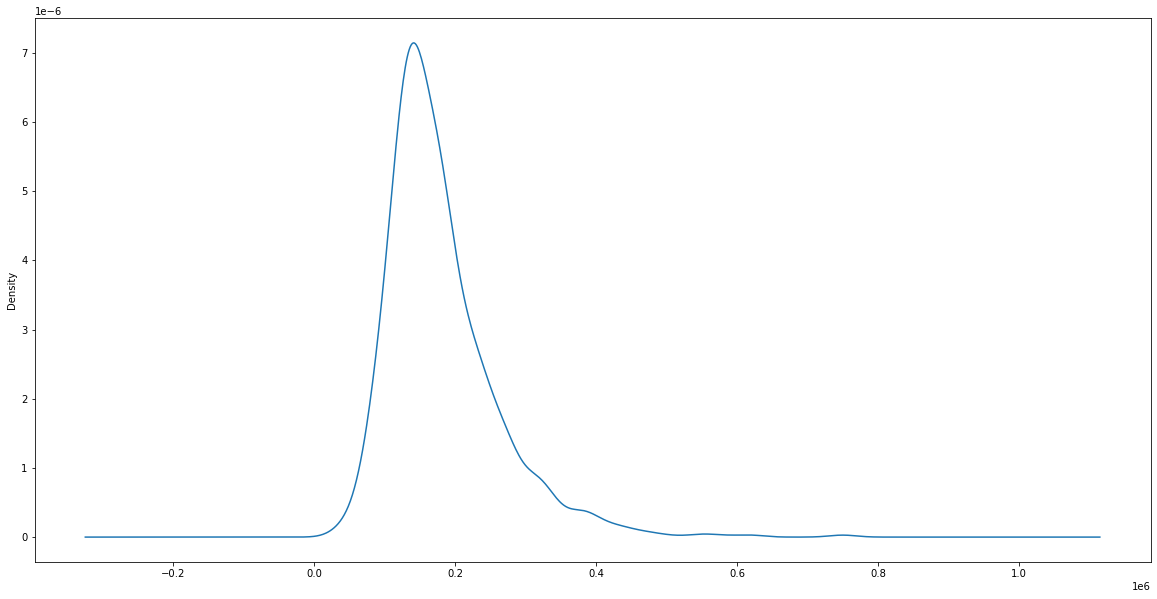

In [636]:
train['SalePrice'].plot(kind='kde', figsize = (20,10))

<AxesSubplot:ylabel='Frequency'>

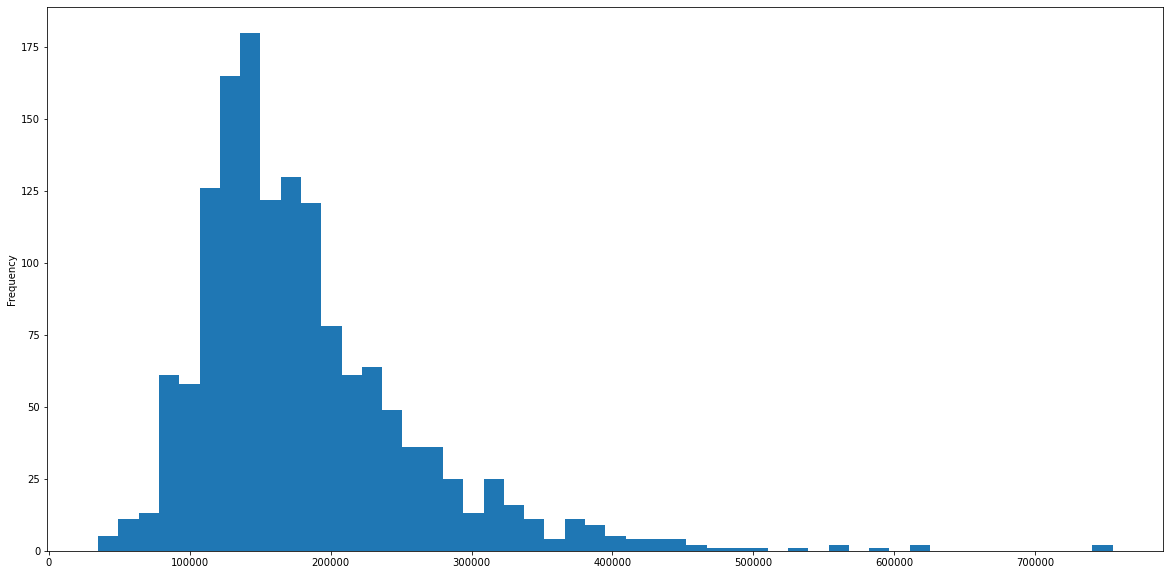

In [637]:
train['SalePrice'].plot(kind='hist', figsize = (20,10), bins =50)

Sale price is heavily right-skewed, so need a log transformation to correct skewness

In [604]:
train.info() #Inspect datatype of variables 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [605]:
corrMatrix = train.corr()
corrMatrix #Inspect correlation of numerical variables against the target variable(Sale Price)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [606]:
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

<AxesSubplot:>

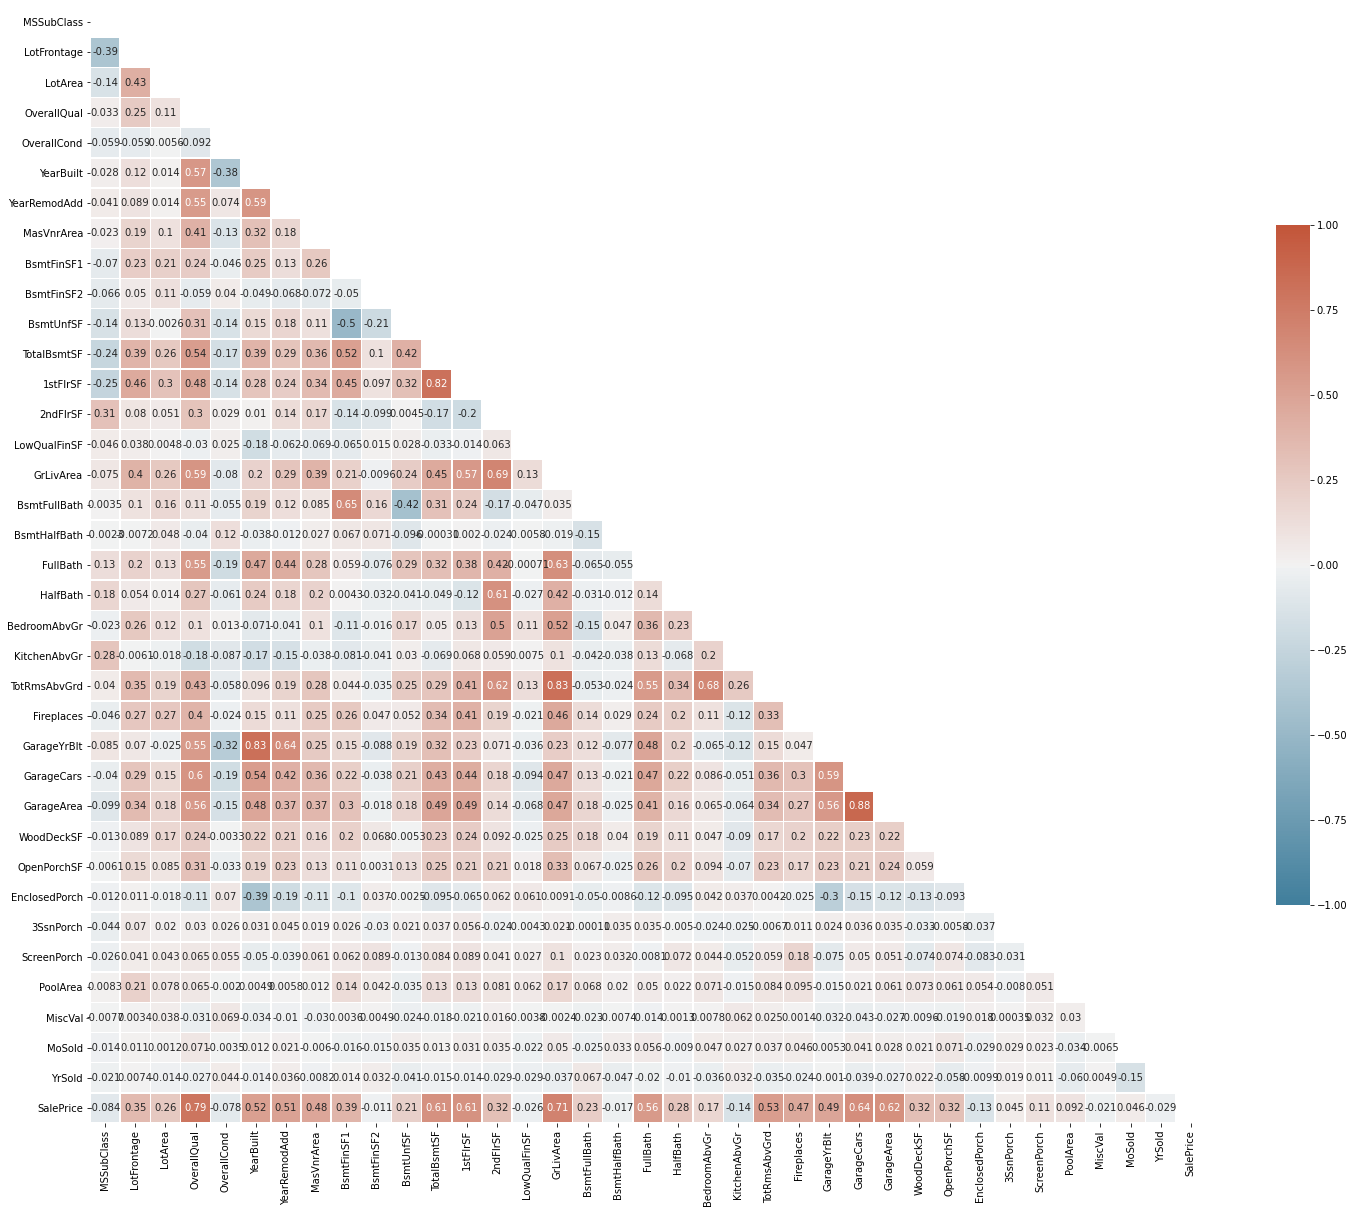

In [607]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, vmin=-1, vmax=1, mask=mask, cmap=cmap,  center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, 'orientation': 'vertical'})

# ax = sns.heatmap(train_corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, center=0, annot = True, square=True, linewidths=.5, cbar_kws= {"shrink": .5, 'orientation': 'vertical'}) 


In [608]:
corrMatrix['SalePrice'].sort_values(ascending = False)
#Highest correlated variables

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

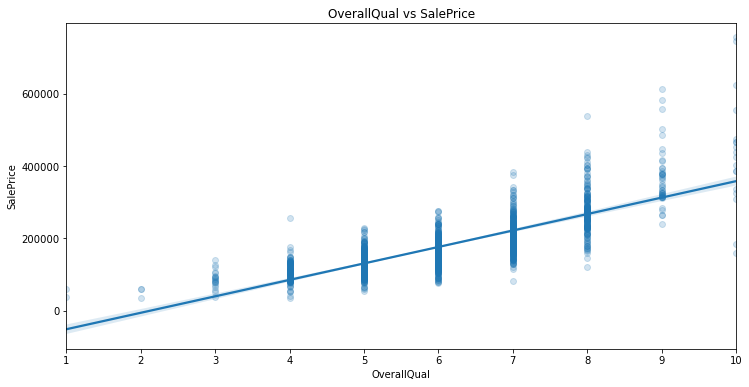

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'OverallQual', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('OverallQual vs SalePrice', fontsize = 12)

plt.show()

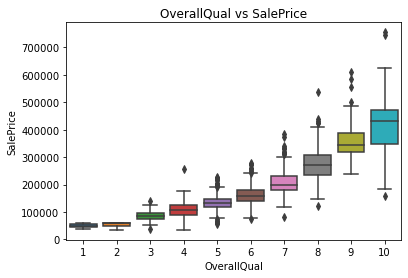

In [495]:
sns.boxplot(data=train, x = 'OverallQual', y='SalePrice')
plt.title('OverallQual vs SalePrice', fontsize = 12)
plt.show()

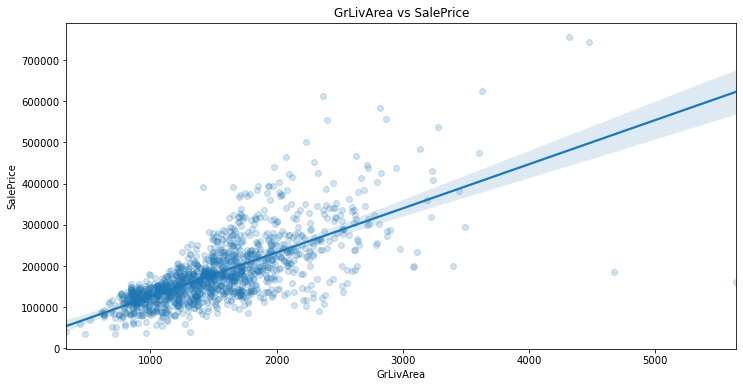

In [496]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)

plt.show()

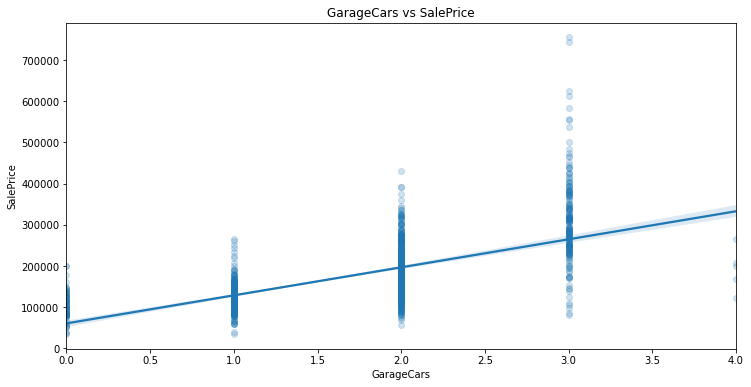

In [497]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GarageCars', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageCars vs SalePrice', fontsize = 12)

plt.show()

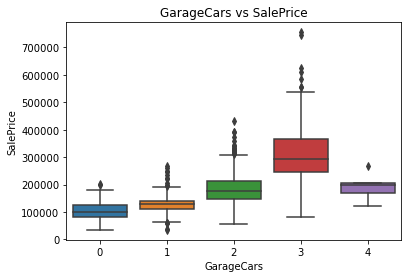

In [498]:
sns.boxplot(data=train, x = 'GarageCars', y='SalePrice')
plt.title('GarageCars vs SalePrice', fontsize = 12)
plt.show()

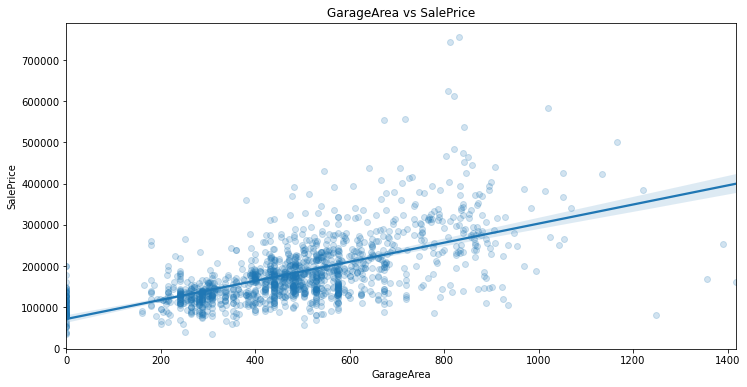

In [499]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageArea vs SalePrice', fontsize = 12)

plt.show()

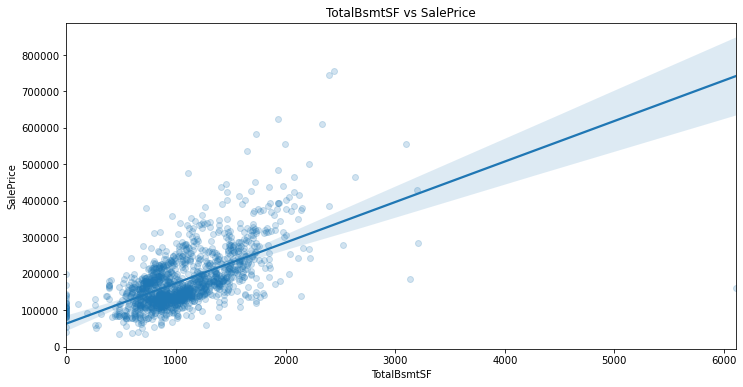

In [500]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)

plt.show()

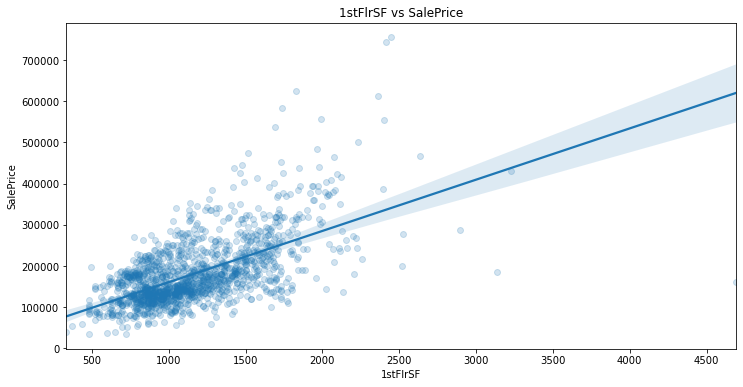

In [501]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = '1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('1stFlrSF vs SalePrice', fontsize = 12)

plt.show()

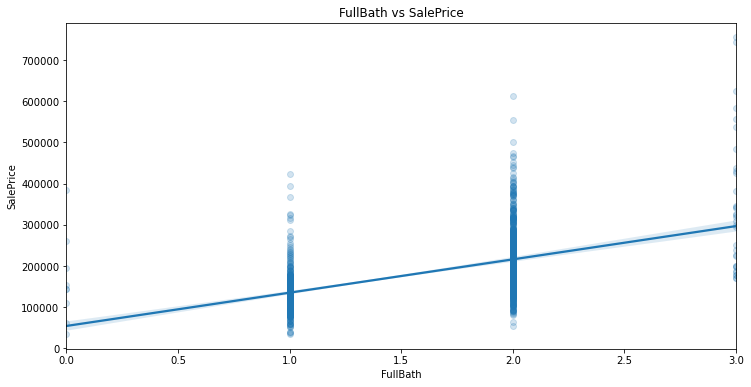

In [502]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'FullBath', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('FullBath vs SalePrice', fontsize = 12)

plt.show()


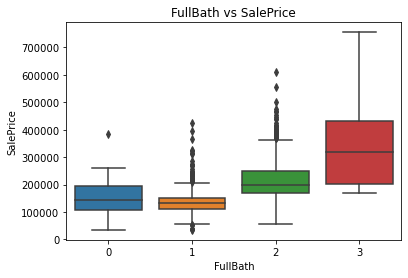

In [503]:
sns.boxplot(data=train, x = 'FullBath', y='SalePrice')
plt.title('FullBath vs SalePrice', fontsize = 12)
plt.show()

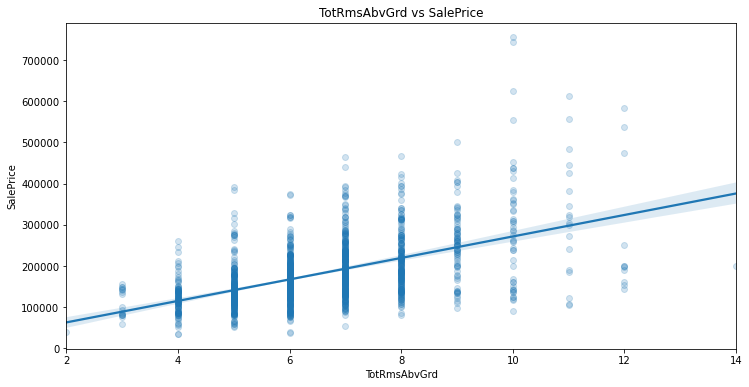

In [504]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotRmsAbvGrd vs SalePrice', fontsize = 12)

plt.show()


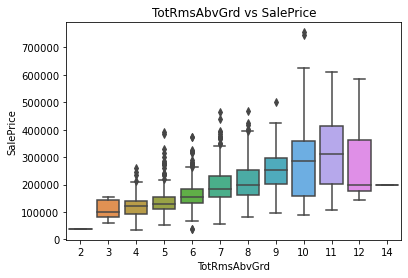

In [505]:
sns.boxplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice')
plt.title('TotRmsAbvGrd vs SalePrice', fontsize = 12)
plt.show()

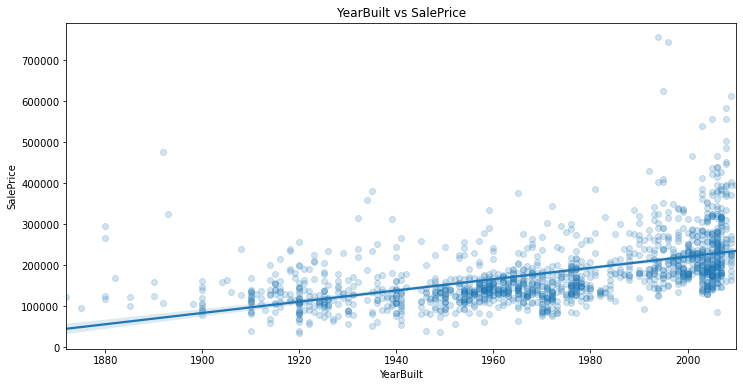

In [506]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)

plt.show()


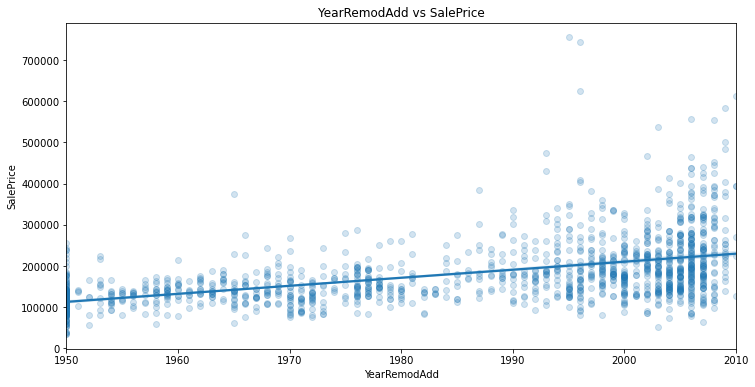

In [507]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'YearRemodAdd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearRemodAdd vs SalePrice', fontsize = 12)

plt.show()



## Data Cleaning

In [235]:
#dropping features that have more than 80% missing
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [236]:
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [237]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [238]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['Electrical'] = train['Electrical'].fillna('SBrkr')

numerical = ['MasVnrArea','GarageYrBlt', 'TotalBsmtSF','GarageArea','GarageCars','BsmtUnfSF',
'BsmtFinSF2','BsmtFinSF1','BsmtHalfBath','BsmtFullBath']
for col in numerical:
    train[col] = train[col].fillna(0)

for column in ['KitchenQual', 'Electrical', 'SaleType','Exterior1st', 'Exterior2nd', 'Functional','Utilities', 'MSZoning']:
    train[column].fillna(train[column].mode()[0], inplace=True)
    
#fill NA columns with NE ('Not Exist') or 0 because not having a particular feature doesn't mean the observation for that feature is missing

In [239]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['Electrical'] = test['Electrical'].fillna('SBrkr')

numerical = ['MasVnrArea','GarageYrBlt', 'TotalBsmtSF','GarageArea','GarageCars','BsmtUnfSF',
'BsmtFinSF2','BsmtFinSF1','BsmtHalfBath','BsmtFullBath']
for col in numerical:
    test[col] = test[col].fillna(0)

for column in ['KitchenQual', 'Electrical', 'SaleType','Exterior1st', 'Exterior2nd', 'Functional','Utilities', 'MSZoning']:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [240]:
missing = np.sum(train.isnull())
low_missing = (missing[missing>0]/train.shape[0]).sort_values(ascending = False)

for i in low_missing[low_missing<0.0007].index:
    train[i].fillna(train[i].mode()[0], inplace=True)

#Filling in missing values that are less than 0.0007 with mode 

In [241]:
missing = np.sum(test.isnull())
low_missing = (missing[missing>0]/test.shape[0]).sort_values(ascending = False)

for i in low_missing[low_missing<0.0007].index:
    test[i].fillna(test[i].mode()[0], inplace=True)
#Filling in missing values that are less than 0.0007 with mode 

## Impute LotFrontage with KNN

In [11]:
corrMatrix['LotFrontage'].sort_values(ascending = False).head(4)
#Identify top 3 correlated features with LotFrontage

NameError: name 'corrMatrix' is not defined

In [242]:
from sklearn.impute import KNNImputer

LotFrontage = train['LotFrontage'].tolist()
FlrSF = train['1stFlrSF'].tolist()
LotArea = train['LotArea'].tolist()
GrLivArea = train['GrLivArea'].tolist()
data = {'LotFrontage': LotFrontage, '1FlrSF':FlrSF, 'LotArea' :LotArea, 'GrLivArea': GrLivArea}
lot = pd.DataFrame(data)


imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(1, 1461))

train['LotFrontage'] = lot_imputed['LotFrontage']

In [243]:
from sklearn.impute import KNNImputer

LotFrontage = test['LotFrontage'].tolist()
FlrSF = test['1stFlrSF'].tolist()
LotArea = test['LotArea'].tolist()
GrLivArea = test['GrLivArea'].tolist()
data = {'LotFrontage': LotFrontage, '1FlrSF':FlrSF, 'LotArea' :LotArea, 'GrLivArea': GrLivArea}
lot = pd.DataFrame(data)


imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(1461, 2920))

test['LotFrontage'] = lot_imputed['LotFrontage']

In [244]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['MoSold'] = train['MoSold'].apply(str)

#Convert "numerical" features to categorical features

In [245]:
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['MoSold'] = test['MoSold'].apply(str)


Shape of data: (1460, 76)
Count of null values: 0


<AxesSubplot:ylabel='Id'>

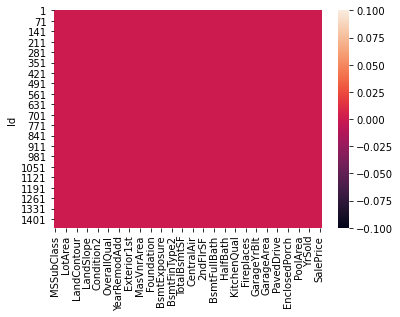

In [246]:
print(f'Shape of data: {train.shape}')
print(f'Count of null values: {train.isnull().sum().sum()}')
sns.heatmap(train.isnull())

Shape of data: (1459, 75)
Count of null values: 0


<AxesSubplot:ylabel='Id'>

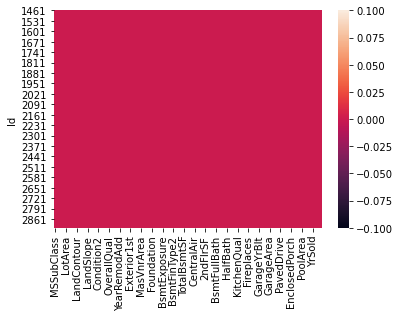

In [247]:
print(f'Shape of data: {test.shape}')
print(f'Count of null values: {test.isnull().sum().sum()}')
sns.heatmap(test.isnull())

## Feature Engineering

In [248]:
train['TotalBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

train['OverallScore'] = train['OverallQual'] + train['OverallCond']

train['HouseAge'] = train['YearRemodAdd'] - train['YrSold']

train['OverallPorch'] = (train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] 
                + train['ScreenPorch'] + train['WoodDeckSF'])
# check EnclosedPorch


train['BaseArea'] = train['TotalBsmtSF'] - train['BsmtUnfSF']

# train['PriceSF'] = train['SalePrice'] / train['GrLivArea']

train['HouseAge'] = train.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)



In [249]:
test['TotalBath'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

test['OverallScore'] = test['OverallQual'] + test['OverallCond']

test['HouseAge'] = test['YearRemodAdd'] - test['YrSold']

test['OverallPorch'] = (test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] 
                + test['ScreenPorch'] + test['WoodDeckSF'])
# check EnclosedPorch

test['BaseArea'] = test['TotalBsmtSF'] - test['BsmtUnfSF']

# test['PriceSF'] = test['SalePrice'] / test['GrLivArea']

test['HouseAge'] = test.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)



In [250]:
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [251]:
test['haspool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['hasfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [130]:
corrMatrix = train.corr()
corrMatrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
TotalBath        0.631731
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
OverallScore     0.594786
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
hasfireplace     0.471908
Fireplaces       0.466929
OverallPorch     0.390993
BsmtFinSF1       0.386420
BaseArea         0.366328
LotFrontage      0.343011
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
hasgarage        0.236832
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
hasbsmt          0.152829
has2ndfloor      0.137656
ScreenPorch      0.111447
haspool          0.093708
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath

## Outlier Count

In [252]:
high_cor = ['SalePrice','OverallQual','GrLivArea', 'GarageCars', 'TotalBath','GarageArea', 
            'TotalBsmtSF', '1stFlrSF', 'OverallScore','FullBath', 
            'TotRmsAbvGrd', 'YearBuilt', 'HouseAge', 'YearRemodAdd']
for feature in high_cor:
    print (feature)
    print ('Number of outliers that are 3 std above the mean: ')
    print (train[feature][(train[feature] > np.mean(train[feature]) + 3*np.std(train[feature]))].count())
    print ('Number of outliers that are 3 std below the mean: ')
    print (train[feature][(train[feature] < np.mean(train[feature]) - 3*np.std(train[feature]))].count())
    print ('-'*50)


# train.SalePrice[(train.SalePrice > np.mean(train.SalePrice) + 3*np.std(train.SalePrice))].count()

SalePrice
Number of outliers that are 3 std above the mean: 
22
Number of outliers that are 3 std below the mean: 
0
--------------------------------------------------
OverallQual
Number of outliers that are 3 std above the mean: 
0
Number of outliers that are 3 std below the mean: 
2
--------------------------------------------------
GrLivArea
Number of outliers that are 3 std above the mean: 
16
Number of outliers that are 3 std below the mean: 
0
--------------------------------------------------
GarageCars
Number of outliers that are 3 std above the mean: 
0
Number of outliers that are 3 std below the mean: 
0
--------------------------------------------------
TotalBath
Number of outliers that are 3 std above the mean: 
2
Number of outliers that are 3 std below the mean: 
0
--------------------------------------------------
GarageArea
Number of outliers that are 3 std above the mean: 
7
Number of outliers that are 3 std below the mean: 
0
-------------------------------------------

In [253]:
train = train[(train.SalePrice < np.mean(train.SalePrice) + 3*np.std(train.SalePrice))]
#Drop values that are 3 SD above the mean 

train = train[(train.OverallQual > np.mean(train.OverallQual) - 3*np.std(train.OverallQual))]
train = train[(train.GrLivArea < np.mean(train.GrLivArea) + 3*np.std(train.GrLivArea))]
train = train[(train.TotalBath < np.mean(train.TotalBath) + 3*np.std(train.TotalBath))]
train = train[(train.GarageArea < np.mean(train.GarageArea) + 3*np.std(train.GarageArea))]
train = train[(train.TotalBsmtSF < np.mean(train.TotalBsmtSF) + 3*np.std(train.TotalBsmtSF))]
train = train[(train['1stFlrSF'] < np.mean(train['1stFlrSF']) + 3*np.std(train['1stFlrSF']))]

In [254]:
cat_feats = train.dtypes[train.dtypes == "object"].index
numeric_feats = train.dtypes[train.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

print(f"\nList of cetagorical features: { cat_feats.to_list() }\n\nList of numerical features: { numeric_feats.to_list() }")

Number of categorical features: 41, Numerical features: 46

List of cetagorical features: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']

List of numerical features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firepl

In [255]:
cat_feats = test.dtypes[test.dtypes == "object"].index
numeric_feats = test.dtypes[test.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

print(f"\nList of cetagorical features: { cat_feats.to_list() }\n\nList of numerical features: { numeric_feats.to_list() }")

Number of categorical features: 41, Numerical features: 45

List of cetagorical features: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']

List of numerical features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firepl

In [256]:
categorical = train.select_dtypes(include = 'object')
categorical.columns
#dropping: LotConfig, Condition1, 'BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'BsmtCond', 
# 'BsmtFinType2', SaleType, SaleCondition

#converting: ExterQual, 'BsmtQual', HeatingQC, 'KitchenQual', 'FireplaceQu', 'GarageQual'

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [538]:
categorical = train.select_dtypes(include = 'object')
for i in range(0, len(categorical.columns)):
    print(categorical.iloc[:,i].value_counts())

20     514
60     282
50     141
120     87
30      65
160     63
70      59
80      57
90      49
190     28
85      20
75      12
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1100
RM          215
FV           65
RH           15
C (all)       8
Name: MSZoning, dtype: int64
Reg    896
IR1    462
IR2     36
IR3      9
Name: LotShape, dtype: int64
Inside     1013
Corner      253
CulDSac      86
FR2          47
FR3           4
Name: LotConfig, dtype: int64
NAmes      219
CollgCr    149
OldTown    111
Edwards     95
Somerst     85
Gilbert     79
Sawyer      74
NWAmes      71
NridgHt     63
SawyerW     57
BrkSide     56
Mitchel     48
Crawfor     47
Timber      37
NoRidge     35
IDOTRR      35
ClearCr     27
SWISU       22
StoneBr     21
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1216
Feedr       78
Artery      45
RRAn        24
PosN        15
RRAe        11
PosA         7

## Boxplots of all categorical features

MSSubClass


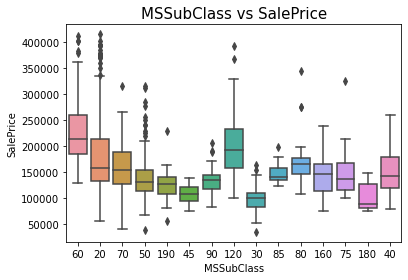

20     514
60     282
50     141
120     87
30      65
160     63
70      59
80      57
90      49
190     28
85      20
75      12
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


MSZoning


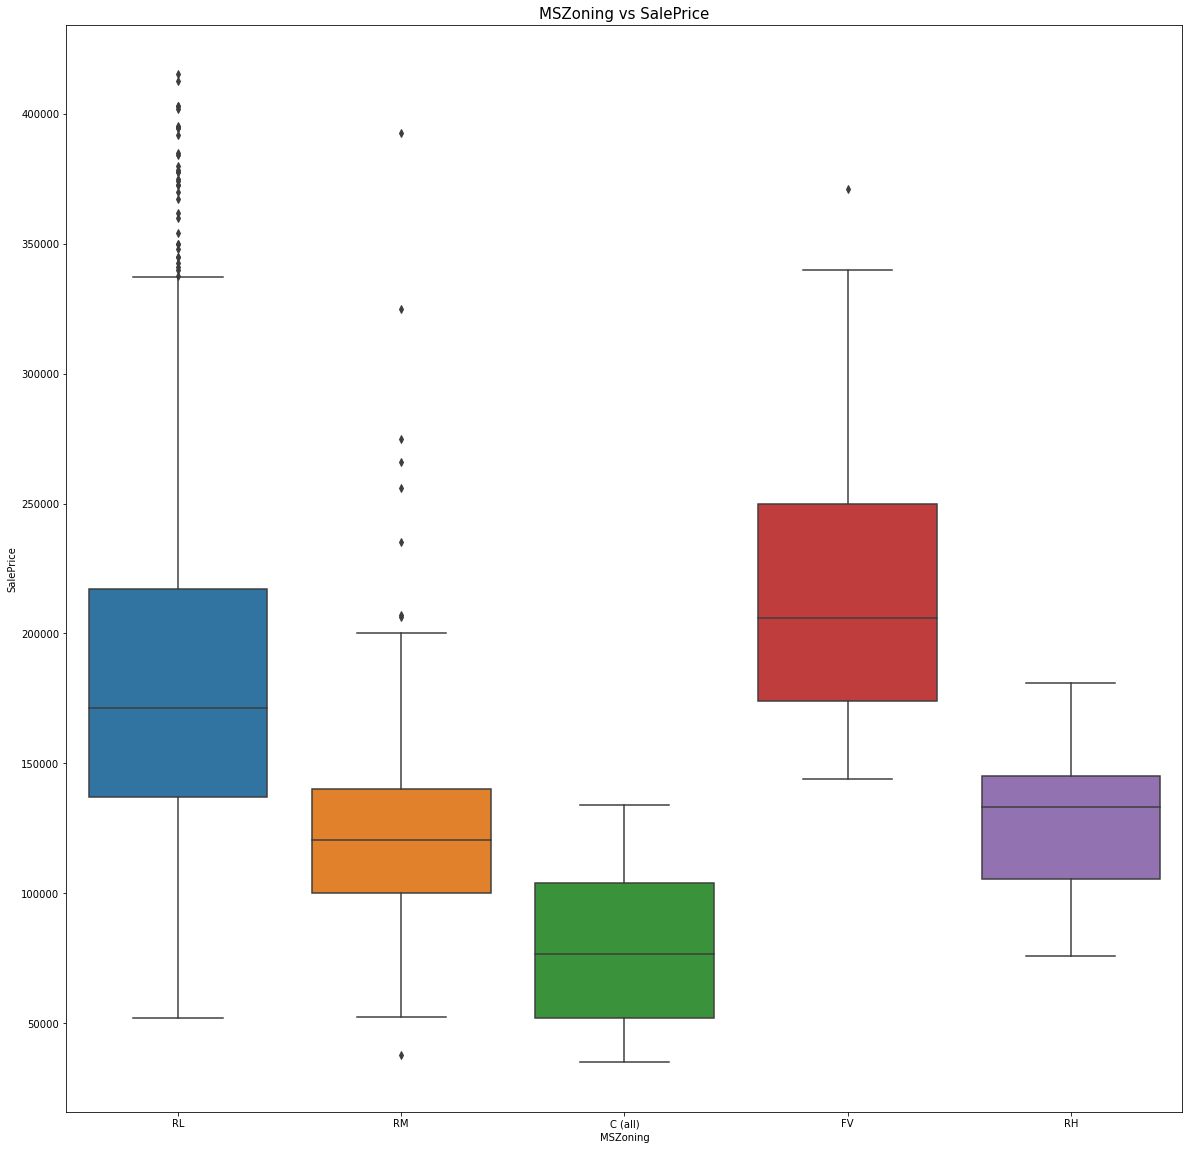

RL         1100
RM          215
FV           65
RH           15
C (all)       8
Name: MSZoning, dtype: int64


LotShape


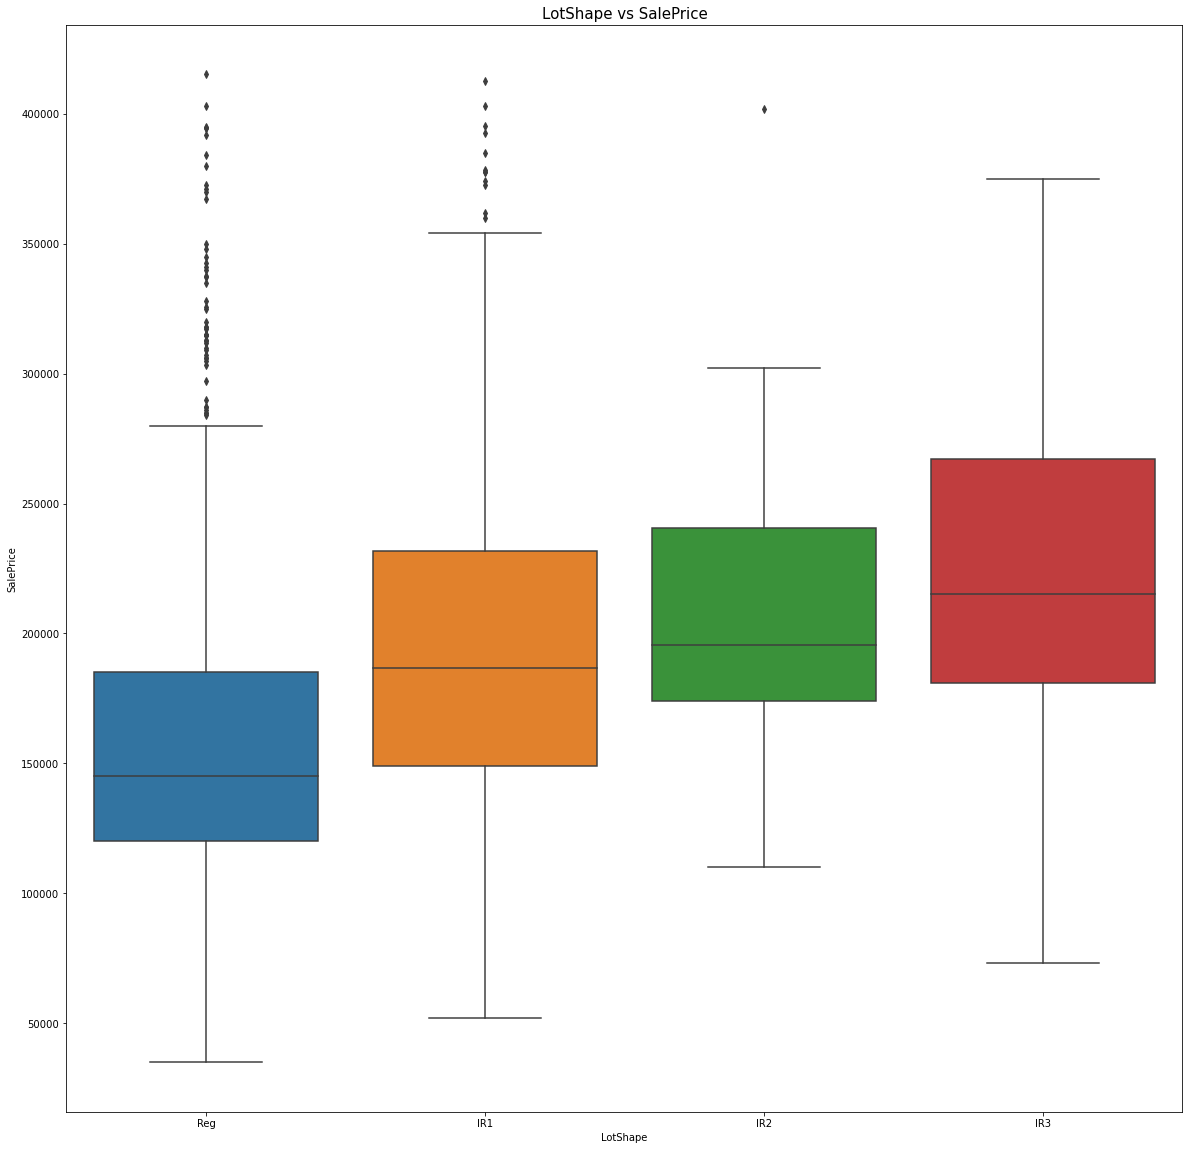

Reg    896
IR1    462
IR2     36
IR3      9
Name: LotShape, dtype: int64


LotConfig


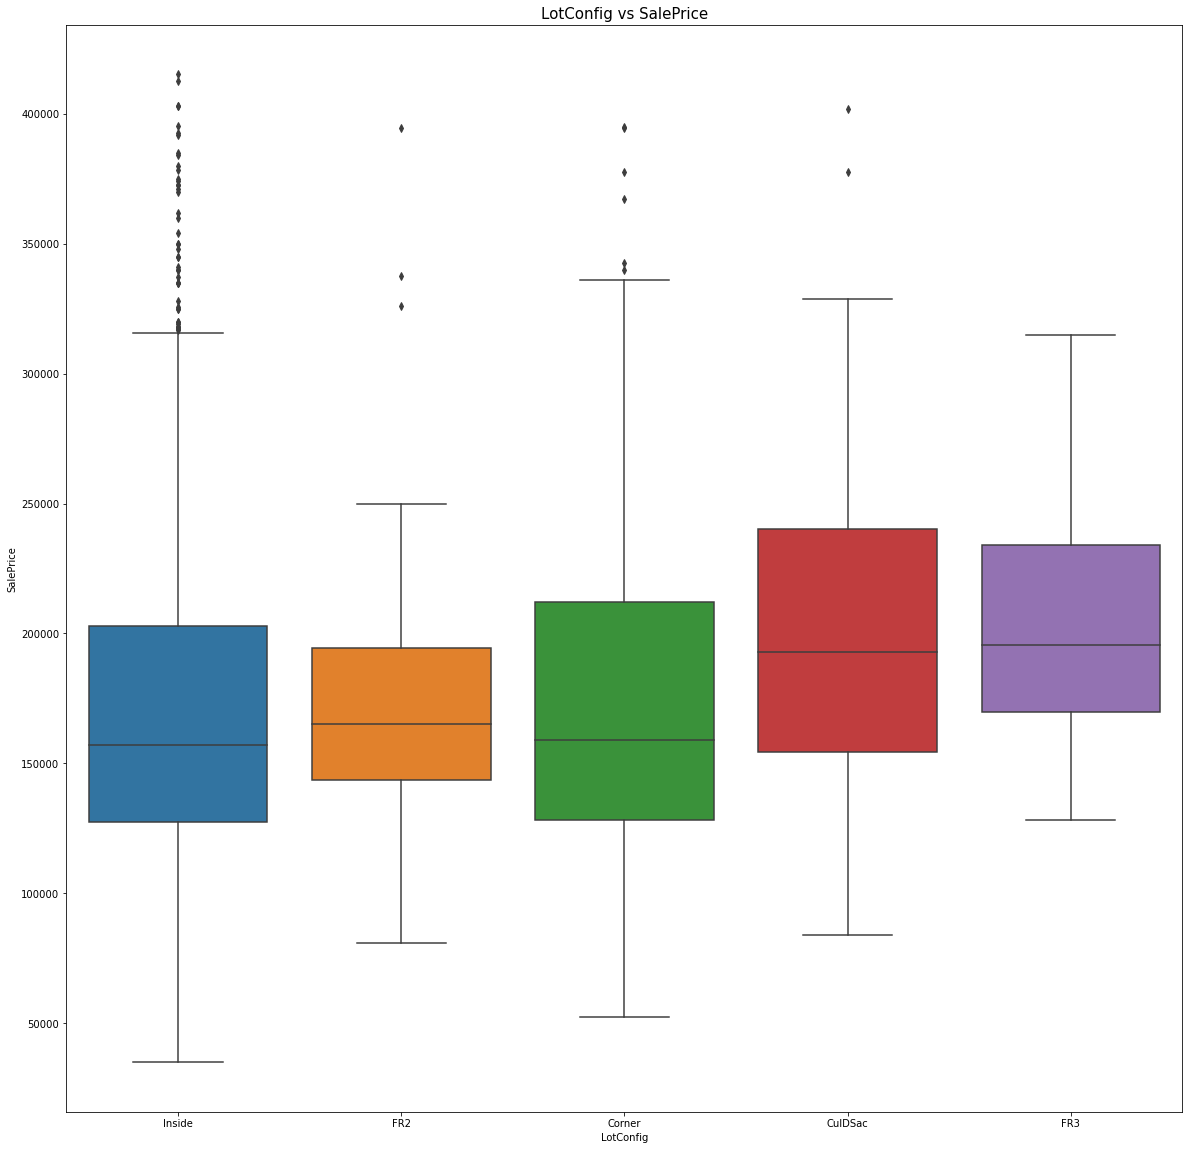

Inside     1013
Corner      253
CulDSac      86
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Neighborhood


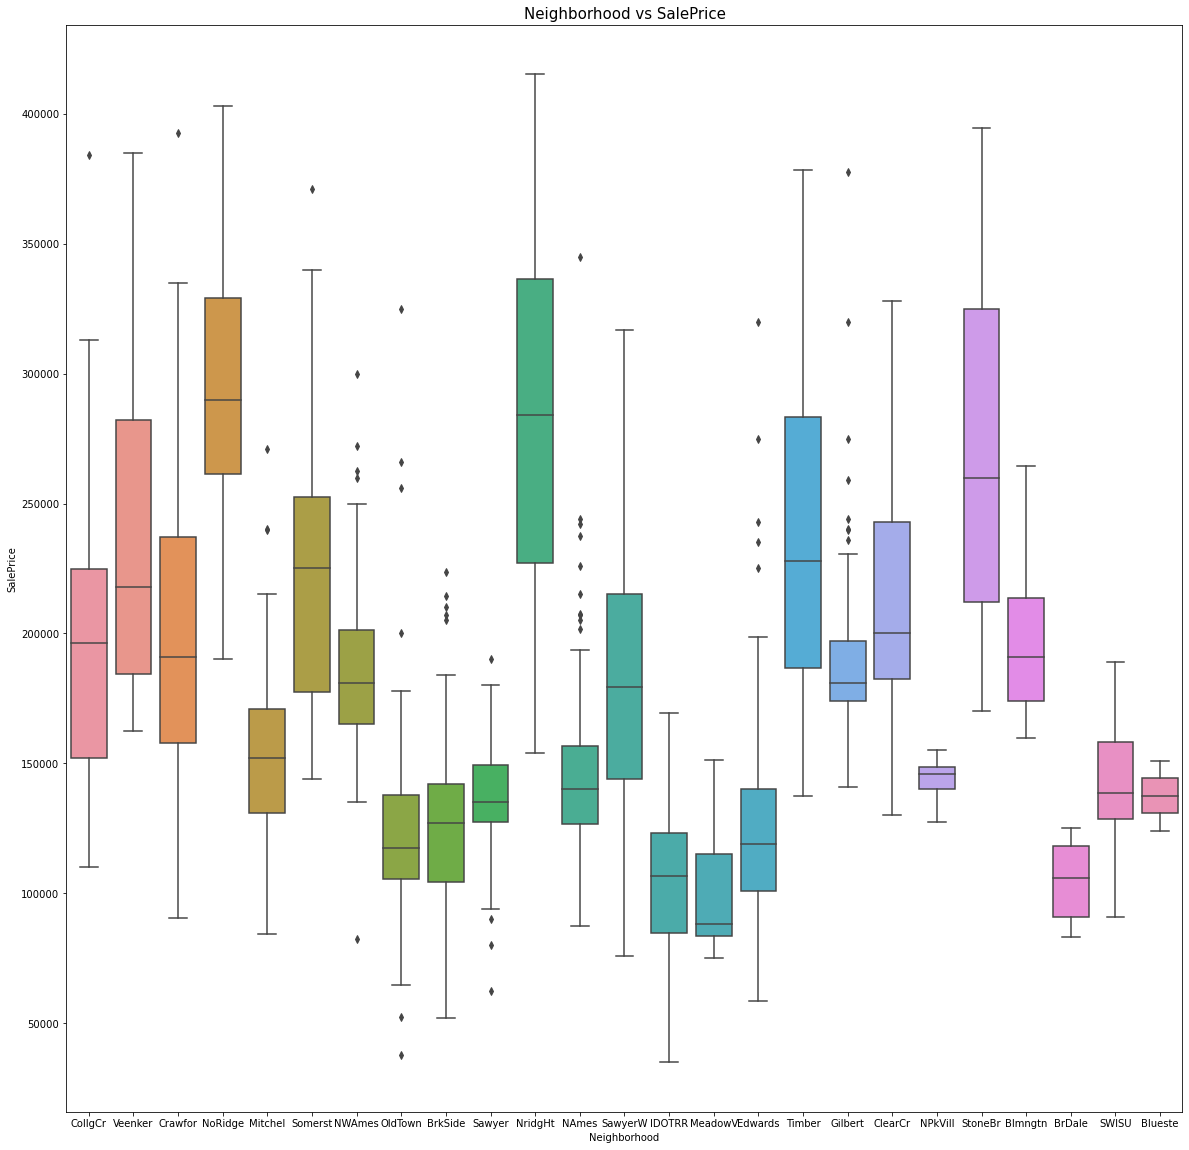

NAmes      219
CollgCr    149
OldTown    111
Edwards     95
Somerst     85
Gilbert     79
Sawyer      74
NWAmes      71
NridgHt     63
SawyerW     57
BrkSide     56
Mitchel     48
Crawfor     47
Timber      37
NoRidge     35
IDOTRR      35
ClearCr     27
SWISU       22
StoneBr     21
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Condition1


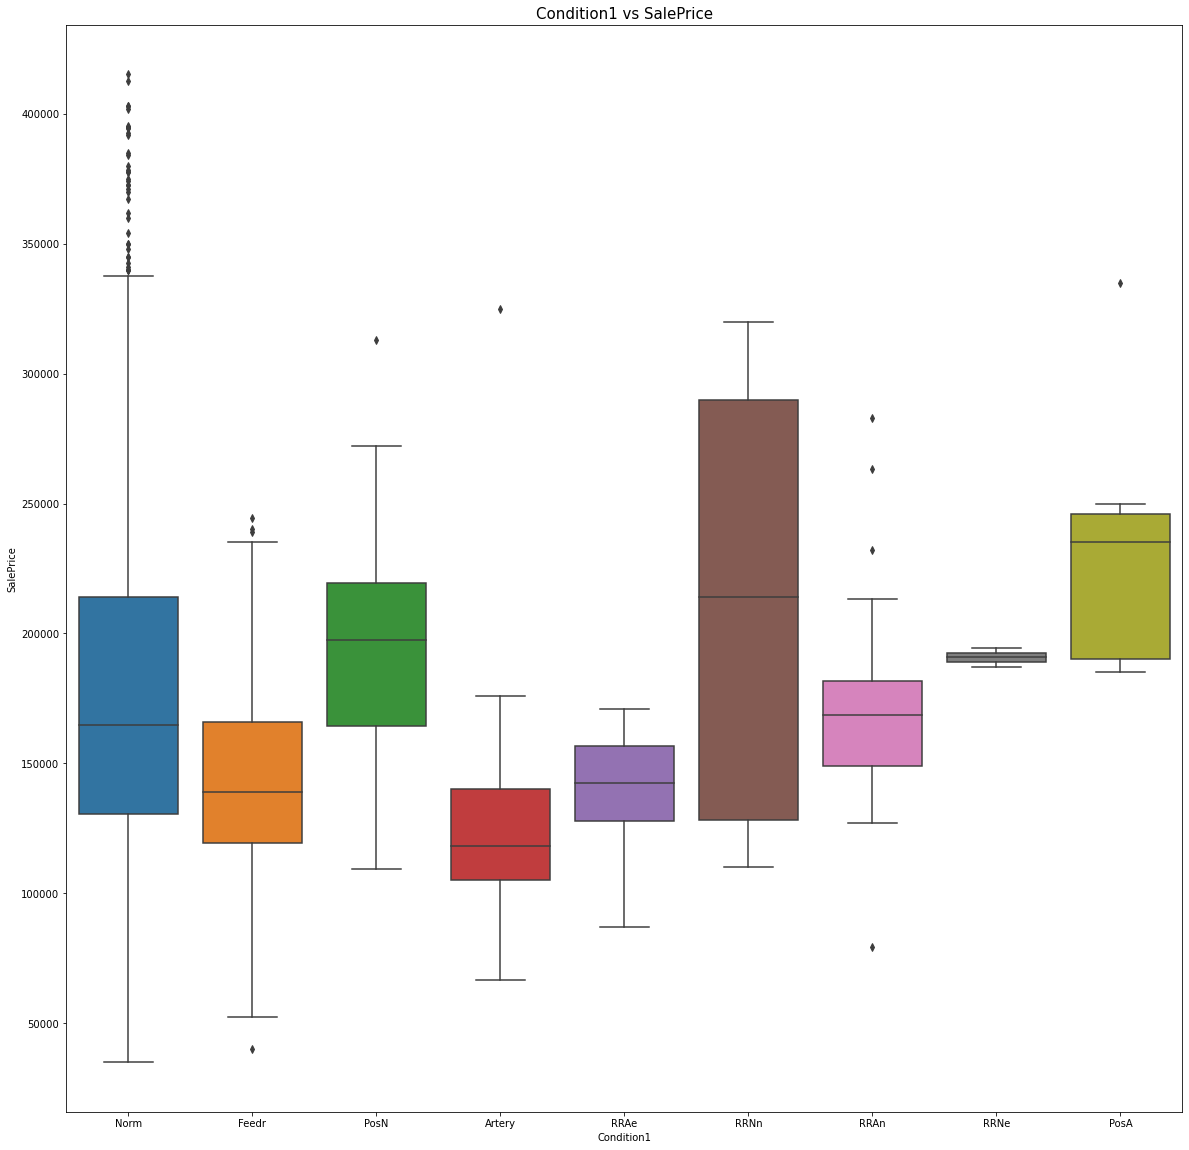

Norm      1216
Feedr       78
Artery      45
RRAn        24
PosN        15
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


BldgType


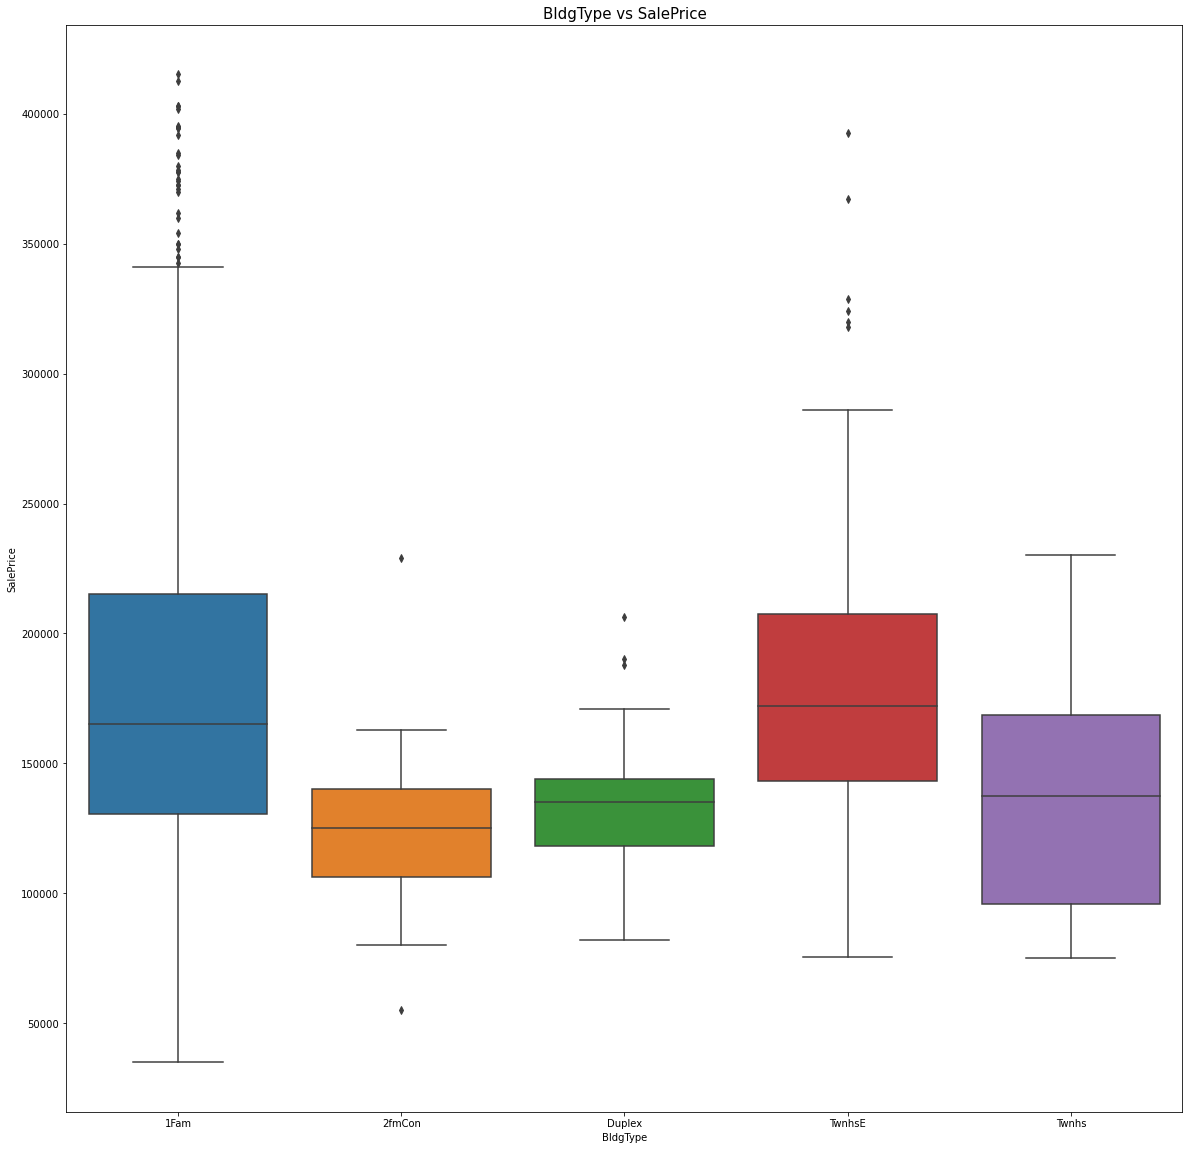

1Fam      1168
TwnhsE     114
Duplex      49
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64


HouseStyle


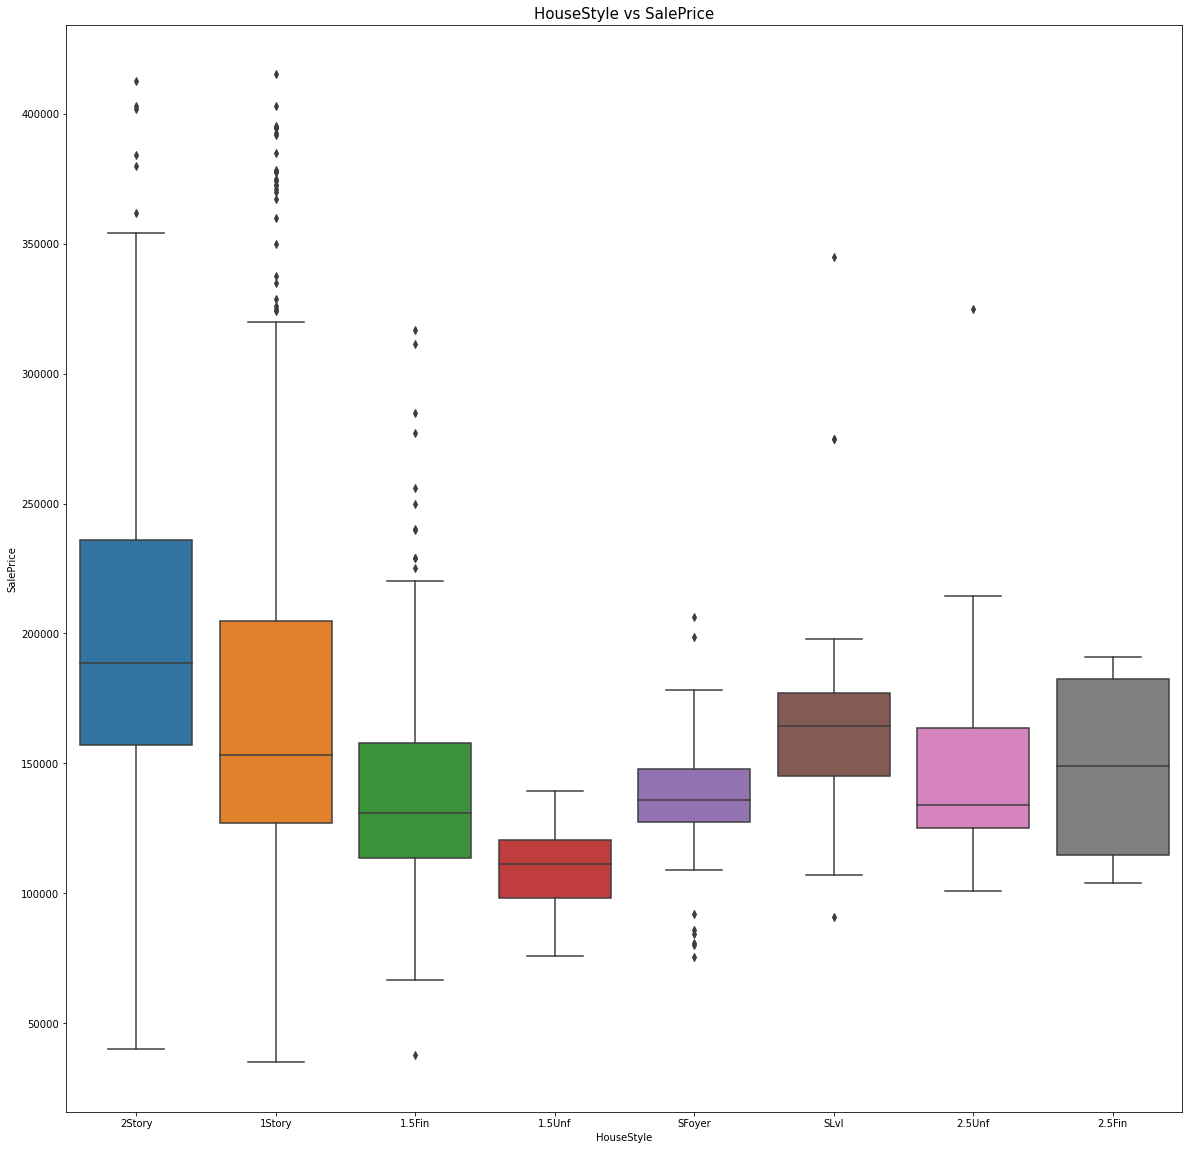

1Story    698
2Story    425
1.5Fin    150
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      4
Name: HouseStyle, dtype: int64


RoofStyle


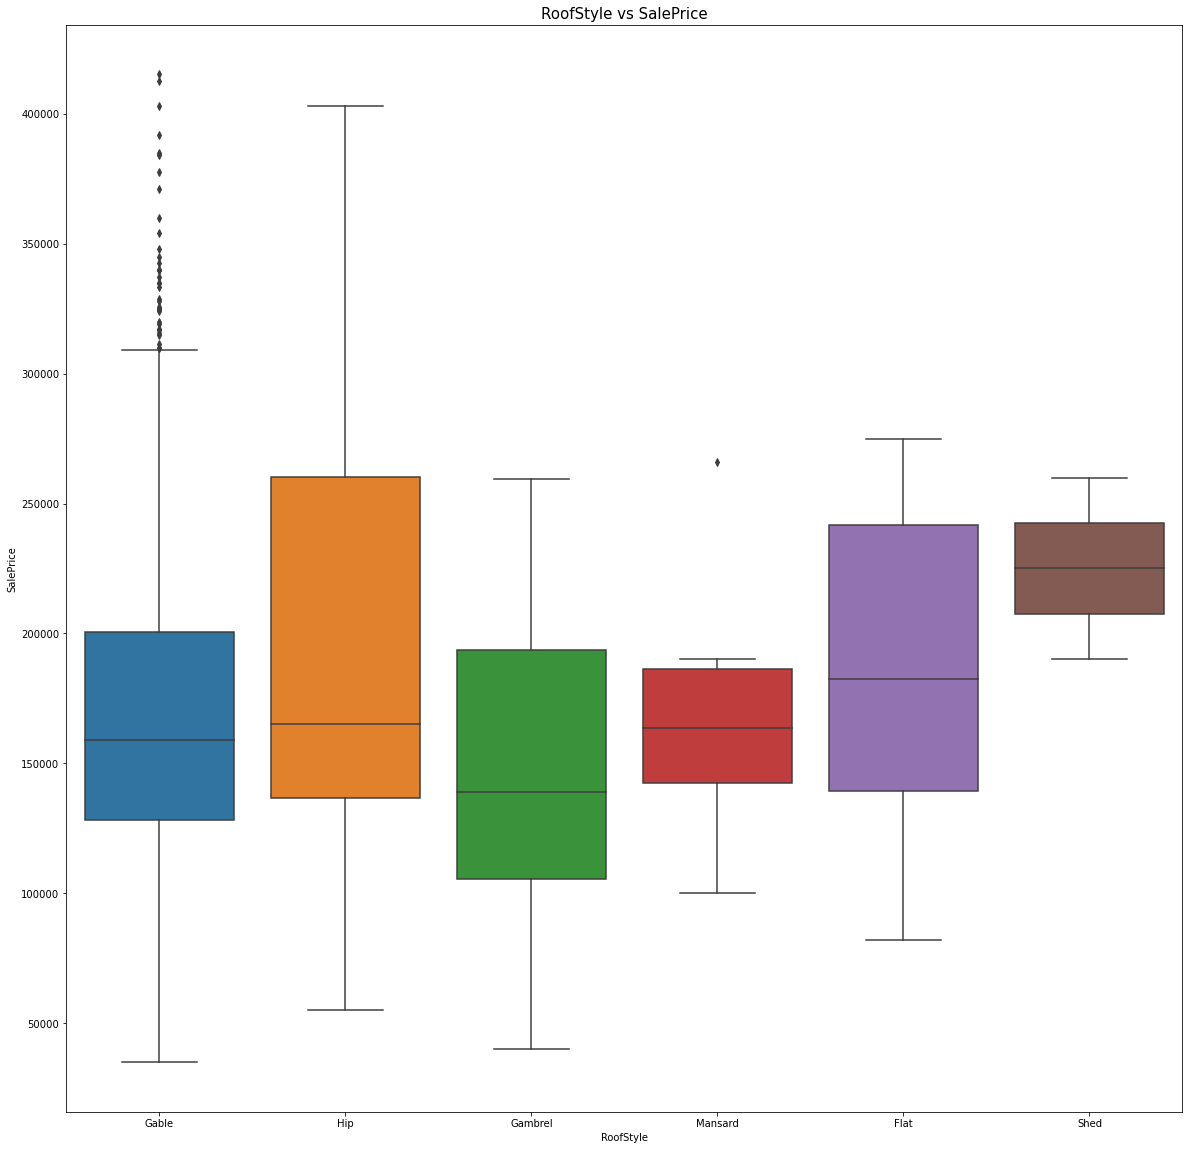

Gable      1114
Hip         258
Flat         12
Gambrel      11
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64


Exterior1st


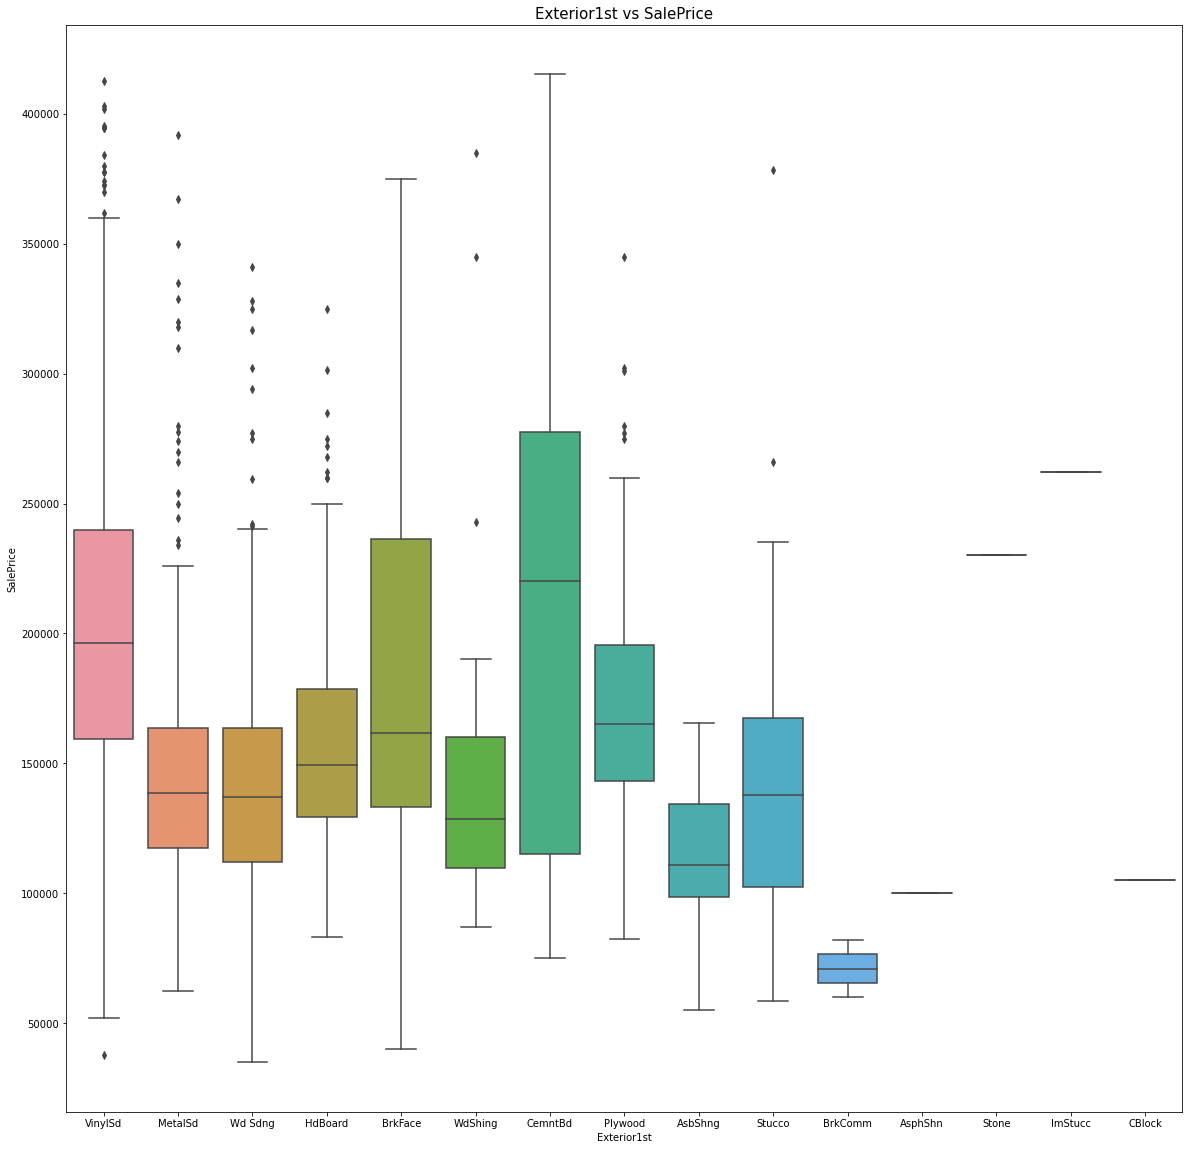

VinylSd    496
HdBoard    219
MetalSd    215
Wd Sdng    197
Plywood    103
CemntBd     54
BrkFace     47
WdShing     26
Stucco      22
AsbShng     18
BrkComm      2
CBlock       1
Stone        1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


Exterior2nd


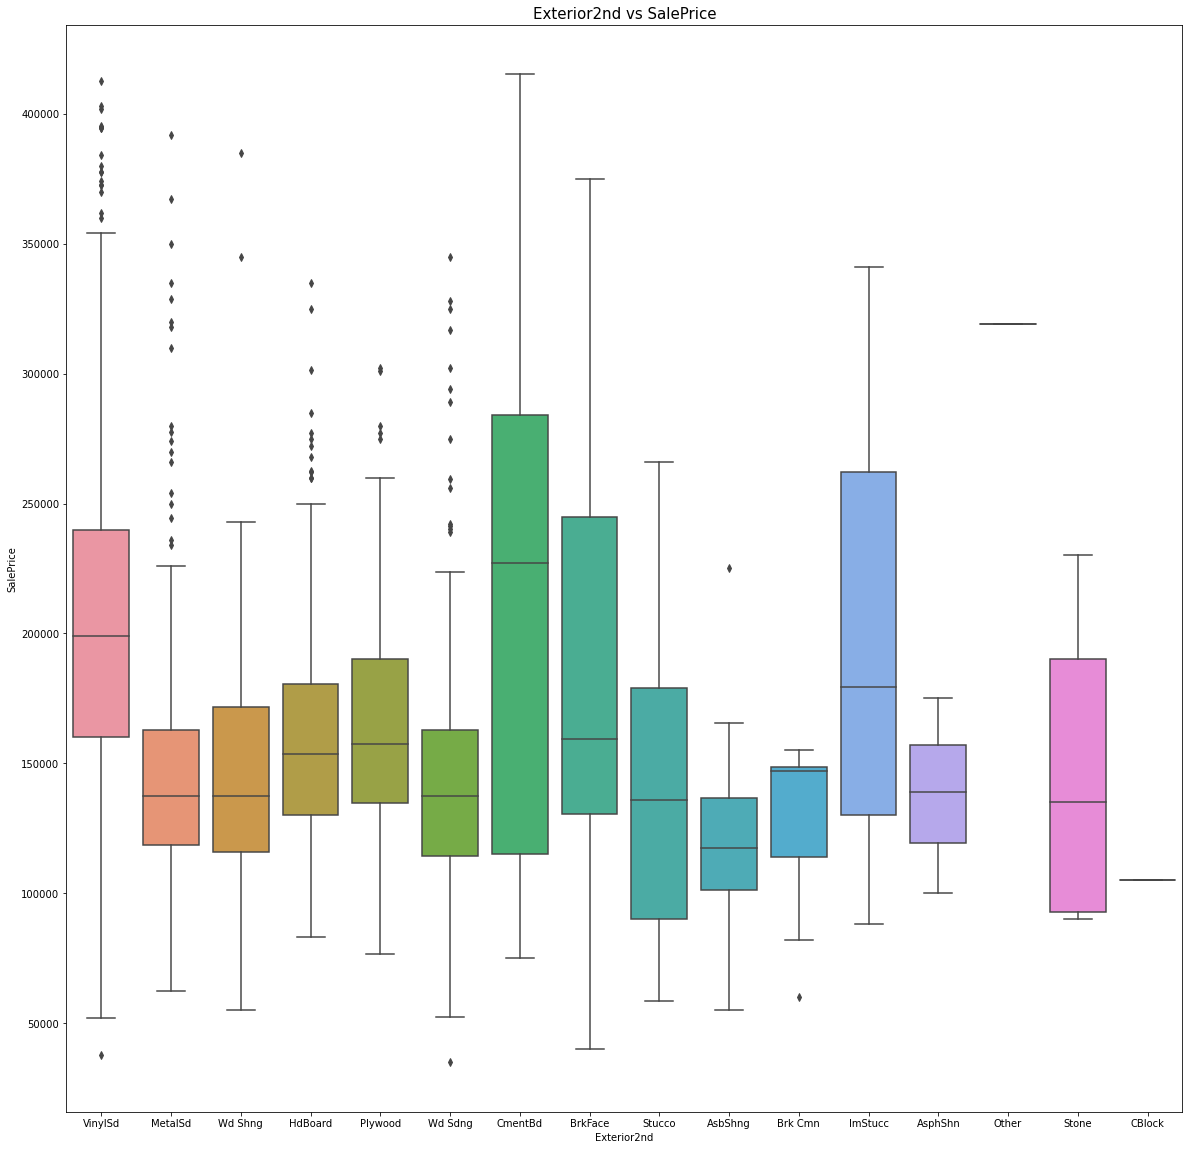

VinylSd    485
MetalSd    209
HdBoard    203
Wd Sdng    190
Plywood    136
CmentBd     54
Wd Shng     37
BrkFace     23
Stucco      23
AsbShng     18
ImStucc      9
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


MasVnrType


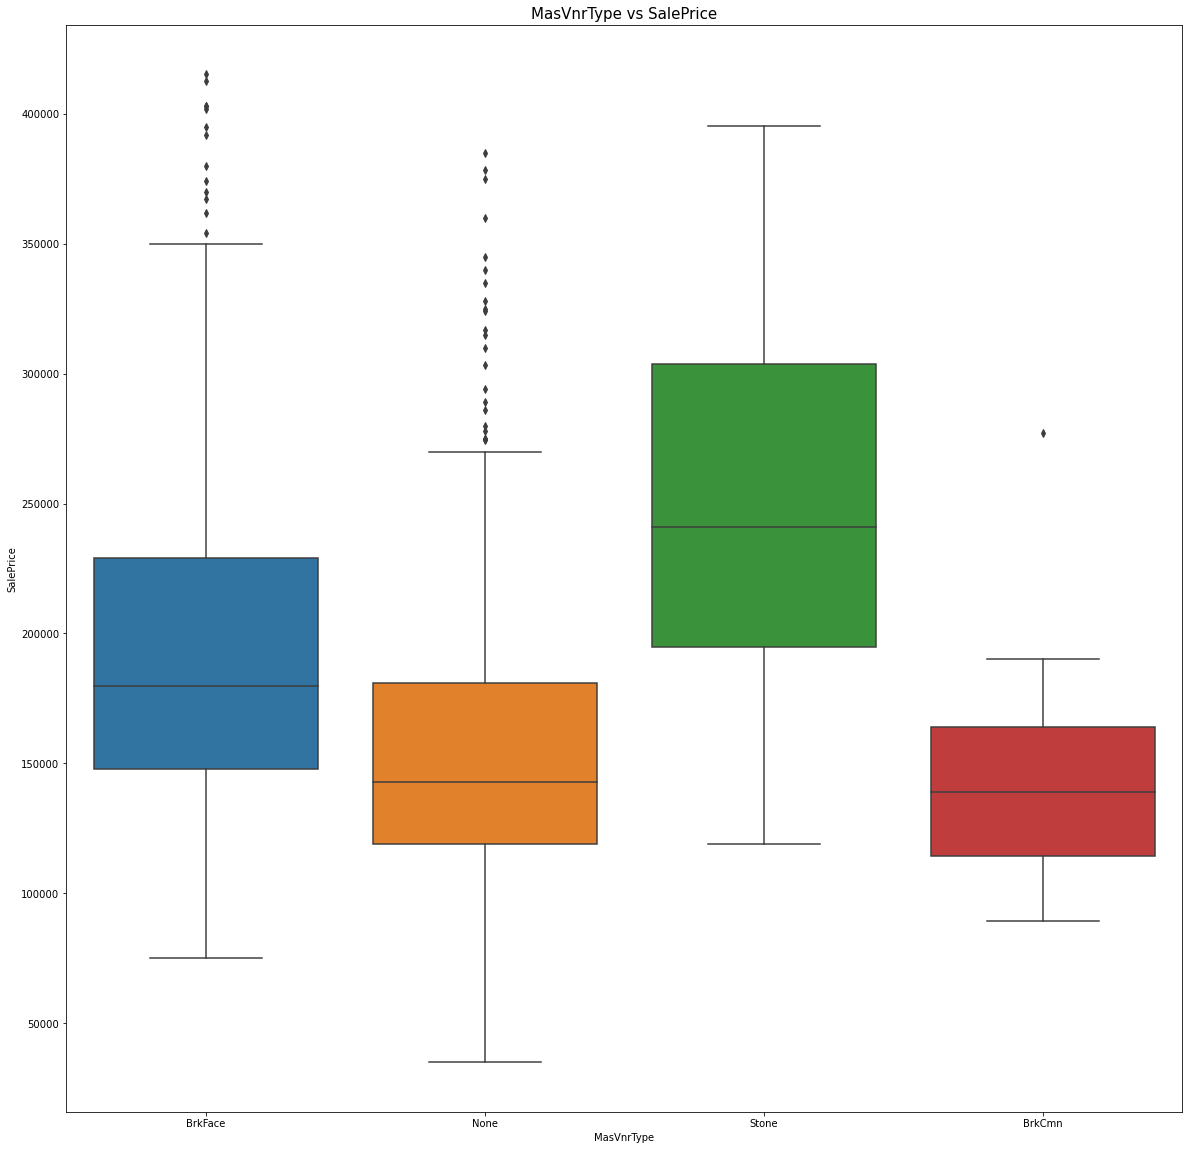

None       848
BrkFace    425
Stone      115
BrkCmn      15
Name: MasVnrType, dtype: int64


ExterQual


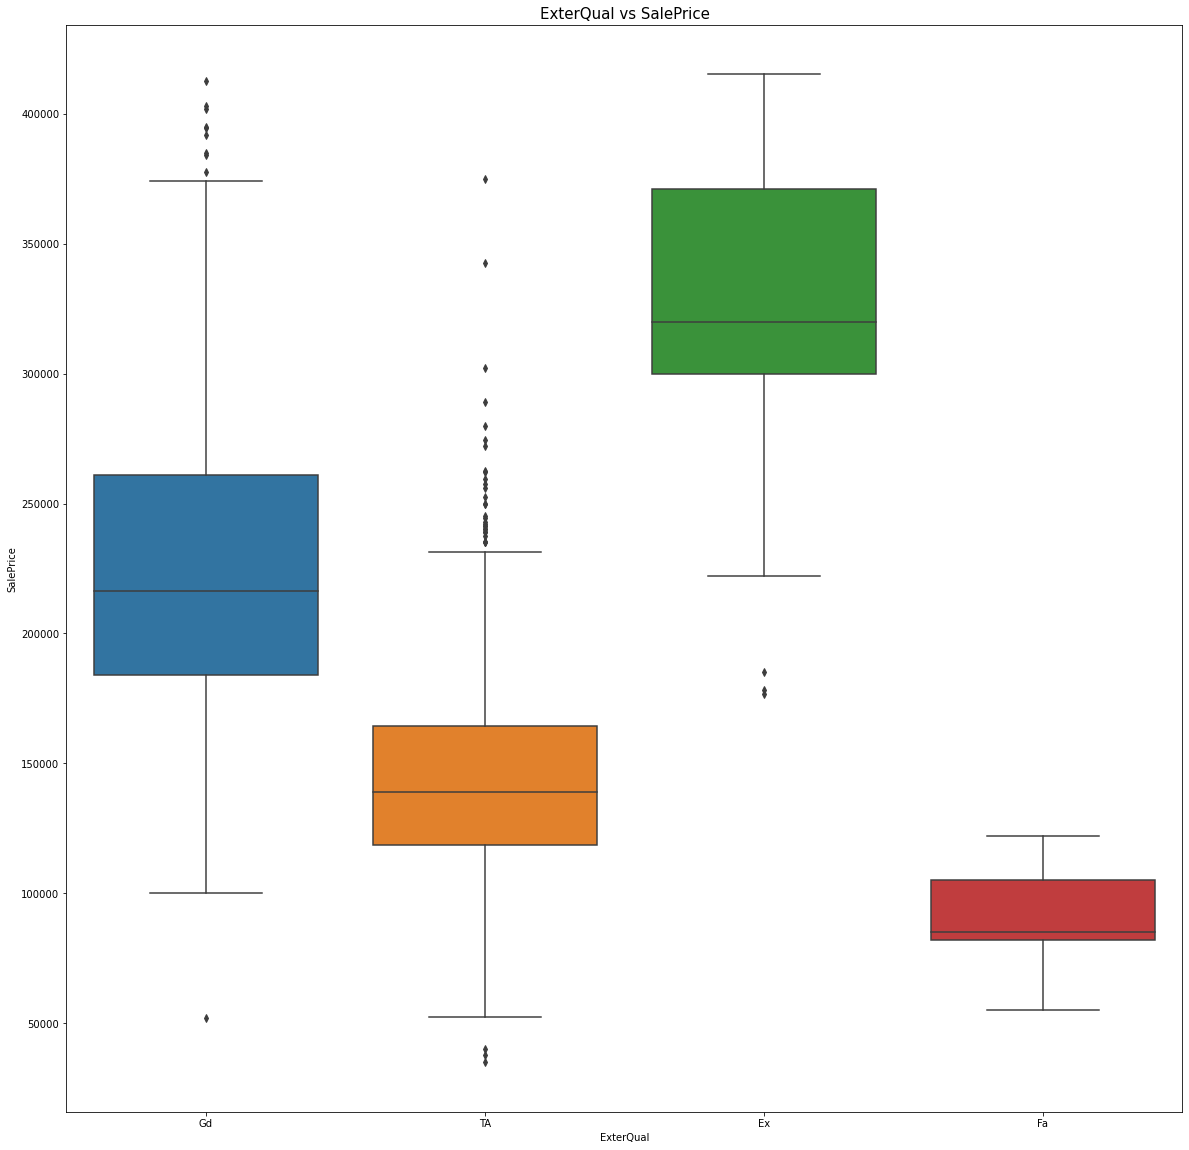

TA    890
Gd    471
Ex     33
Fa      9
Name: ExterQual, dtype: int64


ExterCond


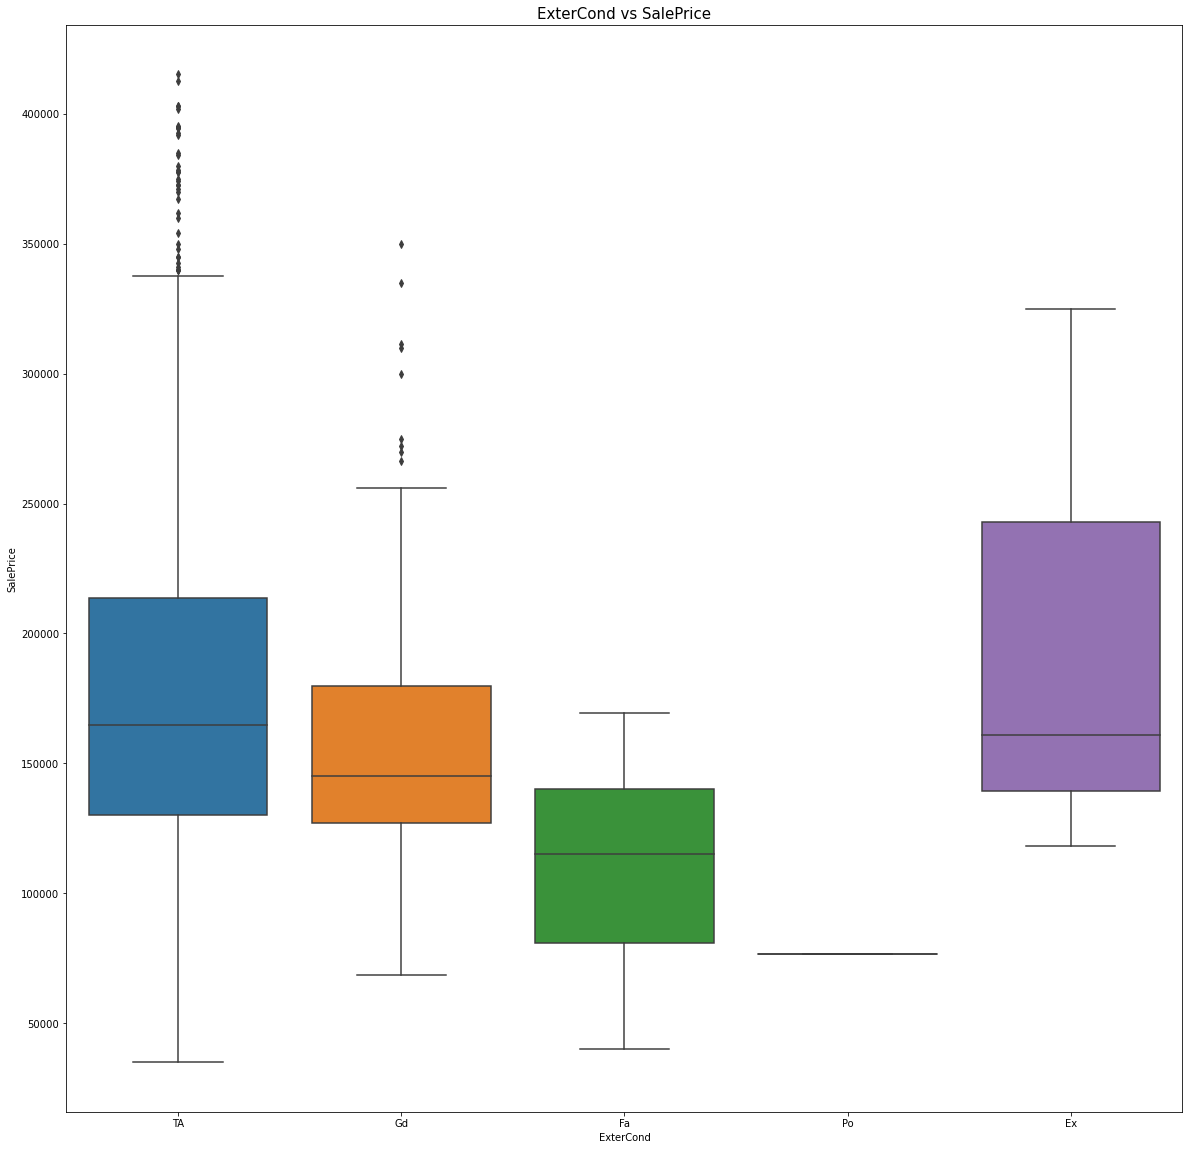

TA    1237
Gd     137
Fa      25
Ex       3
Po       1
Name: ExterCond, dtype: int64


Foundation


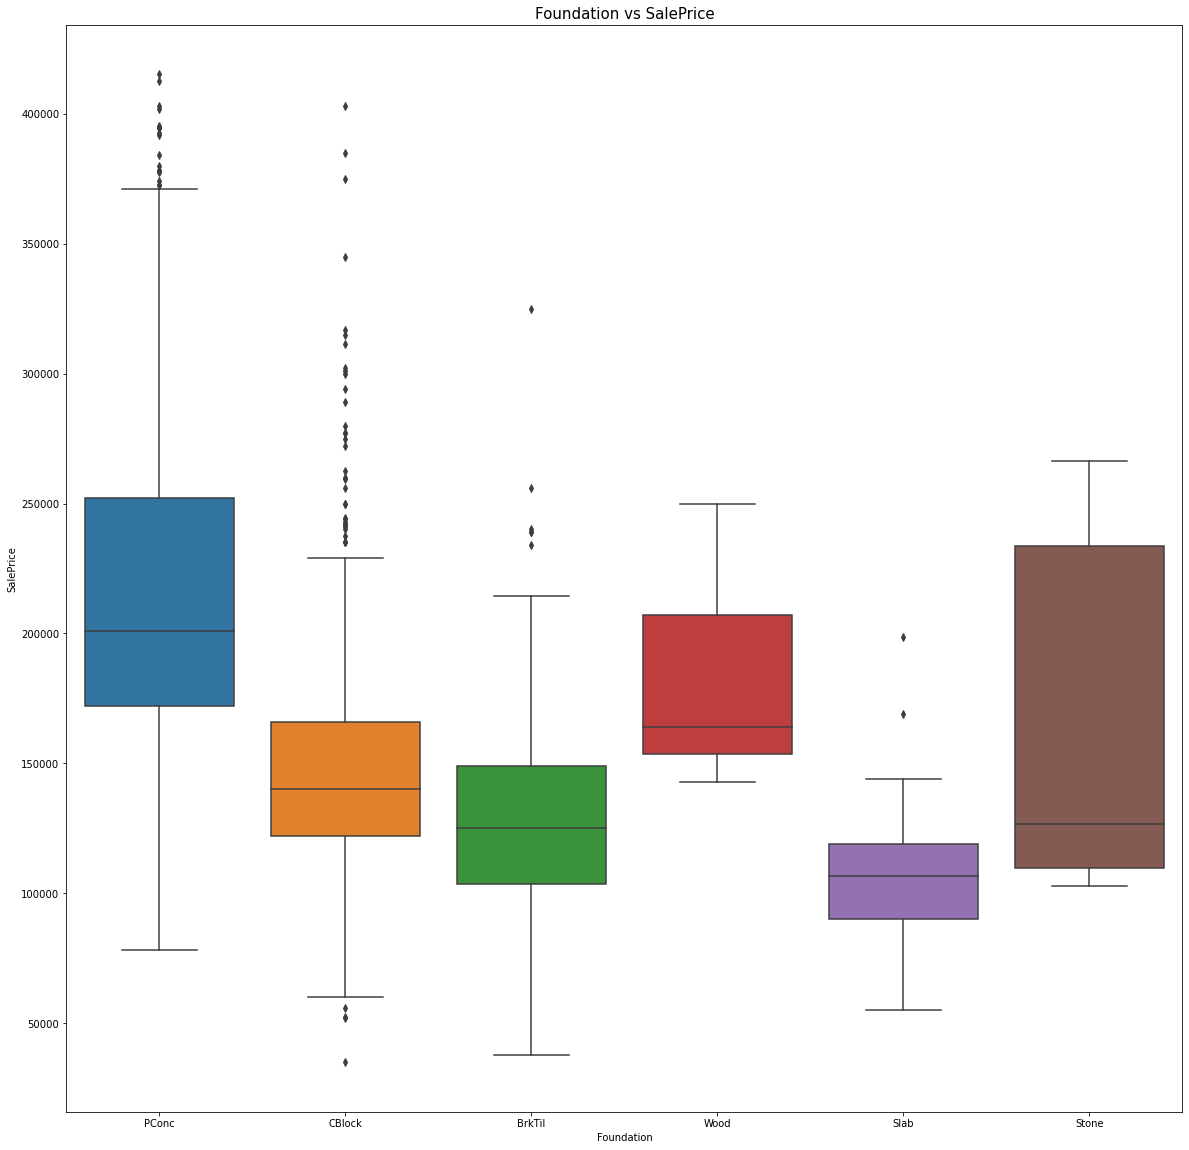

CBlock    617
PConc     613
BrkTil    141
Slab       23
Stone       6
Wood        3
Name: Foundation, dtype: int64


BsmtQual


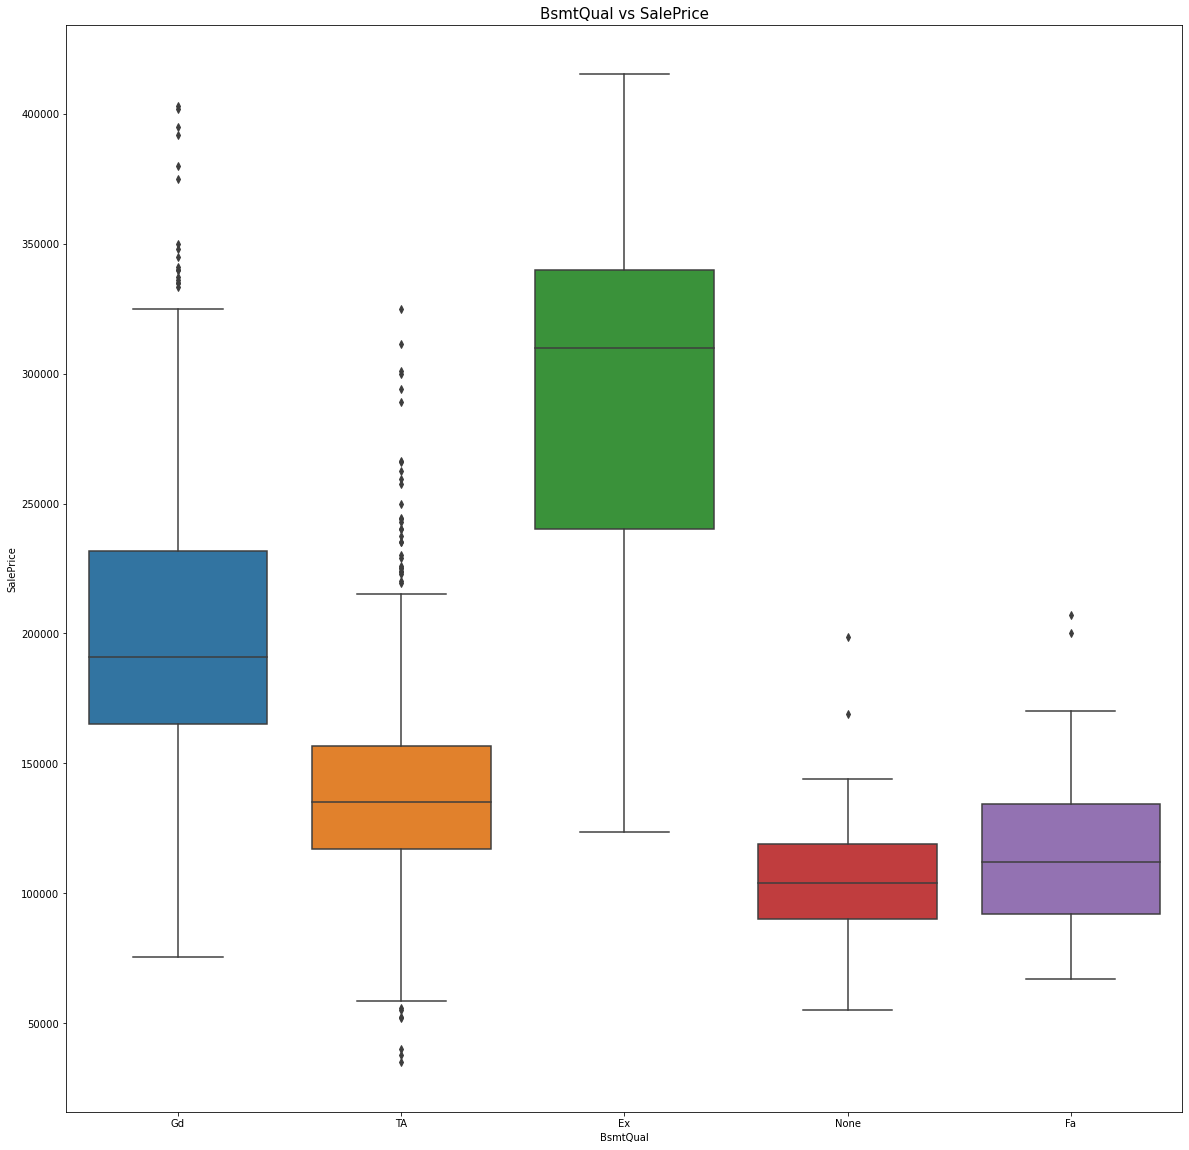

TA      633
Gd      603
Ex       97
None     36
Fa       34
Name: BsmtQual, dtype: int64


BsmtCond


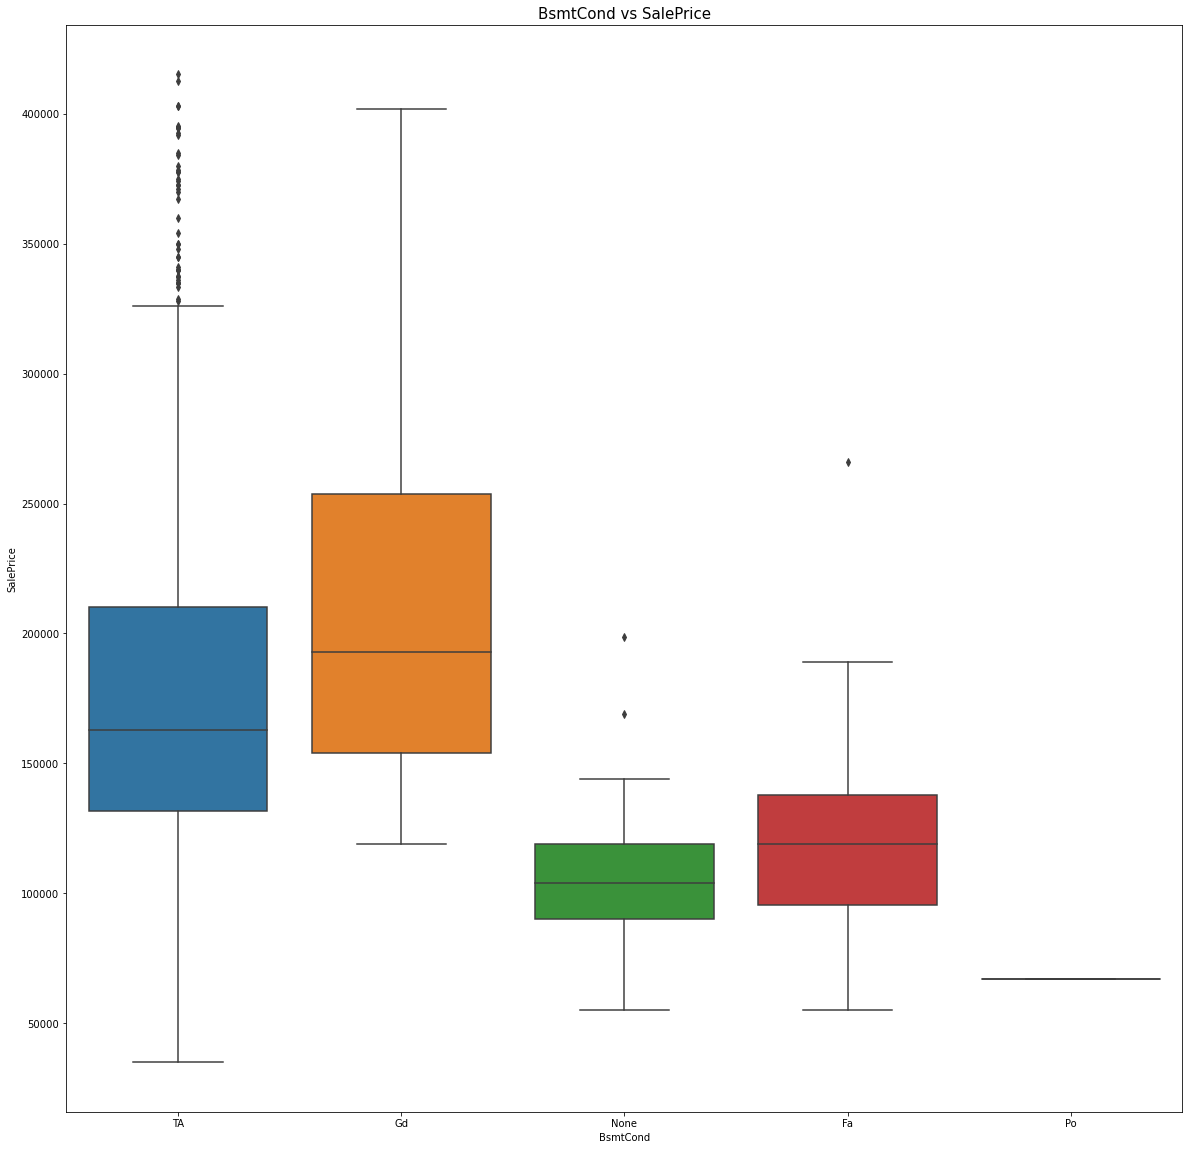

TA      1262
Gd        62
Fa        42
None      36
Po         1
Name: BsmtCond, dtype: int64


BsmtExposure


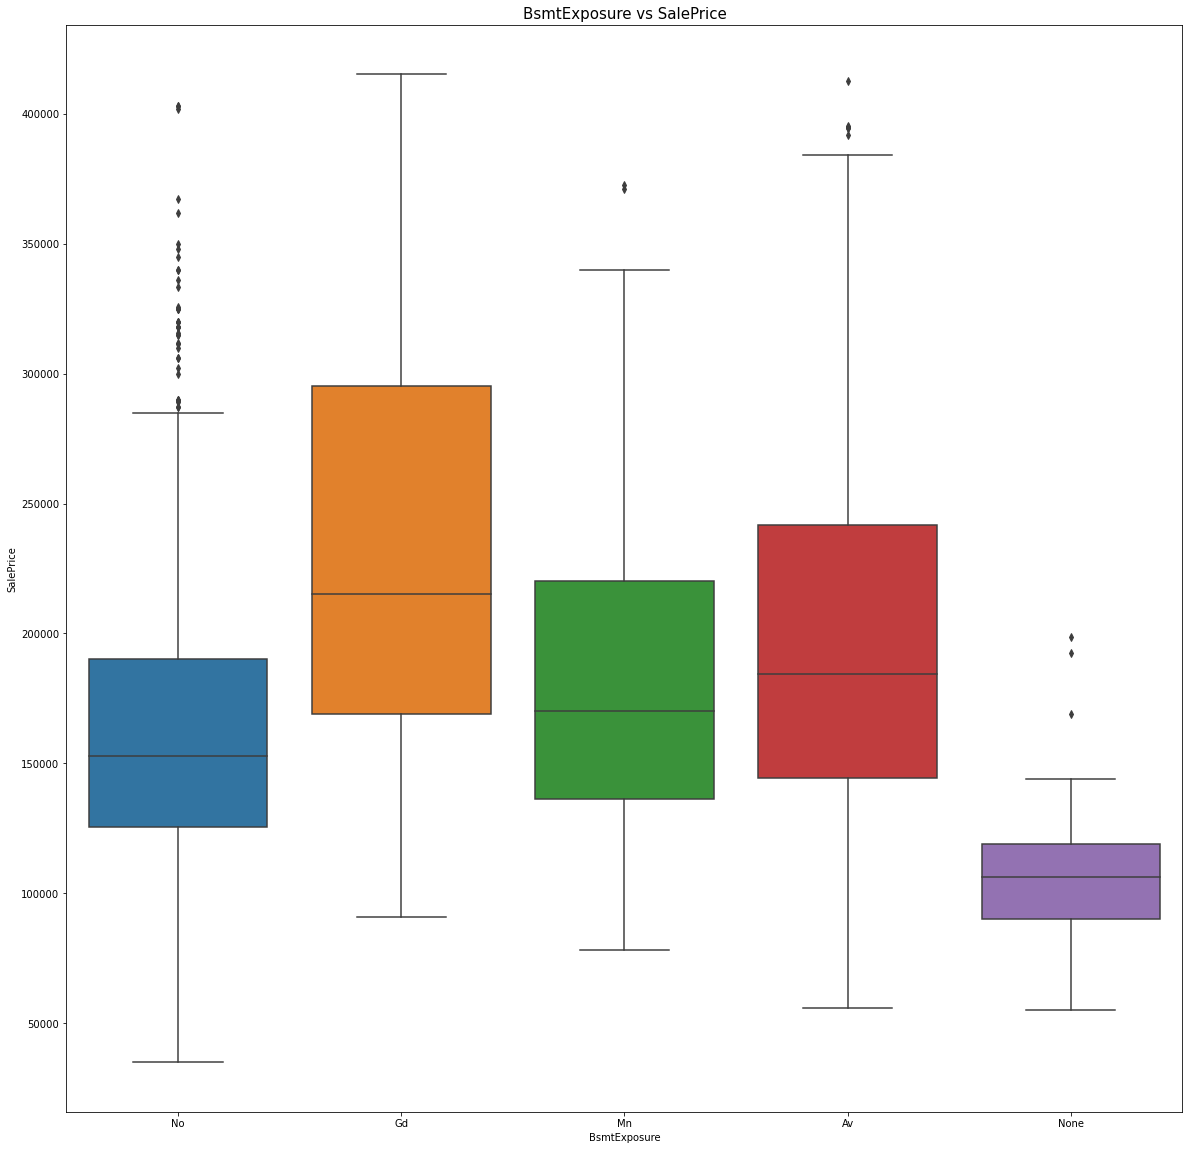

No      933
Av      212
Gd      114
Mn      107
None     37
Name: BsmtExposure, dtype: int64


BsmtFinType1


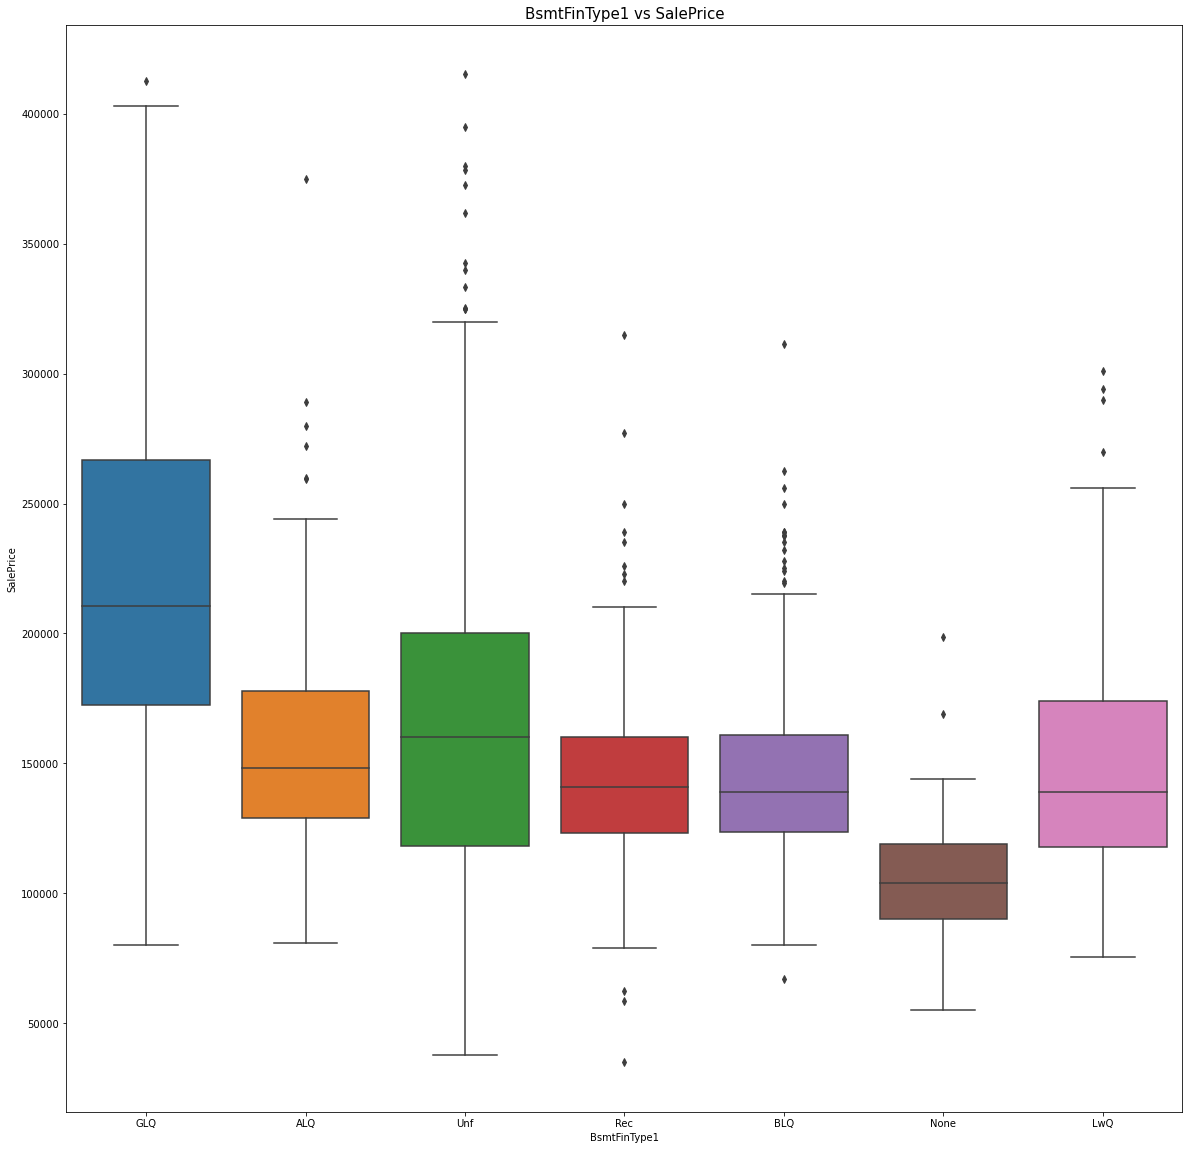

Unf     421
GLQ     390
ALQ     212
BLQ     143
Rec     129
LwQ      72
None     36
Name: BsmtFinType1, dtype: int64


BsmtFinType2


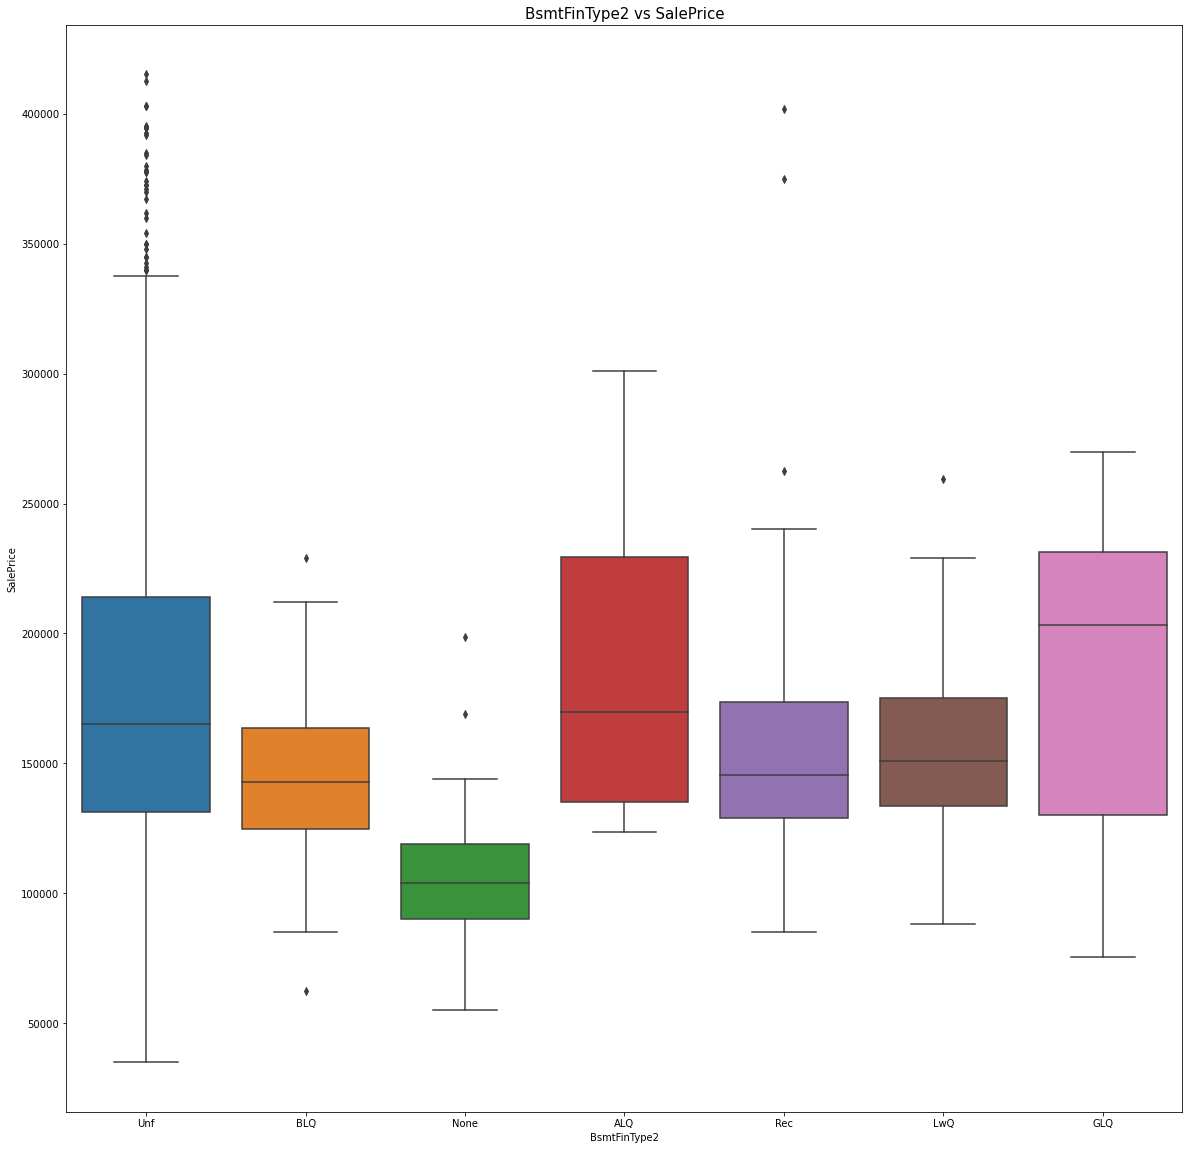

Unf     1209
Rec       52
LwQ       43
None      36
BLQ       31
ALQ       18
GLQ       14
Name: BsmtFinType2, dtype: int64


HeatingQC


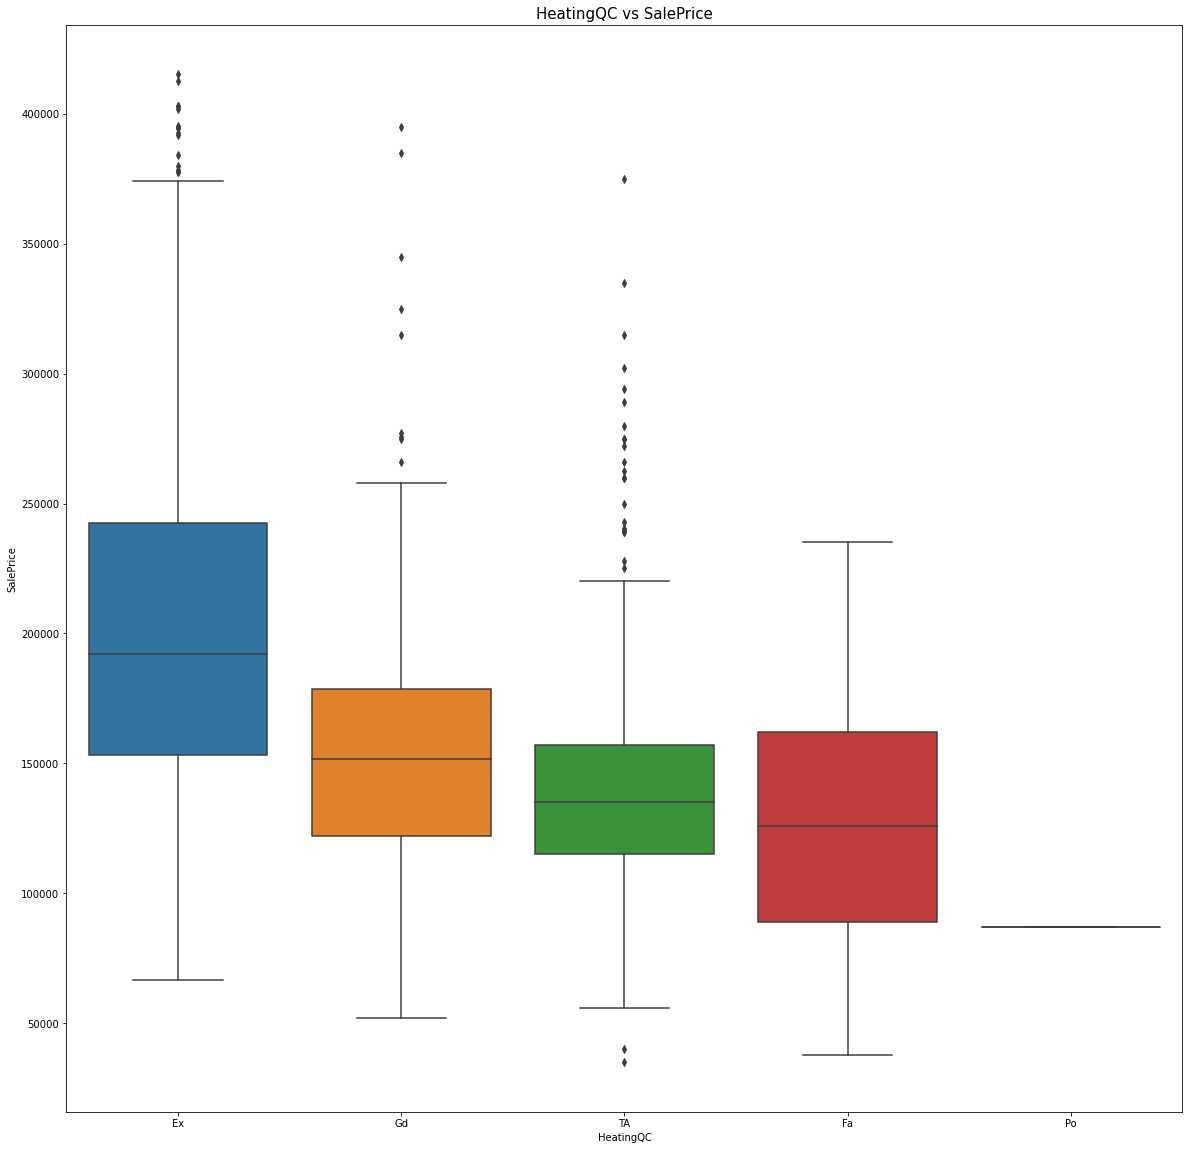

Ex    704
TA    415
Gd    236
Fa     47
Po      1
Name: HeatingQC, dtype: int64


KitchenQual


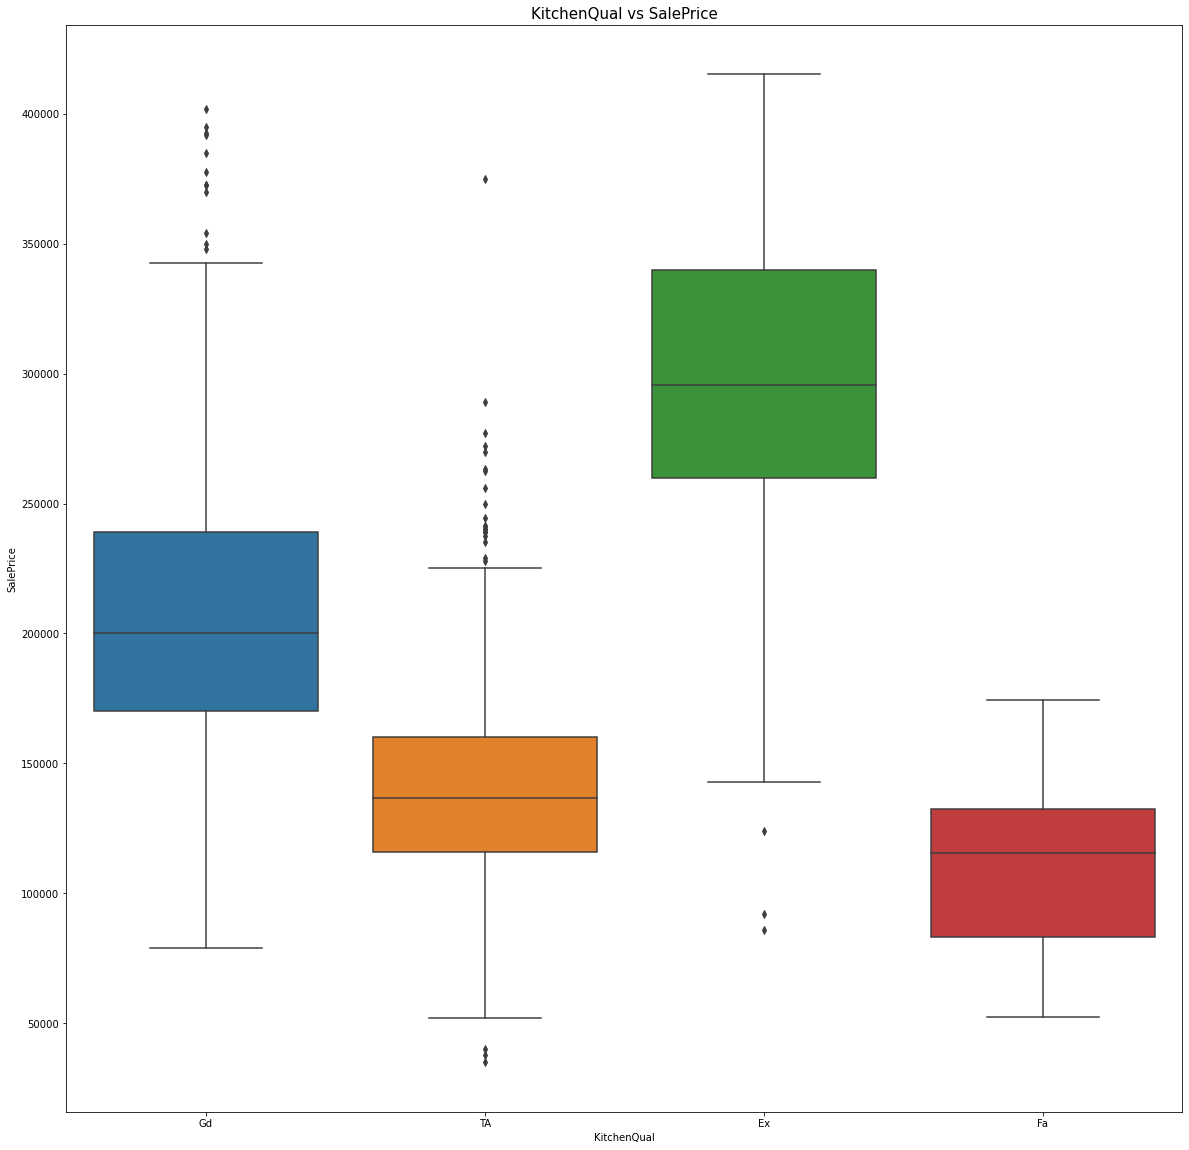

TA    724
Gd    568
Ex     77
Fa     34
Name: KitchenQual, dtype: int64


FireplaceQu


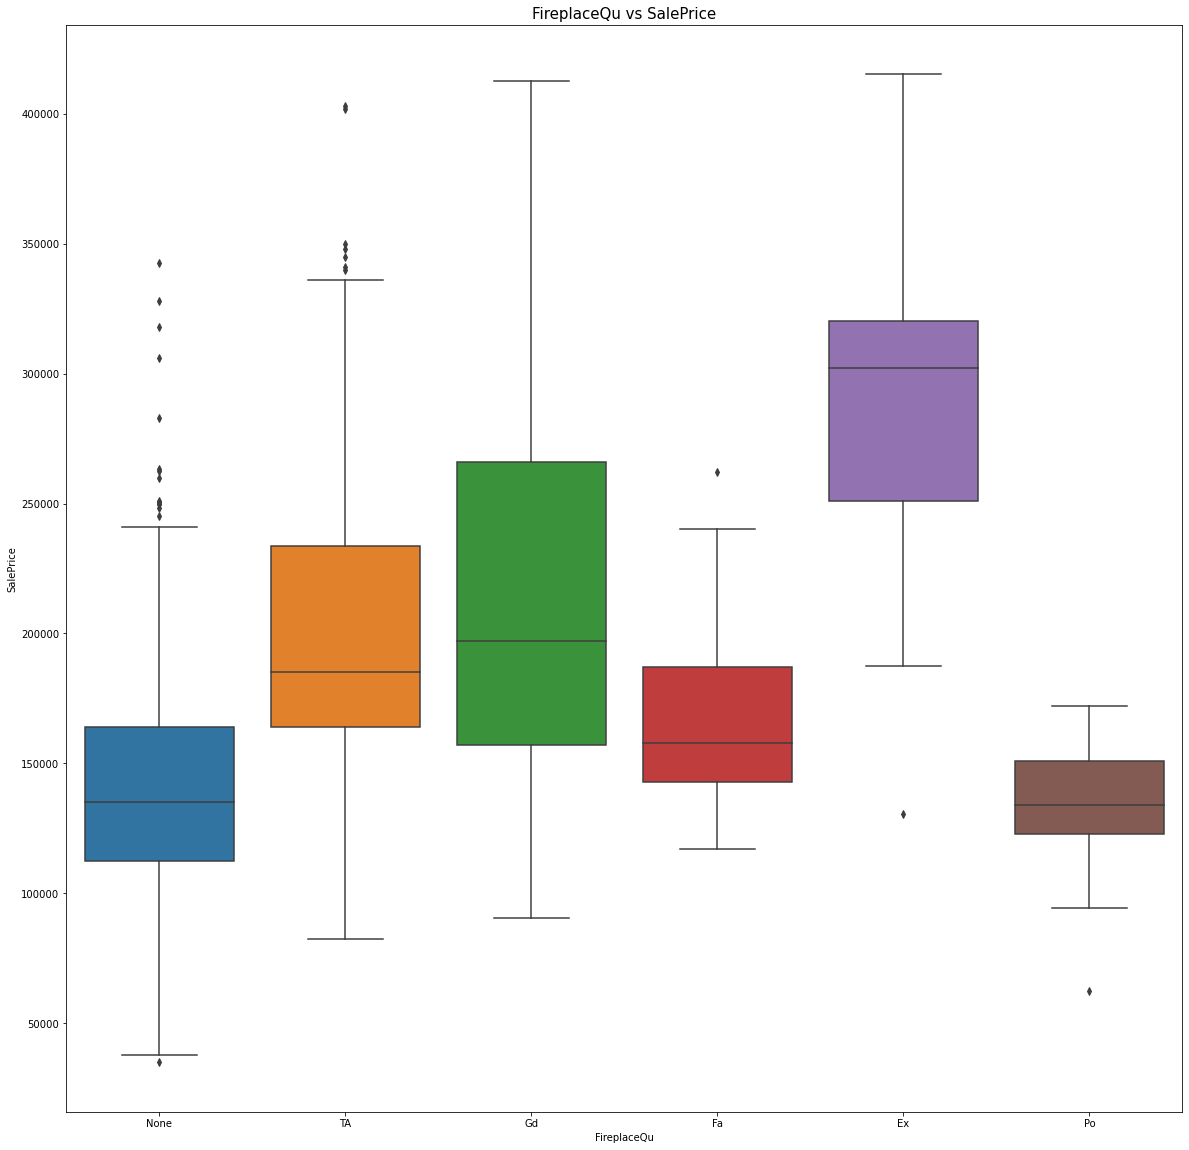

None    681
Gd      353
TA      302
Fa       33
Po       19
Ex       15
Name: FireplaceQu, dtype: int64


GarageType


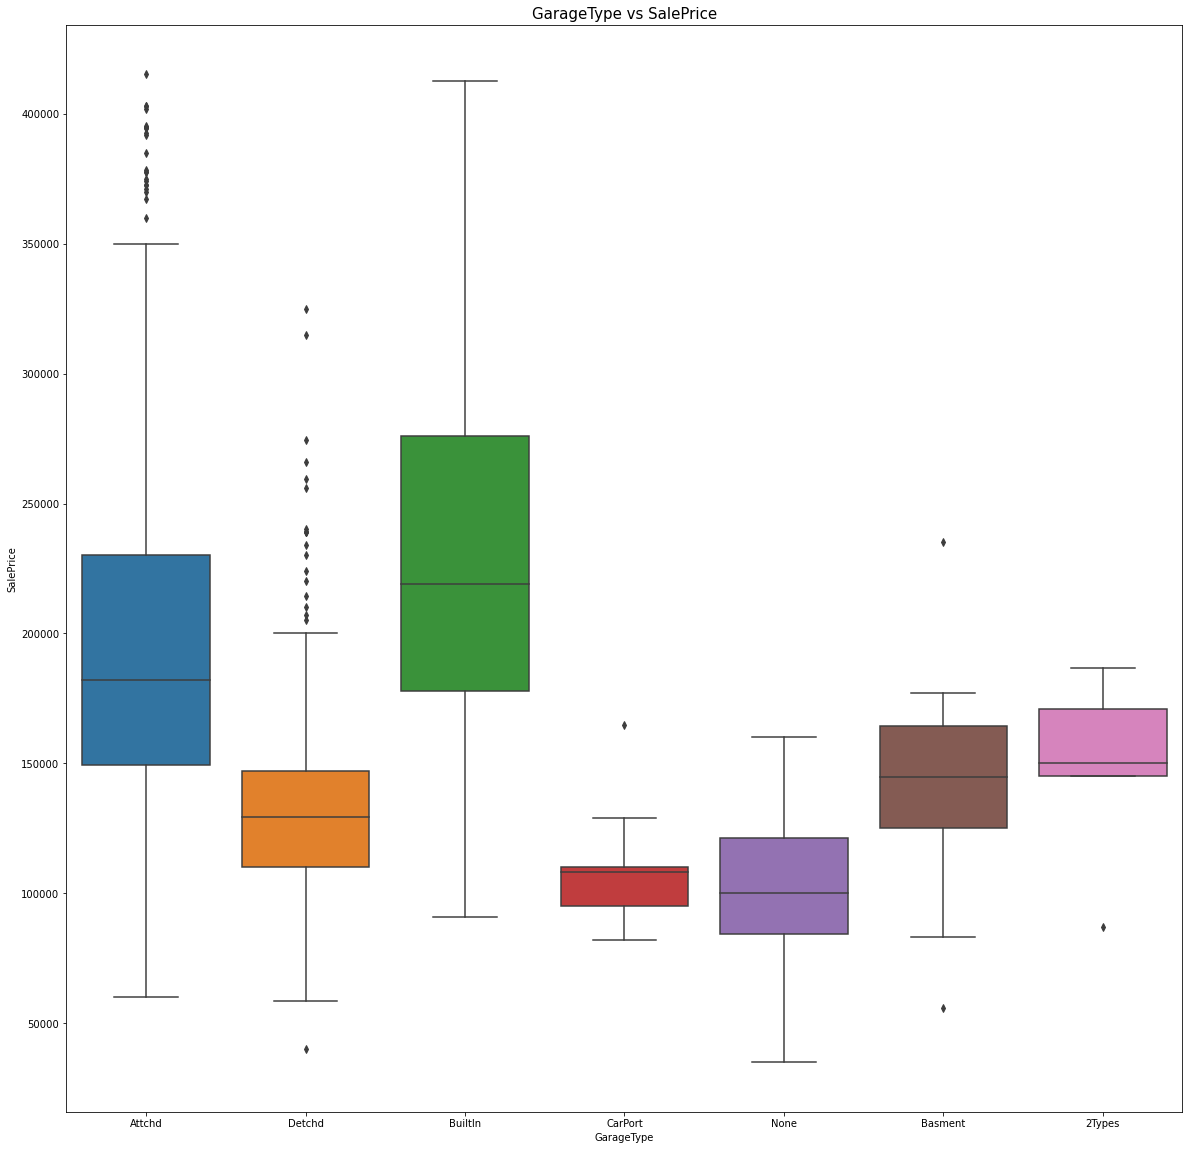

Attchd     841
Detchd     381
BuiltIn     77
None        74
Basment     16
CarPort      9
2Types       5
Name: GarageType, dtype: int64


GarageFinish


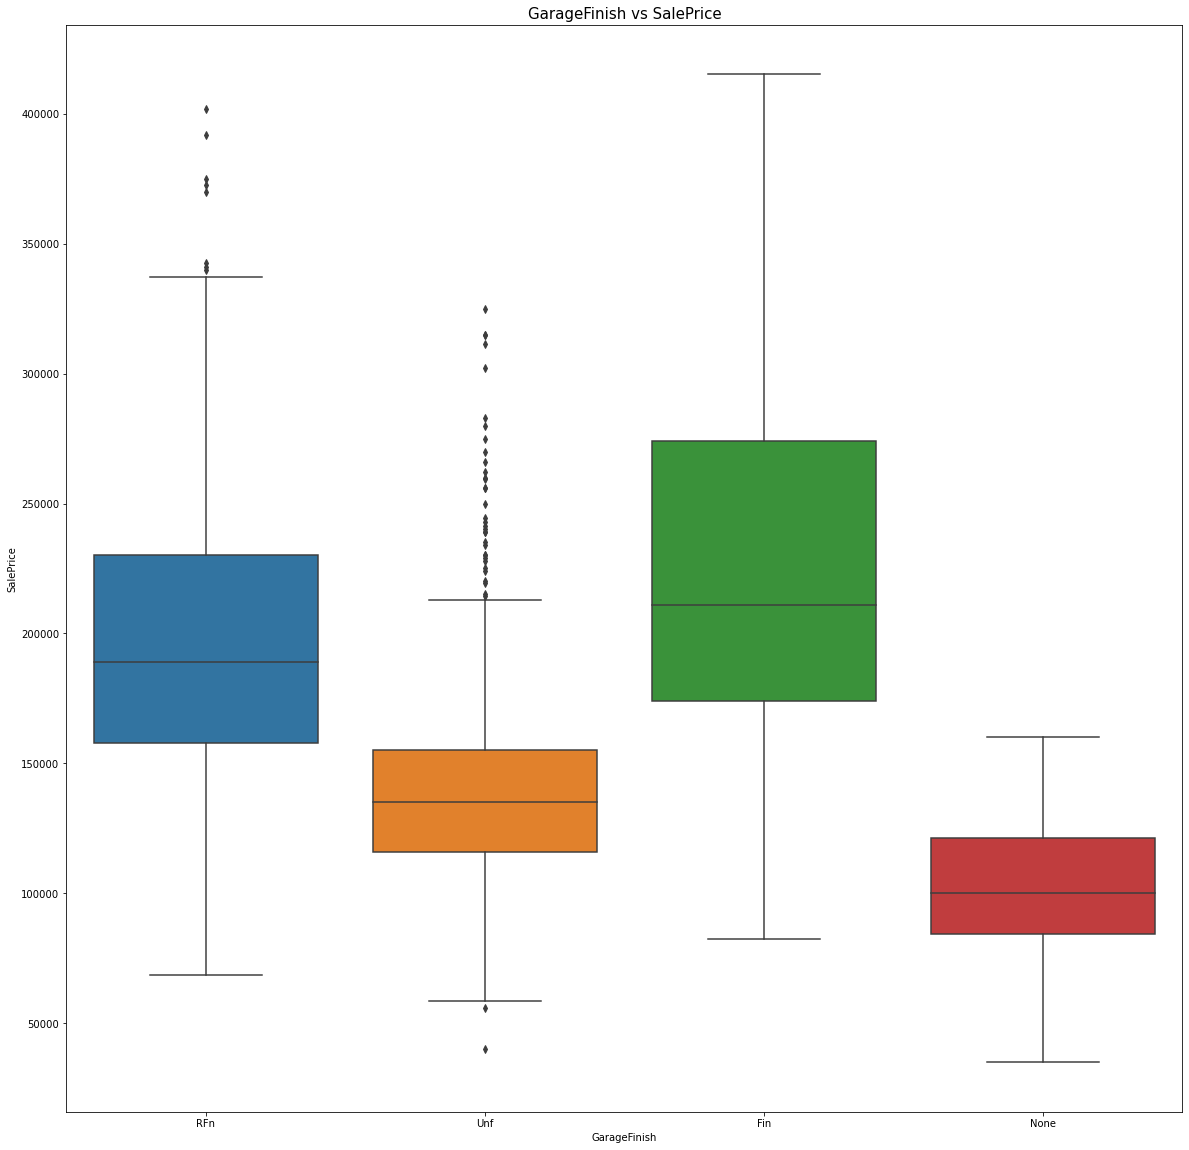

Unf     594
RFn     409
Fin     326
None     74
Name: GarageFinish, dtype: int64


GarageQual


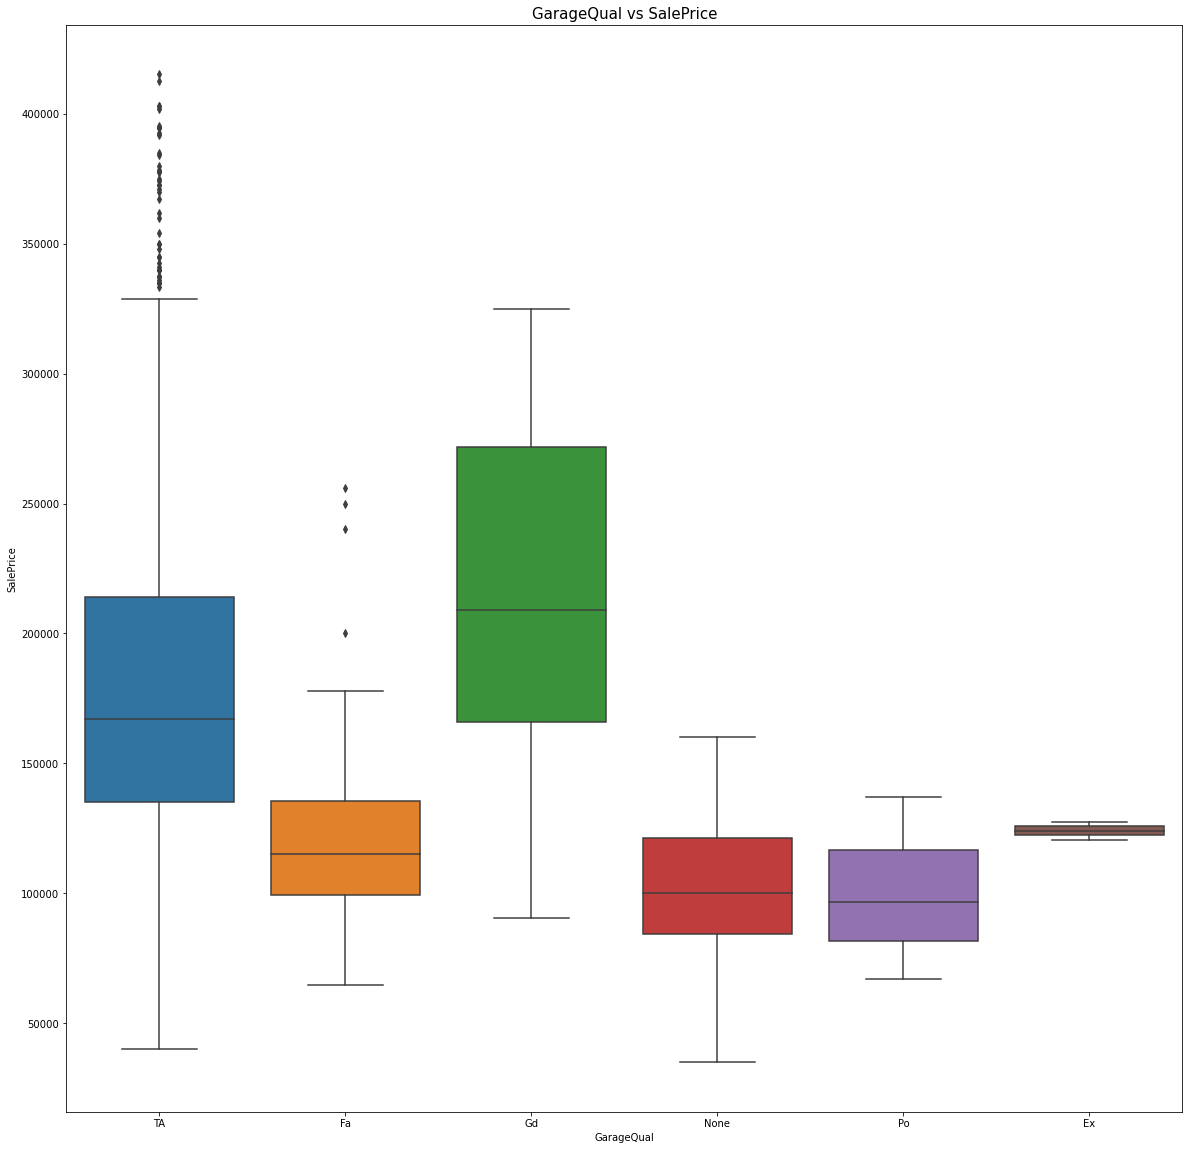

TA      1262
None      74
Fa        48
Gd        14
Po         3
Ex         2
Name: GarageQual, dtype: int64


MoSold


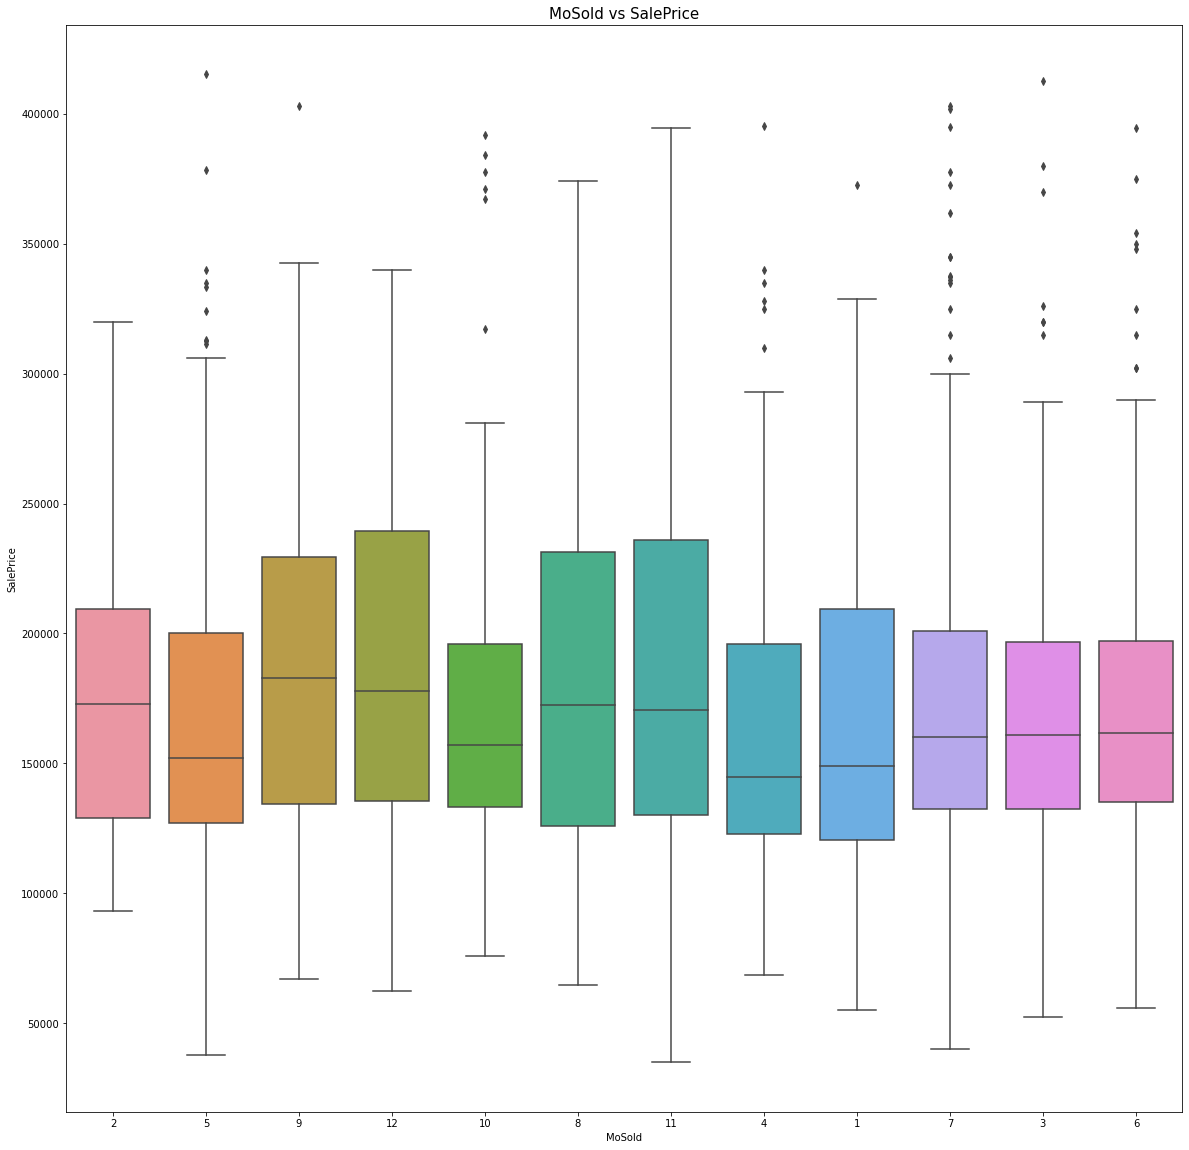

6     246
7     225
5     199
4     138
8     117
3      96
10     83
11     78
9      60
12     59
2      51
1      51
Name: MoSold, dtype: int64


SaleType


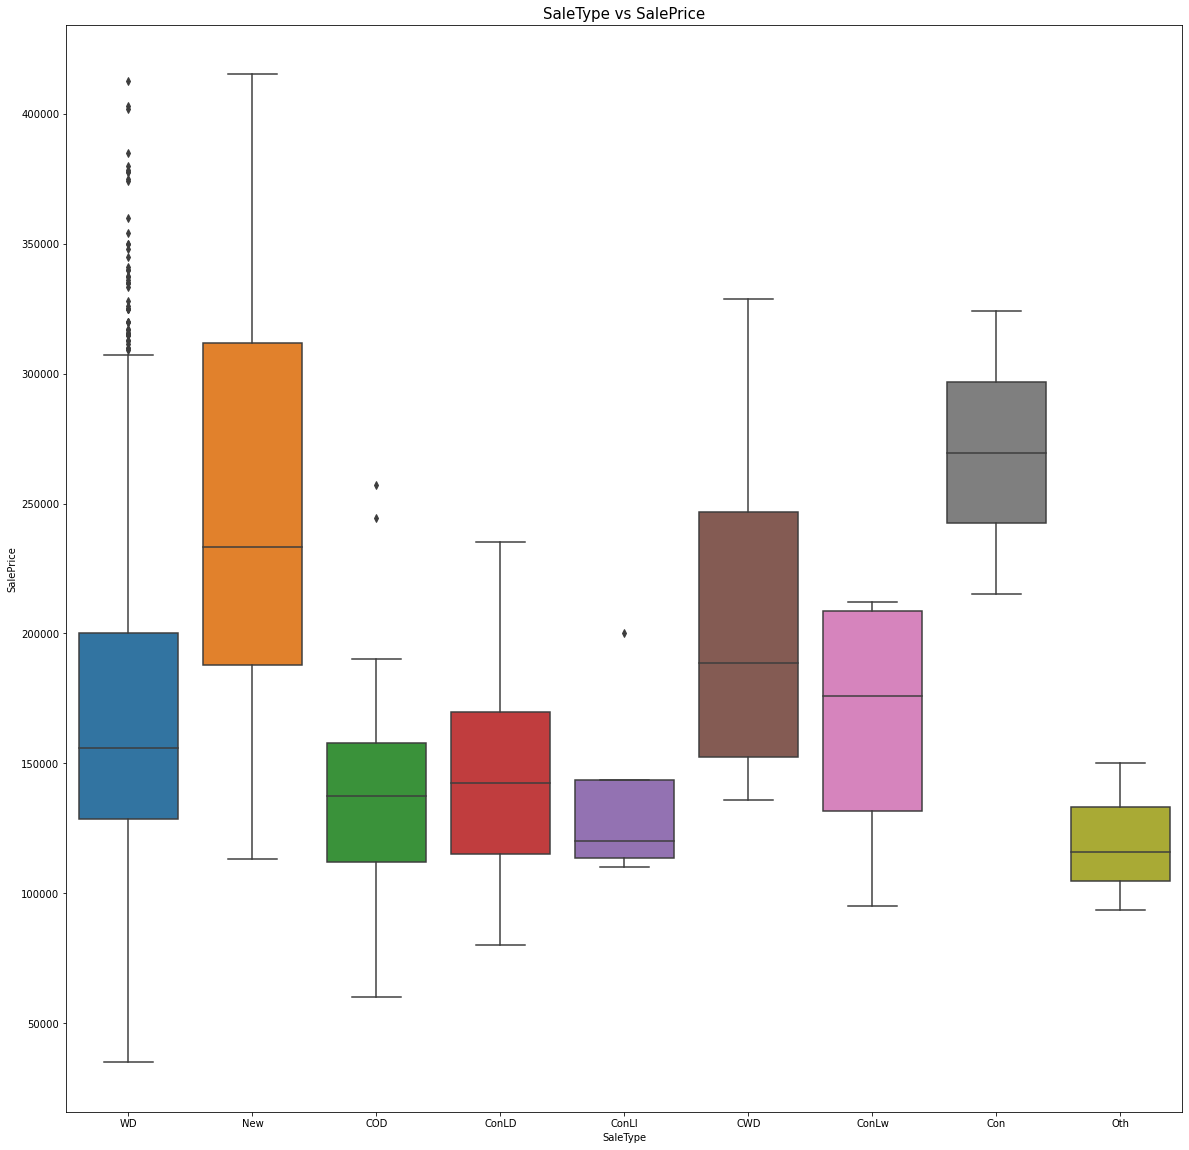

WD       1232
New       105
COD        41
ConLD       8
CWD         4
ConLw       4
ConLI       4
Oth         3
Con         2
Name: SaleType, dtype: int64


SaleCondition


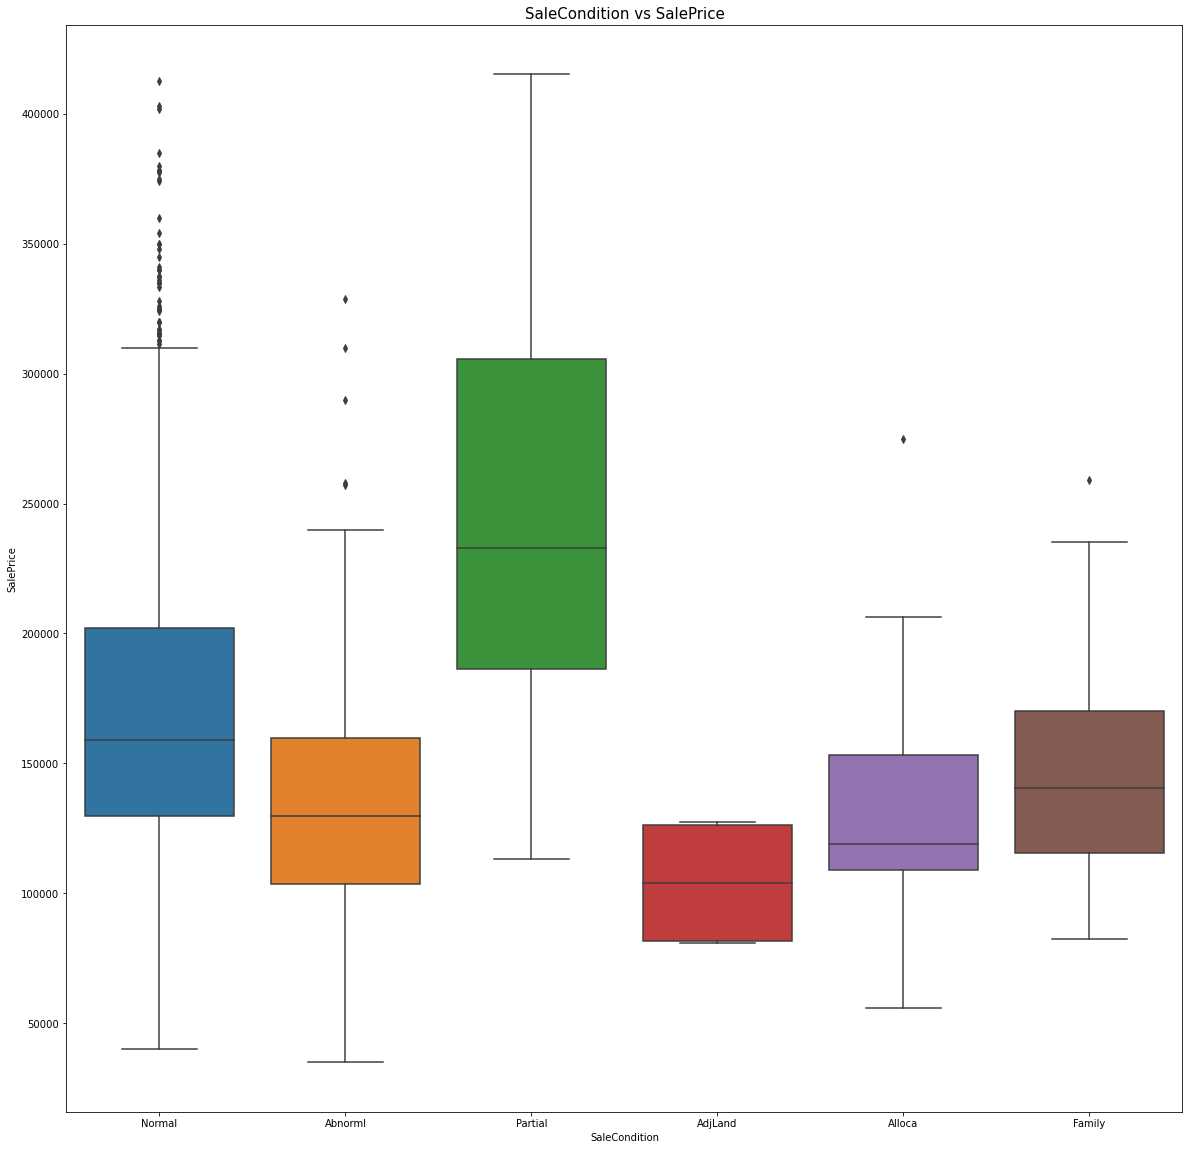

Normal     1167
Partial     108
Abnorml      95
Family       20
Alloca        9
AdjLand       4
Name: SaleCondition, dtype: int64




<Figure size 1440x1440 with 0 Axes>

In [539]:
for i in categorical.columns:
    print(i)
    sns.boxplot(data=train, x = i, y='SalePrice')
    plt.title(f'{i} vs SalePrice', fontsize = 15)
    plt.show()
    plt.figure(figsize=(20,20))
    print(train[i].value_counts())
    print ('\n')

In [340]:
# cat_feats_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 
#                      'HouseStyle', 'CentralAir', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 
#                      'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Heating', 
#                      'Foundation']
# cat_feats_ordinal = ['Alley', 'LotShape', 'LandContour', 'LotConfig', 
#                      'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 
#                      'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 
#                      'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
#                      'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
#                      'GarageCond','PavedDrive', 'Fence']

# numeric_feats_cont= ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'TotalSF1', 'YrBltAndRemod', 'TotalBathrooms', 'TotalPorchSF']
# numeric_feats_ordinal= ['OverallQual', 'OverallCond']
# numeric_feats_descrete= ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']




In [540]:
eda = ['LotConfig', 'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 
       'Exterior2nd', 'ExterCond', 'BsmtCond', 
       'BsmtFinType2', 'SaleType', 'SaleCondition','MSZoning', 'MSSubClass']

train = train.drop(eda, axis = 1)

In [541]:
eda = ['LotConfig', 'Condition1', 'BldgType', 'HouseStyle', 'Exterior1st', 
       'Exterior2nd', 'ExterCond', 'BsmtCond', 
       'BsmtFinType2', 'SaleType', 'SaleCondition','MSZoning', 'MSSubClass']

test = test.drop(eda, axis = 1)

In [661]:
categorical = train.select_dtypes(include = 'object')
categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
cat_feats_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 
                     'HouseStyle', 'CentralAir', 'MoSold', 'YrSold', 
                     'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st', 
                     'Exterior2nd', 'Heating', 'Foundation']

cat_feats_ordinal = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 
                     'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 
                     'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
                     'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                     'GarageCond','PavedDrive', 'Fence']

numeric_feats_cont= ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'TotalSF1', 'YrBltAndRemod', 'TotalBathrooms', 'TotalPorchSF']
numeric_feats_ordinal= ['OverallQual', 'OverallCond']
numeric_feats_descrete= ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

## Binarizing categorical features

## Ordinal categorical features

In [257]:
train['LotShape'].replace(to_replace = ['Reg', 'IR1', 'IR2', 'IR3'], value = [3, 2, 1,0], inplace = True)
train['LandContour'].replace(to_replace = ['Lvl', 'Bnk', 'Low', 'HLS'], value = [3, 2, 1,0], inplace = True)
train['LotConfig'].replace(to_replace = ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], value = [0, 3, 1, 2, 4], inplace = True)
train['LandSlope'].replace(to_replace = ['Gtl', 'Mod', 'Sev'], value = [2, 1, 0], inplace = True)
train['BldgType'].replace(to_replace = ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], value = [4, 3, 2, 1, 0], inplace = True)
train['BsmtExposure'].replace(to_replace = ['Gd', 'Av', 'Mn', 'No', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
train['BsmtFinType1'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['BsmtFinType2'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['Functional'].replace(to_replace = ['Typ', 'Min1', 'Min2', 'Mod',  'Maj1', 'Maj2', 'Sev'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['GarageType'].replace(to_replace = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
train['GarageFinish'].replace(to_replace = ['Fin', 'RFn', 'Unf', 'None'], value = [3, 2, 1, 0], inplace = True)
train['PavedDrive'].replace(to_replace = ['Y', 'P', 'N'], value = [2, 1, 0], inplace = True)


In [258]:
test['LotShape'].replace(to_replace = ['Reg', 'IR1', 'IR2', 'IR3'], value = [3, 2, 1,0], inplace = True)
test['LandContour'].replace(to_replace = ['Lvl', 'Bnk', 'Low', 'HLS'], value = [3, 2, 1,0], inplace = True)
test['LotConfig'].replace(to_replace = ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], value = [0, 3, 1, 2, 4], inplace = True)
test['LandSlope'].replace(to_replace = ['Gtl', 'Mod', 'Sev'], value = [2, 1, 0], inplace = True)
test['BldgType'].replace(to_replace = ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], value = [4, 3, 2, 1, 0], inplace = True)
test['BsmtExposure'].replace(to_replace = ['Gd', 'Av', 'Mn', 'No', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
test['BsmtFinType1'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
test['BsmtFinType2'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
test['Functional'].replace(to_replace = ['Typ', 'Min1', 'Min2', 'Mod',  'Maj1', 'Maj2', 'Sev'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
test['GarageType'].replace(to_replace = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
test['GarageFinish'].replace(to_replace = ['Fin', 'RFn', 'Unf', 'None'], value = [3, 2, 1, 0], inplace = True)
test['PavedDrive'].replace(to_replace = ['Y', 'P', 'N'], value = [2, 1, 0], inplace = True)


In [259]:
# train['LotShape'] =  train.LotShape.map(lambda x: 0 if x == 'Reg' else 1) #return 0 if regular lot shape, 1 if irregular

# train['GarageFinish'] =  train.GarageFinish.map(lambda x: 1 if x == 'Fin' or x == 'RFn' else 0) #return 1 if finished, 0 if non-finished
train['Neighborhood'] = train['Neighborhood'].map(lambda x: np.where(x in ["NoRidge","NridgHt","StoneBr"],'high', np.where(x in ["Timber", "Veenker",
"Somerst","ClearCr","Crawfor","CollgCr","Blmngtn","Gilbert","NWAmes","SawyerW"],'mid', 'low')))

train['RoofStyle'] = train.RoofStyle.apply(lambda x: 1 if x=='Flat' else 0)

# train['BsmtExposure'] = train.BsmtExposure.map(lambda x: 0 if x == 'No' or x == 'NE' else 1)




In [260]:
# test['LotShape'] =  test.LotShape.map(lambda x: 0 if x == 'Reg' else 1) #return 0 if regular lot shape, 1 if irregular

# test['GarageFinish'] =  test.GarageFinish.map(lambda x: 1 if x == 'Fin' or x == 'RFn' else 0) #return 1 if finished, 0 if non-finished
test['Neighborhood'] = test['Neighborhood'].map(lambda x: np.where(x in ["NoRidge","NridgHt","StoneBr"],'high', np.where(x in ["Timber", "Veenker",
"Somerst","ClearCr","Crawfor","CollgCr","Blmngtn","Gilbert","NWAmes","SawyerW"],'mid', 'low')))

test['RoofStyle'] = test.RoofStyle.apply(lambda x: 1 if x=='Flat' else 0)

# test['BsmtExposure'] = test.BsmtExposure.map(lambda x: 0 if x == 'No' or x == 'NE' else 1)




## Categorizing months into seasons

In [261]:
mapping = {"3": 'Spring',
           "4": 'Spring',
           "5": 'Spring',
          "6": 'Summer',
           "7": 'Summer',
           "8": 'Summer',
          "9": 'Fall',
           "10": 'Fall',
           "11": 'Fall',
          '12': 'Winter',
           '1': 'Winter', 
           '2': 'Winter'}
train.MoSold = train.MoSold.map(mapping)


In [262]:
mapping = {"3": 'Spring',
           "4": 'Spring',
           "5": 'Spring',
          "6": 'Summer',
           "7": 'Summer',
           "8": 'Summer',
          "9": 'Fall',
           "10": 'Fall',
           "11": 'Fall',
          '12': 'Winter',
           '1': 'Winter', 
           '2': 'Winter'}
test.MoSold = test.MoSold.map(mapping)


## Simplifying garage type

In [547]:
# def garagetype(x):
#     if 'Attchd' in x:
#         return 'Attchd'
#     elif 'Detchd' in x:
#         return 'Detchd'
#     elif 'BuiltIn' in x:
#         return 'BuiltIn'
#     else:
#         return ' Other'

In [548]:
# train['GarageType'] = train.GarageType.map(garagetype)

In [549]:
# test['GarageType'] = test.GarageType.map(garagetype)

In [738]:
categorical = train.select_dtypes(include = 'object')
categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Utilities', 'Neighborhood',
       'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [220]:
train.shape

(1403, 87)

In [221]:
test.shape

(1459, 86)

In [145]:
train['LandSlope'].value_counts()

2    1332
1      59
0      12
Name: LandSlope, dtype: int64

In [263]:
droplst = []
for i in range(len(train.columns)):
    if train[train.columns[i]].value_counts().iloc[0]/train.shape[0] > 0.9:
        droplst.append(train.columns[i])
        
train = train.drop(droplst, axis = 1)
print (f"Features that have over 90% domainance in one category: {droplst}")

Features that have over 90% domainance in one category: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofStyle', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'haspool', 'hasgarage', 'hasbsmt']


In [264]:
droplst = ['Street', 'LandContour', 'Utilities', 'LandSlope', 
           'Condition2', 'RoofStyle', 'RoofMatl', 'Heating', 'CentralAir', 
           'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 
           'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
           'haspool', 'hasgarage', 'hasbsmt']

for i in droplst:
    test = test.drop(i, axis = 1)


In [224]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'TotalBath', 'TotalSF',
       'OverallScore', 'HouseAge', 'OverallPorch', 'BaseArea', 'has2ndfloor',
       'hasfireplace'],
      dtype

In [265]:
train['YrSold'] = train['YrSold'].apply(str)

In [266]:
test['YrSold'] = test['YrSold'].apply(str)

In [267]:

# with open('housing_train.pkl', 'wb') as pickle_file:
#     pickle.dump(train, pickle_file)

In [268]:
# with open('housing_test.pkl', 'wb') as pickle_file:
#     pickle.dump(test, pickle_file)
# # 'MSSubClass', 'MSZoning',

In [438]:
cat_feats_nominal = ['Neighborhood', 'Condition1', 
                     'MoSold', 'YrSold', 
                     'SaleType', 'SaleCondition', 'MasVnrType',  
                     'Foundation']

In [429]:
with open("housing_train.pkl", "rb") as f:
    train = pickle.load(f)

In [430]:
with open("housing_test.pkl", "rb") as f:
    test = pickle.load(f)

## Dummifying all the remaining categorical variables

In [434]:
train = train.drop(['HouseStyle', 'Exterior1st', 'Exterior2nd', 'MSSubClass', 'MSZoning'], axis=1)

In [435]:
test = test.drop(['HouseStyle', 'Exterior1st', 'Exterior2nd', 'MSSubClass', 'MSZoning'], axis=1)

In [436]:
train.shape

(1403, 59)

In [439]:
nominal = pd.get_dummies(train[cat_feats_nominal], drop_first= True)

print(f'Shape of nominal features: {nominal.shape}')


Shape of nominal features: (1403, 38)


In [440]:
nominal_test = pd.get_dummies(test[cat_feats_nominal], drop_first= True)

print(f'Shape of nominal features: {nominal_test.shape}')


Shape of nominal features: (1459, 38)


In [441]:
train = train.drop(cat_feats_nominal, axis= 'columns')

train = pd.concat([train, nominal], axis='columns')

In [442]:
test = test.drop(cat_feats_nominal, axis= 'columns')

test = pd.concat([test, nominal_test], axis='columns')

In [553]:
mssub = pd.get_dummies(train.MSSubClass)
train = train.drop(['MSSubClass'], axis=1)
train = train.join(mssub)


mvt = pd.get_dummies(train.MasVnrType)[['None','BrkFace','Stone']]
mvt = mvt.rename(columns={'None': 'None',"BrkFace": "MasVnrBrkFace", "Stone": "MasVnrStone"})
train = train.drop(['MasVnrType'], axis=1)
train = train.join(mvt)

foundation = pd.get_dummies(train.Foundation)[['PConc','CBlock', 'BrkTil']]
foundation = foundation.rename(columns={'BrkTil': 'BrickTile', "PConc": "Concrete", "CBlock": "CinderBlock"})
train = train.drop(['Foundation'], axis=1)
train = train.join(foundation)

bsmtfin = pd.get_dummies(train.BsmtFinType1)[['GLQ']]
bsmtfin = bsmtfin.rename(columns={"GLQ": "BsmtGLQ"})
train = train.drop(['BsmtFinType1'], axis=1)
train = train.join(bsmtfin)


garagetype = pd.get_dummies(train.GarageType)[['Attchd','Detchd', 'BuiltIn']]
train = train.drop(['GarageType'], axis=1)
train = train.join(garagetype)

neighborhood = pd.get_dummies(train.Neighborhood, drop_first = True)
train = train.drop(['Neighborhood'], axis=1)
train = train.join(neighborhood)

Month = pd.get_dummies(train.MoSold, drop_first=True)
train = train.drop(['MoSold'], axis = 1)
train = pd.concat([train, Month], axis = 1)

In [554]:
mvt = pd.get_dummies(test.MasVnrType)[['None','BrkFace','Stone']]
mvt = mvt.rename(columns={'None': 'None',"BrkFace": "MasVnrBrkFace", "Stone": "MasVnrStone"})
test = test.drop(['MasVnrType'], axis=1)
test = test.join(mvt)

foundation = pd.get_dummies(test.Foundation)[['PConc','CBlock', 'BrkTil']]
foundation = foundation.rename(columns={'BrkTil': 'BrickTile', "PConc": "Concrete", "CBlock": "CinderBlock"})
test = test.drop(['Foundation'], axis=1)
test = test.join(foundation)

bsmtfin = pd.get_dummies(test.BsmtFinType1)[['GLQ']]
bsmtfin = bsmtfin.rename(columns={"GLQ": "BsmtGLQ"})
test = test.drop(['BsmtFinType1'], axis=1)
test = test.join(bsmtfin)


garagetype = pd.get_dummies(test.GarageType)[['Attchd','Detchd', 'BuiltIn']]
test = test.drop(['GarageType'], axis=1)
test = test.join(garagetype)

neighborhood = pd.get_dummies(test.Neighborhood, drop_first = True)
test = test.drop(['Neighborhood'], axis=1)
test = test.join(neighborhood)

Month = pd.get_dummies(test.MoSold, drop_first=True)
test = test.drop(['MoSold'], axis = 1)
test = pd.concat([test, Month], axis = 1)

## Converting quality features into ordinal variables

In [443]:
#converting: ExterQual, 'BsmtQual', HeatingQC, 'KitchenQual', 'FireplaceQu', 'GarageQual'
def quality(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1

In [444]:
ordinal = ["ExterQual", 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'BsmtCond', 'ExterCond']
for i in ordinal:
    print (train[i].dtype)

object
object
object
object
object
object
object
object


In [445]:
ordinal = ["ExterQual", 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'BsmtCond', 'ExterCond']
for i in ordinal:
    print (test[i].dtype)

object
object
object
object
object
object
object
object


In [446]:
ordinal = ["ExterQual", 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'BsmtCond', 'ExterCond']
for i in ordinal:
    train[i] = train[i].map(quality)
    

In [447]:
ordinal = ["ExterQual", 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
            'BsmtCond', 'ExterCond']
for i in ordinal:
    test[i] = test[i].map(quality)

In [448]:
categorical = train.select_dtypes(include = 'object')
categorical.columns

Index([], dtype='object')

In [451]:
with open('housing_train_cleaned.pkl', 'wb') as pickle_file:
    pickle.dump(train, pickle_file)

In [452]:
with open('housing_test_cleaned.pkl', 'wb') as pickle_file:
    pickle.dump(test, pickle_file)

## ML fit

In [488]:
import re
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn import pipeline
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import  StackingCVRegressor

from sklearn.metrics import mean_squared_error

In [550]:
saleprice = train.SalePrice
X = train.drop(['SalePrice'], axis=1)
y = np.log(saleprice)

In [551]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [456]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [598]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)


In [552]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train, y_train)

print("R-squared:", ols.score(X_train, y_train))
# print("Intercept:", ols.intercept_)
# print("Coefficients:", ols.coef_)

R-squared: 0.9086087511888835


In [553]:
df_ols_coef = pd.DataFrame(ols.coef_, index=X_train.columns, columns=['Coefficients'])


In [556]:
predictions_train = ols.predict(X_train)
predictions_test = ols.predict(X_test)

In [557]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ols, X_train, y_train, cv=5)

print('Training Score:', ols.score(X_train, y_train))
print('Cross validation scores:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', ols.score(X_test, y_test))

Training Score: 0.9086087511888835
Cross validation scores: [0.86272305 0.90784044 0.90695967 0.87509905 0.85986351]
Mean cross validation score: 0.882497143087433
Test Score: 0.9027266607786693


In [558]:
from sklearn.model_selection import KFold
# Shuffled 5-fold cross validation scores are rather similar
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores_shuffled = cross_val_score(ols, X_train, y_train, cv=kf)

print('Shuffled cross validation score:', cv_scores_shuffled)
print('Mean shuffled cross validation score:', cv_scores_shuffled.mean())

Shuffled cross validation score: [0.89455772 0.88328938 0.90129872 0.85417332 0.86313455]
Mean shuffled cross validation score: 0.8792907376284852


In [599]:
test_pred = ols.predict(X_test)
train_pred = ols.predict(X_train)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08175401961506298
MSE: 0.013099327733968514
RMSE: 0.11445229457712289
R2 Square 0.9027266607786693
------------------------------
Train set evaluation:
MAE: 0.0783083219645912
MSE: 0.012391734017601254
RMSE: 0.11131816571252534
R2 Square 0.9086087511888835


In [560]:
ols_residuals_0609 = (y_train - predictions_train)
ols_residuals_0609.describe()

count    9.820000e+02
mean     2.293707e-15
std      1.113749e-01
min     -7.833818e-01
25%     -5.624728e-02
50%      1.172396e-13
75%      6.385686e-02
max      4.858590e-01
Name: SalePrice, dtype: float64

In [679]:
# Acceptable skew and kurtosis values
print("Skew:", ols_residuals_0609.skew())
print("Kurtosis:", ols_residuals_0609.kurtosis())
stat, p = shapiro(ols_residuals_0609)
print('Shapiro-Wilk test on normality=%.3f, p=%.3f' % (stat, p))

Skew: -1.1131234050669518
Kurtosis: 7.712138237813079
Shapiro-Wilk test on normality=0.919, p=0.000


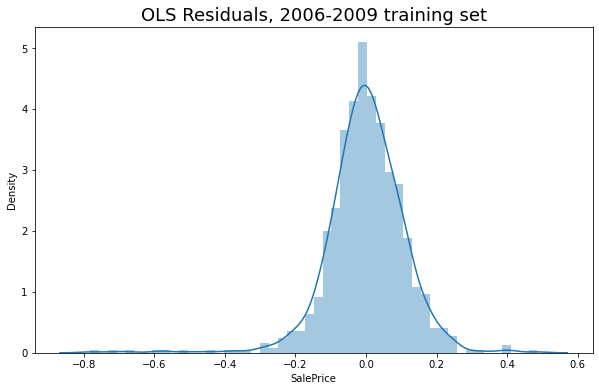

In [680]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(ols_residuals_0609, bins=50, kde=True, ax=ax)
plt.title('OLS Residuals, 2006-2009 training set', fontsize=18);


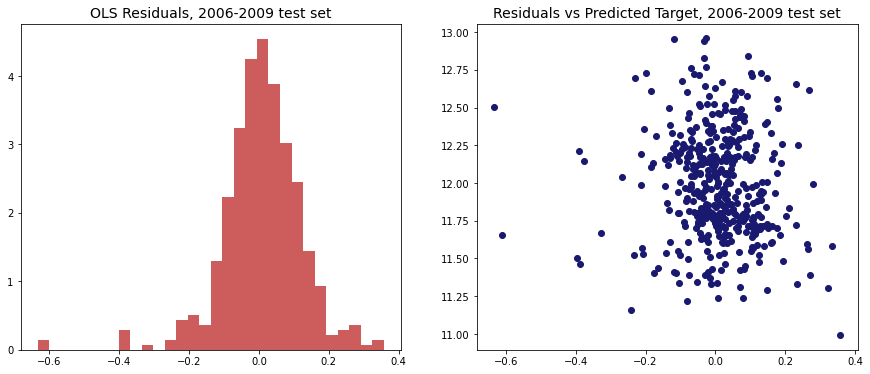

In [681]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))
ax[0].hist(ols_residuals_test, density=True, bins=30, color='indianred')
ax[0].set_title('OLS Residuals, 2006-2009 test set', fontsize=14)
ax[1].scatter(ols_residuals_test, predictions_test, color='midnightblue')
ax[1].set_title('Residuals vs Predicted Target, 2006-2009 test set', fontsize=14);


# RIDGE REGRESSION

In [606]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
# Ridge Cross-Validation
ridge_mod = RidgeCV(alphas=np.logspace(-100, 100, 100), cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Best Ridge alpha: 10.235310218990268
Training score: 0.9061295421836904
Test Score: 0.9084455058002151


In [607]:
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()

In [608]:
# Confirmed similar to the above Ridge CV scores
ridge_mod = Ridge(alpha=10.24)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.86400213 0.907691   0.90757448 0.88306708 0.87082483]
Mean cross-validated training score: 0.8866319031594344
Training Score: 0.906128826340014
Test Score: 0.9084455137722297


In [609]:
# ridge_predictions_train = ridge_mod.predict(X_train)
# ridge_predictions_test = ridge_mod.predict(X_test)

In [615]:
test_pred = ridge_mod.predict(X_test)
train_pred = ridge_mod.predict(X_train)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08049566028135234
MSE: 0.012329197601450074
RMSE: 0.11103691999263161
R2 Square 0.9084455137722297
------------------------------
Train set evaluation:
MAE: 0.07966611633219521
MSE: 0.01272798688109307
RMSE: 0.11281838006766925
R2 Square 0.906128826340014


In [682]:
ridge_residuals = (y_train - train_pred)
ridge_residuals.describe()

count    9.820000e+02
mean     3.364586e-16
std      1.135432e-01
min     -7.905390e-01
25%     -5.652757e-02
50%      2.103376e-03
75%      6.341079e-02
max      5.027291e-01
Name: SalePrice, dtype: float64

In [686]:
ridge_residuals_test = (y_test - test_pred)

In [683]:
# Acceptable skew and kurtosis values
print("Skew:", ridge_residuals.skew())
print("Kurtosis:", ridge_residuals.kurtosis())
stat, p = shapiro(ridge_residuals)
print('Shapiro-Wilk test on normality=%.3f, p=%.3f' % (stat, p))

Skew: -1.1552191644492484
Kurtosis: 7.677636756854785
Shapiro-Wilk test on normality=0.919, p=0.000


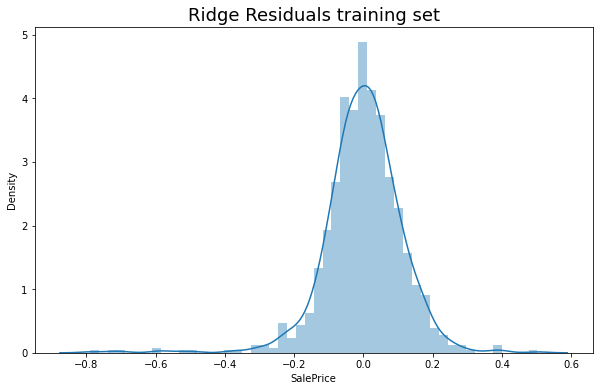

In [684]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(ridge_residuals, bins=50, kde=True, ax=ax)
plt.title('Ridge Residuals training set', fontsize=18);


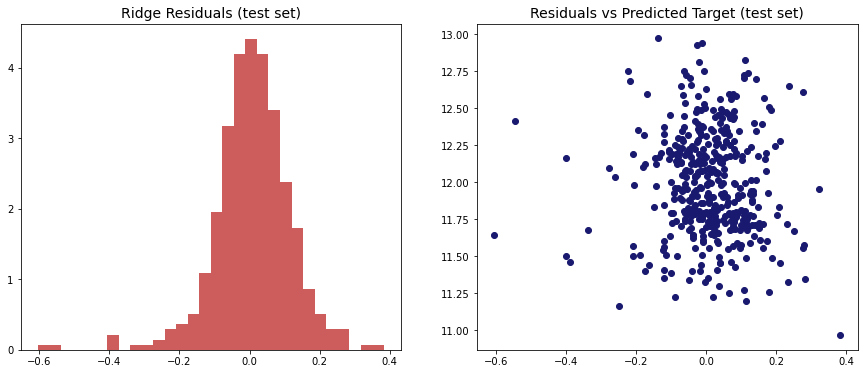

In [688]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))
ax[0].hist(ridge_residuals_test, density=True, bins=30, color='indianred')
ax[0].set_title('Ridge Residuals (test set)', fontsize=14)
ax[1].scatter(ridge_residuals_test, test_pred, color='midnightblue')
ax[1].set_title('Residuals vs Predicted Target (test set)', fontsize=14);


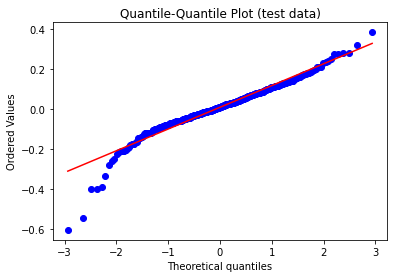

In [690]:
from scipy import stats
stats.probplot(ridge_residuals_test, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot (test data)")
plt.show()

In [616]:
# Lasso Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-10, 10, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.0004641588833612782
Training score: 0.9049900830671274
Test Score: 0.90772935566916


In [617]:
# Confirmed similar to the above Ridge CV scores
lasso_mod = Lasso(0.00046)

scores = cross_val_score(lasso_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

lasso_mod.fit(X_train, y_train)
print("Training Score:", lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Cross-validated training scores: [0.86420503 0.90881508 0.90818311 0.88183754 0.87192481]
Mean cross-validated training score: 0.8869931118305308
Training Score: 0.9050155301805252
Test Score: 0.9077115897413175


In [618]:
lasso_predictions = lasso_mod.predict(X_test)

In [619]:
test_pred = lasso_mod.predict(X_test)
train_pred = lasso_mod.predict(X_train)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08058610022155313
MSE: 0.012428031582988214
RMSE: 0.11148108172684823
R2 Square 0.9077115897413175
------------------------------
Train set evaluation:
MAE: 0.0800445424649739
MSE: 0.012878938641471292
RMSE: 0.11348541157995283
R2 Square 0.9050155301805252


In [620]:
df_lasso_coef = pd.DataFrame(lasso_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_lasso_coef['Coef_abs'] = df_lasso_coef.Coefficients.abs()

In [621]:
coef_0609 = pd.concat([df_ols_coef['Coefficients'], df_ridge_coef['Coefficients'], df_lasso_coef['Coefficients']])
coef_0609 = pd.DataFrame(coef_0609)

In [622]:
coef_0609.reset_index(level=0, inplace=True)
coef_0609.columns = ['variable', 'coefficient']
coef_0609

,variable,coefficient
0,LotFrontage,0.000164
1,LotArea,0.000002
2,LotShape,-0.004396
3,LotConfig,0.001787
4,BldgType,0.020284
...,...,...
259,Foundation_CBlock,0.000000
260,Foundation_PConc,0.024750
261,Foundation_Slab,0.000000
262,Foundation_Stone,-0.000000


In [623]:
coef_0609.loc[0:87, "model"] = "ols"
coef_0609.loc[88:175, "model"] = "ridge" 
coef_0609.loc[176:264, "model"] = "lasso"

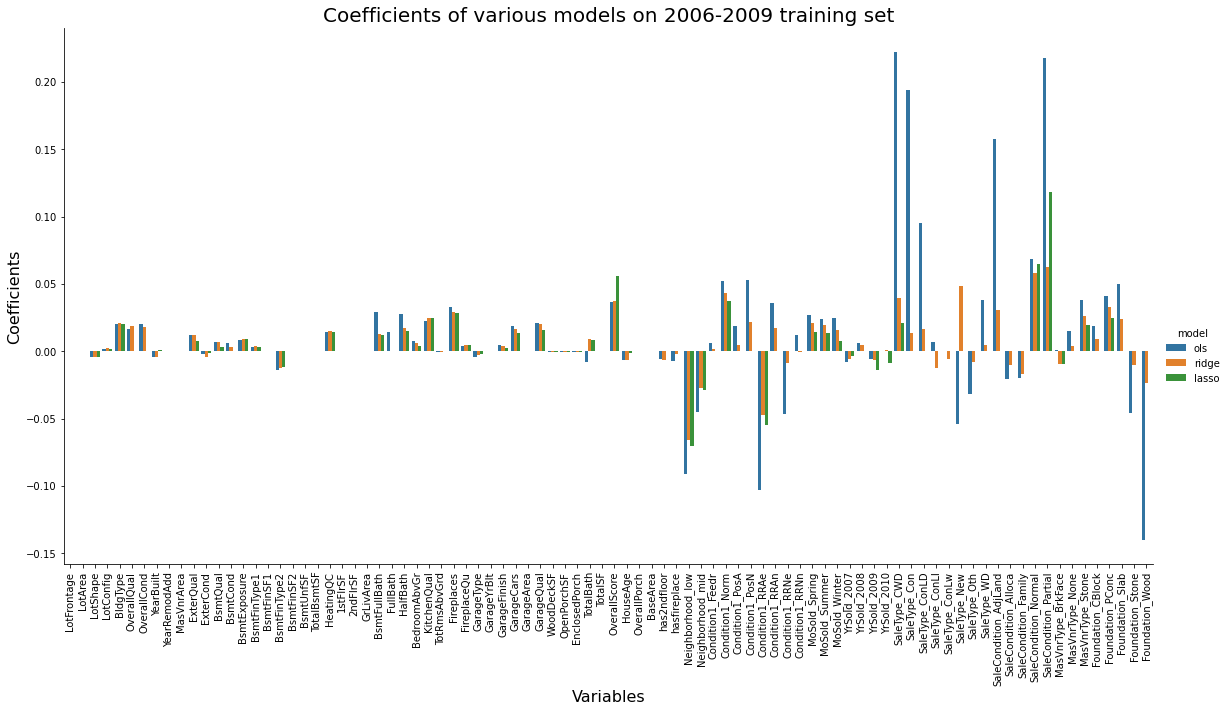

In [624]:
w = sns.catplot(x='variable', y='coefficient', hue='model', data=coef_0609, kind='bar', height=8, aspect=2)
# set rotation
w.set_xticklabels(rotation=90)

plt.title('Coefficients of various models on 2006-2009 training set', fontsize=20)
plt.xlabel("Variables", size=16)
plt.ylabel("Coefficients", size=16)
plt.show()

In [ ]:
lasso feature impo how

In [673]:
df_unscaled_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns, columns=['Coefficients'])
df_unscaled_coef['Coef_abs'] = df_unscaled_coef.Coefficients.abs()
df_unscaled_coef

,Coefficients,Coef_abs
LotFrontage,0.000134,0.000134
LotArea,0.000002,0.000002
LotShape,-0.004135,0.004135
LotConfig,0.002212,0.002212
BldgType,0.020752,0.020752
OverallQual,0.018713,0.018713
OverallCond,0.018459,0.018459
YearBuilt,-0.004266,0.004266
YearRemodAdd,0.000131,0.000131
MasVnrArea,0.000020,0.000020


In [674]:
import math

transformed_coef = []
for x in df_unscaled_coef.iloc[:,0]:
    y = math.exp(x)
    transformed_coef.append(y)


In [675]:
coef_effect = [(x - 1)*train.SalePrice.mean() for x in transformed_coef]

In [676]:
impact = pd.DataFrame(data=[X_train.columns, coef_effect]).T

In [677]:
impact.columns = ["variable", "1-unit change"]

In [702]:
pd.set_option('display.max_rows', None)
impact = impact.sort_values(by= '1-unit change', ascending=False)

In [703]:
impact.head(15)


,variable,1-unit change
79,SaleCondition_Partial,11310.5
78,SaleCondition_Normal,10492.2
72,SaleType_New,8640.41
53,Condition1_Norm,7744.68
67,SaleType_CWD,7096.9
44,OverallScore,6617.32
84,Foundation_PConc,5855.84
75,SaleCondition_AdjLand,5490.71
31,Fireplaces,5155.08
82,MasVnrType_Stone,4603.41


In [627]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

RandomForestRegressor(max_depth=15, n_estimators=30)
Root Mean Square Error train = 0.05053786117607277
Root Mean Square Error test = 0.12047957012609892


In [629]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': [0.10,0.14,0.15,0.16, 0.2], 'max_depth': [1,2,3,5] }

xgbr_reg = GridSearchCV(xgbr, params, cv = 10, n_jobs =1)
xgbr_reg.fit(X_train,y_train)

print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)

Best params:{'learning_rate': 0.2, 'max_depth': 3}


In [572]:
from sklearn.linear_model import LinearRegression
#Multiple Linear Regression

lm = LinearRegression()

lm.fit(X_train,y_train)

# scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# scores
lm.fit(X_train, y_train) #fit the model
train_accuracy = lm.score(X_train, y_train) #how it performs on the data it was trained on
test_accuracy  = lm.score(X_test, y_test)

print("The training accuracy is: %.3f" %train_accuracy)
print("The test accuracy is: %.3f" %test_accuracy)
print('Train RSS is equal to %.3f' %(np.sum((y_train-lm.predict(X_train))**2)))
print('Test RSS is equal to %.3f' %(np.sum((y_test-lm.predict(X_test))**2)))


The training accuracy is: 0.909
The test accuracy is: 0.903
Train RSS is equal to 12.169
Test RSS is equal to 5.515


In [526]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)


In [527]:
test_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08125843034883369
MSE: 0.012411348417202178
RMSE: 0.1114062315007656
R2 Square 0.9092834261501028
------------------------------
Train set evaluation:
MAE: 0.07784866811640688
MSE: 0.01230895941163462
RMSE: 0.11094574985836375
R2 Square 0.9088054261795115


## MLR regularization

In [528]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()

In [573]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,10000,10)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(X_train, y_train)
    train_R2.append(ridge.score(X_train, y_train))
    test_R2.append(ridge.score(X_test, y_test))

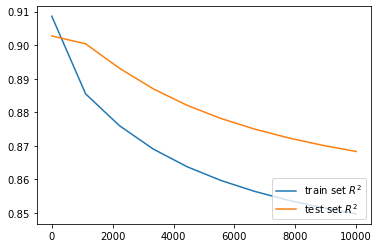

In [574]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [582]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


params = dict()
params['alpha'] = arange(0,100,0.1)

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   24.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3...
       93.5, 93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5,
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])}

In [583]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 20.8}
-0.0865850225653089


In [533]:
alpha = 11

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)


Ridge(alpha=11)

In [534]:
print (ridge.score(X_train, y_train))
print (ridge.score(X_test, y_test))

0.9067767850094112
0.9133488806378303


In [535]:
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)
predictions = ridge.predict(test)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08042517218618978
MSE: 0.011855135037660842
RMSE: 0.1088812887398971
R2 Square 0.9133488806378303
------------------------------
Train set evaluation:
MAE: 0.07905713422148793
MSE: 0.01258277462648161
RMSE: 0.11217296744974525
R2 Square 0.9067767850094112


In [536]:
train_R2 = []
test_R2  = []
alphaRange = [1e-6,1e-5,1e-4,1e-3,1,2,100,1000]
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True, max_iter=2000)  
    lasso.fit(X_train, y_train)
    train_R2.append(ridge.score(X_train, y_train))
    test_R2.append(ridge.score(X_test, y_test))

In [537]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   25.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000e-03, 1.00100e+00, 2.00100e+00, 3.00100e+00, 4.00100e+00,
       5.00100e+00, 6.00100e+00, 7.00100e+00, 8.00100e+00, 9.00100e+00,
       1.00010e+01, 1.10010e+01, 1.20010e+01, 1.30010e+01, 1.40010e+01,
       1.50010e+01, 1.60010e+01, 1.70010e+01, 1.80010e+01, 1.90010e+01,
       2.00010e+01, 2.10010e+01, 2.20010e+01, 2.30010e+01...
       9.75001e+02, 9.76001e+02, 9.77001e+02, 9.78001e+02, 9.79001e+02,
       9.80001e+02, 9.81001e+02, 9.82001e+02, 9.83001e+02, 9.84001e+02,
       9.85001e+02, 9.86001e+02, 9.87001e+02, 9.88001e+02, 9.89001e+02,
       9.90001e+02, 9.91001e+02, 9.92001e+02, 9.93001e+02, 9.94001e+02,
       9.95001e+02, 9.96001e+02, 9.97001e+02, 9.98001e+02, 9.99001e+02])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [538]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08488241495780437


In [539]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [540]:
test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)
lpredictions = lasso.predict(test)
print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08022655618623221
MSE: 0.012098842864711794
RMSE: 0.10999474016839075
R2 Square 0.9115675803030637
------------------------------
Train set evaluation:
MAE: 0.08035003630269229
MSE: 0.012999274819711755
RMSE: 0.114014362339627
R2 Square 0.9036910198892603


In [541]:
import math
preds = [math.e**i for i in ridge_mod.predict(test)]
sub = pd.DataFrame()
Id = [i for i in range(1461,2920)]
sub = pd.DataFrame({'Id': Id, 'SalePrice': preds}) 
sub.to_csv('submission.csv',index=False)
sub.head(10)

,Id,SalePrice
0,1461,113887.823478
1,1462,155826.333393
2,1463,178852.612970
3,1464,201772.845331
4,1465,180606.070203
5,1466,169828.650654
6,1467,189761.474811
7,1468,162010.956554
8,1469,194719.430114
9,1470,109899.066845


-------------------------------------------------------------------------

#MISCELLANEOUS

In [250]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 7,
 'min_samples_leaf': 10,
 'max_depth': 2,
 'learning_rate': 0.05}

In [251]:

random_search.best_score_

0.8835883177714416

In [153]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor()
params = {'loss': ['huber'], 
          'learning_rate': [0.1, 0.12, 0.14], 
          'max_depth': [5,6,7], 
          'min_samples_leaf' : [17, 20, 25],
          'min_samples_split' : [7, 9, 11]}
gs = GridSearchCV(estimator = gbr, param_grid = params, scoring = 'explained_variance', cv = 5, n_jobs = -1)
gs.fit(X_train,y_train)
print("Best Score:", gs.best_score_)
print("Best Parameters :",gs.best_params_)

Best Score: 0.8866094558932293
Best Parameters : {'learning_rate': 0.12, 'loss': 'huber', 'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 7}


In [41]:
gbr = GradientBoostingRegressor()
params = {'loss': ['huber'], 
          'learning_rate': [0.1], 
          'max_depth': [5], 
          'min_samples_leaf' : [20],
          'min_samples_split' : [11] }
gs = GridSearchCV(estimator = gbr, param_grid = params, scoring = 'explained_variance', cv = 5, n_jobs = -1)
gs.fit(X_test,y_test)
print("Best Score:", gs.best_score_)


Best Score: 0.8776484049593056


In [191]:
train.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1403, dtype: int64

In [192]:
saleprice = train.SalePrice
train_d = train.drop(['SalePrice'], axis=1)

In [193]:
train_d

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,...,BrickTile,BsmtGLQ,Attchd,Detchd,BuiltIn,low,mid,Spring,Summer,Winter
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,0,7,5,2003,2003,0,196.0,4,...,0,1,1,0,0,0,1,0,0,1
2,80.0,9600,0,6,8,1976,1976,0,0.0,3,...,0,0,1,0,0,0,1,1,0,0
3,68.0,11250,1,7,5,2001,2002,0,162.0,4,...,0,1,1,0,0,0,1,0,0,0
4,60.0,9550,1,7,5,1915,1970,0,0.0,3,...,1,0,0,1,0,0,1,0,0,1
5,84.0,14260,1,8,5,2000,2000,0,350.0,4,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,0,6,5,1999,2000,0,0.0,3,...,0,0,1,0,0,0,1,0,1,0
1457,85.0,13175,0,6,6,1978,1988,0,119.0,3,...,0,0,1,0,0,0,1,0,0,1
1458,66.0,9042,0,7,9,1941,2006,0,0.0,5,...,0,1,1,0,0,0,1,1,0,0


In [ ]:

# train['RoofStyle'].replace(to_replace = ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], value = [4, 2, 3, 1, 5, 0], inplace = True)
# train['RoofMatl'].replace(to_replace = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], value = [7, 6, 5, 4, 3, 2, 1, 0], inplace = True)
# train['ExterQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
# train['ExterCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
# train['BsmtQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
# train['BsmtCond'].replace(to_replace = ['Gd', 'TA', 'Fa', 'Po', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
# train['HeatingQC'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
# train['KitchenQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
# train['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
# train['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
# train['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
# train['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
# train['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)

# test['RoofStyle'].replace(to_replace = ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], value = [4, 2, 3, 1, 5, 0], inplace = True)
# test['RoofMatl'].replace(to_replace = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], value = [7, 6, 5, 4, 3, 2, 1, 0], inplace = True)
# test['ExterQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
# test['ExterCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
# test['BsmtQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
# test['BsmtCond'].replace(to_replace = ['Gd', 'TA', 'Fa', 'Po', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
# test['HeatingQC'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
# test['KitchenQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
# test['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
# test['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
# test['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)


In [194]:
test

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,...,BrickTile,BsmtGLQ,Attchd,Detchd,BuiltIn,low,mid,Spring,Summer,Winter
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,0,5,6,1961,1961,0,0.0,3,...,0,0,1,0,0,1,0,0,1,0
1462,81.0,14267,1,6,6,1958,1958,0,108.0,3,...,0,0,1,0,0,1,0,0,1,0
1463,74.0,13830,1,5,5,1997,1998,0,0.0,3,...,0,1,1,0,0,0,1,1,0,0
1464,78.0,9978,1,6,6,1998,1998,0,20.0,3,...,0,1,1,0,0,0,1,0,1,0
1465,43.0,5005,1,8,5,1992,1992,0,0.0,4,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,0,4,7,1970,1970,0,0.0,3,...,0,0,0,0,0,1,0,0,1,0
2916,21.0,1894,0,4,5,1970,1970,0,0.0,3,...,0,0,0,0,0,1,0,1,0,0
2917,160.0,20000,0,5,7,1960,1996,0,0.0,3,...,0,0,0,1,0,1,0,0,0,0


In [195]:
X = train_d
y = np.log(saleprice)

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=0)

In [146]:
X_train

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,...,BrickTile,BsmtGLQ,Attchd,Detchd,BuiltIn,low,mid,Spring,Summer,Winter
Id,,,,,,,,,,,,,,,,,,,,,
792,86.333333,11333,1,6,5,1976,1976,0,0.0,3,...,0,0,1,0,0,1,0,1,0,0
646,69.333333,10530,1,6,5,1971,1971,0,0.0,3,...,0,0,0,1,0,1,0,1,0,0
1388,60.000000,8520,0,6,7,1916,1950,0,0.0,3,...,1,0,0,1,0,1,0,0,1,0
873,74.000000,8892,0,5,7,1953,1996,0,0.0,4,...,0,0,1,0,0,1,0,0,0,0
1433,60.000000,10800,0,4,6,1927,2007,0,0.0,3,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,72.666667,10832,1,7,5,1994,1996,0,0.0,4,...,0,0,1,0,0,0,1,0,0,0
870,80.000000,9938,0,7,5,1993,1994,0,246.0,4,...,0,1,1,0,0,0,1,0,1,0
1268,89.000000,13214,1,9,5,2008,2009,0,0.0,5,...,0,0,1,0,0,0,1,1,0,0


In [147]:
test

array([[ 8.00000000e+01,  1.16220000e+04,  6.17450238e-17, ...,
        -5.22457894e-17,  1.00000000e+00, -1.89984689e-17],
       [ 8.10000000e+01,  1.42670000e+04,  1.00000000e+00, ...,
        -5.22457894e-17,  1.00000000e+00, -1.89984689e-17],
       [ 7.40000000e+01,  1.38300000e+04,  1.00000000e+00, ...,
         1.00000000e+00,  1.10824402e-17, -1.89984689e-17],
       ...,
       [ 1.60000000e+02,  2.00000000e+04,  6.17450238e-17, ...,
        -5.22457894e-17,  1.10824402e-17, -1.89984689e-17],
       [ 6.20000000e+01,  1.04410000e+04,  6.17450238e-17, ...,
        -5.22457894e-17,  1.00000000e+00, -1.89984689e-17],
       [ 7.40000000e+01,  9.62700000e+03,  6.17450238e-17, ...,
        -5.22457894e-17,  1.10824402e-17, -1.89984689e-17]])

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
X_test

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,...,BrickTile,BsmtGLQ,Attchd,Detchd,BuiltIn,low,mid,Spring,Summer,Winter
Id,,,,,,,,,,,,,,,,,,,,,
683,43.000000,2887,0,6,5,1996,1997,0,0.0,3,...,0,1,1,0,0,0,1,0,0,0
323,86.000000,10380,1,7,5,1986,1987,0,172.0,4,...,0,0,1,0,0,0,1,0,1,0
234,75.000000,10650,0,5,6,1976,1976,0,0.0,3,...,0,0,1,0,0,0,1,0,0,1
634,80.000000,9250,0,5,7,1954,2005,0,0.0,3,...,0,0,1,0,0,1,0,0,1,0
1287,75.000000,9790,0,6,5,1963,1963,0,451.0,3,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,32.000000,4500,0,6,5,1998,1998,0,116.0,3,...,0,1,1,0,0,1,0,1,0,0
1457,85.000000,13175,0,6,6,1978,1988,0,119.0,3,...,0,0,1,0,0,0,1,0,0,1
1301,84.666667,10762,1,7,5,1999,1999,0,344.0,4,...,0,1,1,0,0,0,1,1,0,0


In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
test = scaler.transform(test)

In [197]:
from sklearn.linear_model import LinearRegression
#Multiple Linear Regression

lm = LinearRegression()

lm.fit(X_train,y_train)

# scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# scores
lm.fit(X_train, y_train) #fit the model
train_accuracy = lm.score(X_train, y_train) #how it performs on the data it was trained on
test_accuracy  = lm.score(X_test, y_test)

print("The training accuracy is: %.3f" %train_accuracy)
print("The test accuracy is: %.3f" %test_accuracy)
print('Train RSS is equal to %.3f' %(np.sum((y_train-lm.predict(X_train))**2)))
print('Test RSS is equal to %.3f' %(np.sum((y_test-lm.predict(X_test))**2)))


The training accuracy is: 0.896
The test accuracy is: 0.906
Train RSS is equal to 15.688
Test RSS is equal to 3.612


In [198]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)


In [199]:
test_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08324044765923348
MSE: 0.012854666962523166
RMSE: 0.11337842370805463
R2 Square 0.9060431384550205
------------------------------
Train set evaluation:
MAE: 0.08347360094804084
MSE: 0.013981844695237156
RMSE: 0.11824485060769943
R2 Square 0.8964113597611513


In [202]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [203]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,10000,10)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(X_train, y_train)
    train_R2.append(ridge.score(X_train, y_train))
    test_R2.append(ridge.score(X_test, y_test))

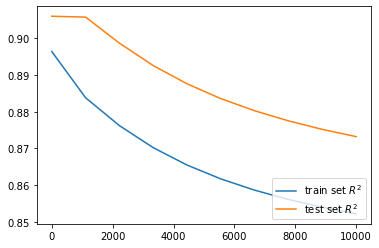

In [204]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [205]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


params = dict()
params['alpha'] = arange(1e-3,1000,1)

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   33.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000e-03, 1.00100e+00, 2.00100e+00, 3.00100e+00, 4.00100e+00,
       5.00100e+00, 6.00100e+00, 7.00100e+00, 8.00100e+00, 9.00100e+00,
       1.00010e+01, 1.10010e+01, 1.20010e+01, 1.30010e+01, 1.40010e+01,
       1.50010e+01, 1.60010e+01, 1.70010e+01, 1.80010e+01, 1.90010e+01,
       2.00010e+01, 2.10010e+01, 2.20010e+01, 2.30010e+01...
       9.75001e+02, 9.76001e+02, 9.77001e+02, 9.78001e+02, 9.79001e+02,
       9.80001e+02, 9.81001e+02, 9.82001e+02, 9.83001e+02, 9.84001e+02,
       9.85001e+02, 9.86001e+02, 9.87001e+02, 9.88001e+02, 9.89001e+02,
       9.90001e+02, 9.91001e+02, 9.92001e+02, 9.93001e+02, 9.94001e+02,
       9.95001e+02, 9.96001e+02, 9.97001e+02, 9.98001e+02, 9.99001e+02])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [206]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 249.00099999999998}
-0.0886507661760942


In [207]:
alpha = 249

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)


Ridge(alpha=249)

In [208]:
print (ridge.score(X_train, y_train))
print (ridge.score(X_test, y_test))

0.8910893818246088
0.910584155229052


In [209]:
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)
predictions = ridge.predict(test)

print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08038352352650238
MSE: 0.012233389736554292
RMSE: 0.11060465513057889
R2 Square 0.910584155229052
------------------------------
Train set evaluation:
MAE: 0.0849697813224528
MSE: 0.014700177022108532
RMSE: 0.12124428655449515
R2 Square 0.8910893818246088


In [212]:
predictions

array([11.71656829, 11.94238915, 12.09232369, ..., 12.14730602,
       11.64281384, 12.31935452])

In [213]:
train_R2 = []
test_R2  = []
alphaRange = [1e-6,1e-5,1e-4,1e-3,1,2,100,1000]
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=True, max_iter=2000)  
    lasso.fit(X_train, y_train)
    train_R2.append(ridge.score(X_train, y_train))
    test_R2.append(ridge.score(X_test, y_test))

In [214]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   36.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000e-03, 1.00100e+00, 2.00100e+00, 3.00100e+00, 4.00100e+00,
       5.00100e+00, 6.00100e+00, 7.00100e+00, 8.00100e+00, 9.00100e+00,
       1.00010e+01, 1.10010e+01, 1.20010e+01, 1.30010e+01, 1.40010e+01,
       1.50010e+01, 1.60010e+01, 1.70010e+01, 1.80010e+01, 1.90010e+01,
       2.00010e+01, 2.10010e+01, 2.20010e+01, 2.30010e+01...
       9.75001e+02, 9.76001e+02, 9.77001e+02, 9.78001e+02, 9.79001e+02,
       9.80001e+02, 9.81001e+02, 9.82001e+02, 9.83001e+02, 9.84001e+02,
       9.85001e+02, 9.86001e+02, 9.87001e+02, 9.88001e+02, 9.89001e+02,
       9.90001e+02, 9.91001e+02, 9.92001e+02, 9.93001e+02, 9.94001e+02,
       9.95001e+02, 9.96001e+02, 9.97001e+02, 9.98001e+02, 9.99001e+02])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [215]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08921385368727934


In [216]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [217]:
test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)
lpredictions = lasso.predict(test)
print('Test set evaluation:')
evaluate(y_test, test_pred)
print('-' *30)
print('Train set evaluation:')
evaluate(y_train, train_pred)

Test set evaluation:
MAE: 0.08172331849131273
MSE: 0.012350893488758237
RMSE: 0.11113457377773237
R2 Square 0.9097253011016733
------------------------------
Train set evaluation:
MAE: 0.08471295615697297
MSE: 0.014405029889607407
RMSE: 0.12002095604354852
R2 Square 0.8932760668288131


In [218]:
# sub = pd.DataFrame()
# sub = pd.DataFrame({'Id':d_test.Id,'SalePrice':result}) 
# sub.to_csv('submission.csv',index=False)
# sub.head(2)


preds = [math.e**i for i in lasso.predict(test)]
sub = pd.DataFrame()
Id = [i for i in range(1461,2920)]
sub = pd.DataFrame({'Id': Id, 'SalePrice': preds}) 
sub.to_csv('submission.csv',index=False)
sub.head(2)

,Id,SalePrice
0,1461,122078.476553
1,1462,153759.077364


In [550]:
X.shape

(1403, 58)

In [554]:
numerical = train_d.select_dtypes(include = ['float64', 'int64'])

numerical

In [557]:
numerical.SalePrice

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

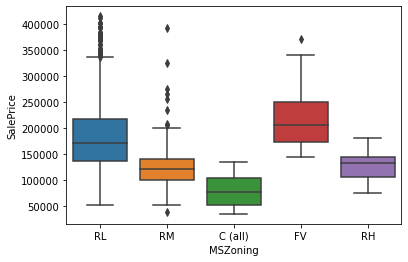

AttributeError: 'DataFrame' object has no attribute 'GarageType'

<Figure size 1440x1440 with 0 Axes>

In [477]:
sns.boxplot(data=train, x = 'MSZoning', y='SalePrice')
plt.show()
plt.figure(figsize=(20,20))
train.GarageType.value_counts()
    
# def roofstyle(x):
#     if 'Flat' in x:
#         return 1
#     else:
#         return 0
# df_exout['Amenities1'] = df_exout.Condition1.map(add_amenities1)



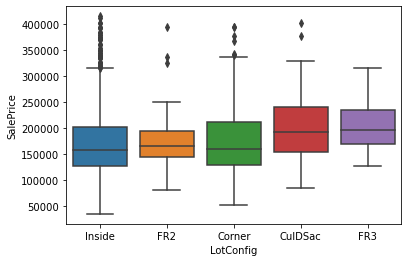

Inside     1013
Corner      253
CulDSac      86
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<Figure size 1440x1440 with 0 Axes>

In [348]:
sns.boxplot(data=train, x = 'LotConfig', y='SalePrice')
plt.show()
plt.figure(figsize=(20,20))
train.LotConfig.value_counts()
    


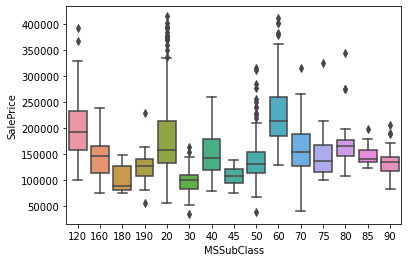

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [342]:
sns.boxplot(data=train, x = 'MSSubClass', y='SalePrice')
plt.show()
plt.figure(figsize=(20,20))
    


In [325]:
droplst = []
for i in range(len(train.columns)):
    if train[train.columns[i]].value_counts().iloc[0]/train.shape[0] > 0.9:
        droplst.append(train.columns[i])
        
train = train.drop(droplst, axis = 1)
print (droplst)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [324]:
finishdums = pd.get_dummies(train.BsmtFinType1)[['GLQ']]
finishdums = finishdums.rename(columns={"GLQ": "BsmtFinGLQ"})
finishdums

,BsmtFinGLQ
Id,
1,1
2,0
3,1
4,0
5,1
...,...
1456,0
1457,0
1458,1


In [ ]:
# def roofstyle(x):
#     if 'Flat' in x:
#         return 1
#     else:
#         return 0
# df_exout['Amenities1'] = df_exout.Condition1.map(add_amenities1)

train.RoofStyle.apply(lambda x: 1 if x=='Flat' else 0)


In [129]:
categorical = train.select_dtypes(include = 'object')
numerical = train.select_dtypes(include = ['float64', 'int64'])

In [135]:
droplst = []
for i in range(len(train.columns)):
    if train[train.columns[i]].value_counts().iloc[0]/train.shape[0] > 0.9:
        droplst.append(train.columns[i])
        
train = train.drop(droplst, axis = 1)
print (droplst)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [327]:
train['LotShape'] =  train.LotShape.map(lambda x: 0 if x == 'Reg' else 1) #return 0 if regular lot shape, 1 if irregular
train['GarageFinish'] =  train.GarageFinish.map(lambda x: 1 if x == 'Fin' or x == 'RFn' else 0) #return 1 if finished, 0 if non-finished
train['Neighborhood'] = train['Neighborhood'].map(lambda x: np.where(x in ["NoRidge","NridgHt","StoneBr"],'high', np.where(x in ["Timber", "Veenker",
"Somerst","ClearCr","Crawfor","CollgCr","Blmngtn","Gilbert","NWAmes","SawyerW"],'mid', 'low')))



In [139]:
categorical = train.select_dtypes(include = 'object')
categorical.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

MSSubClass


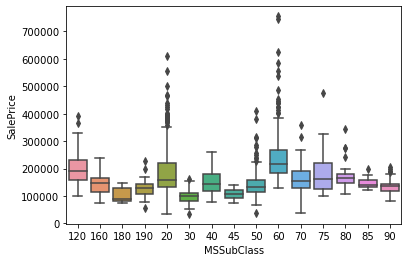

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning


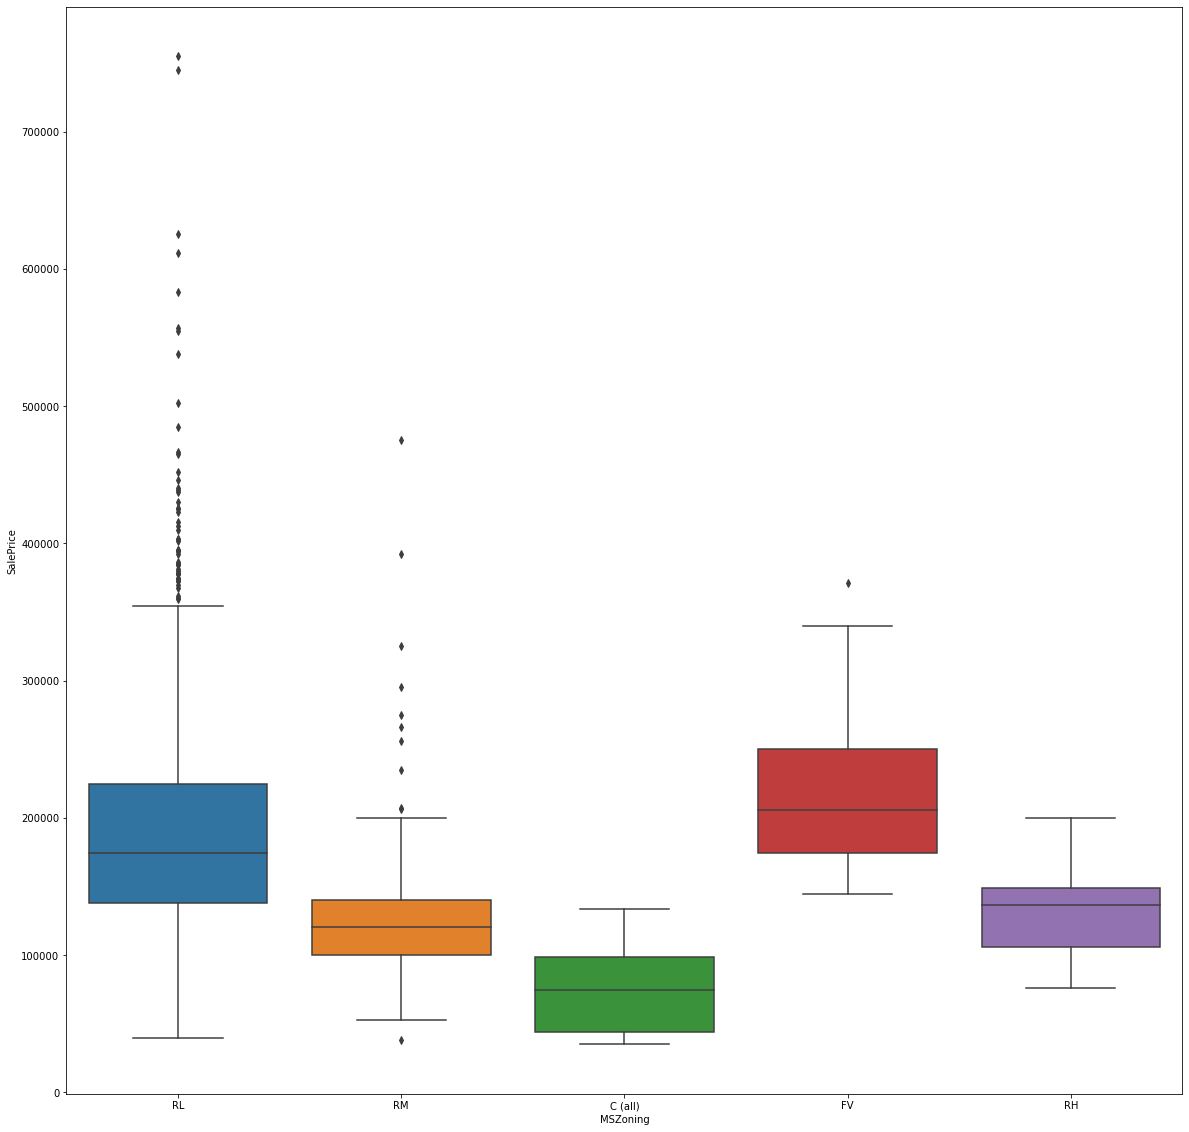

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotConfig


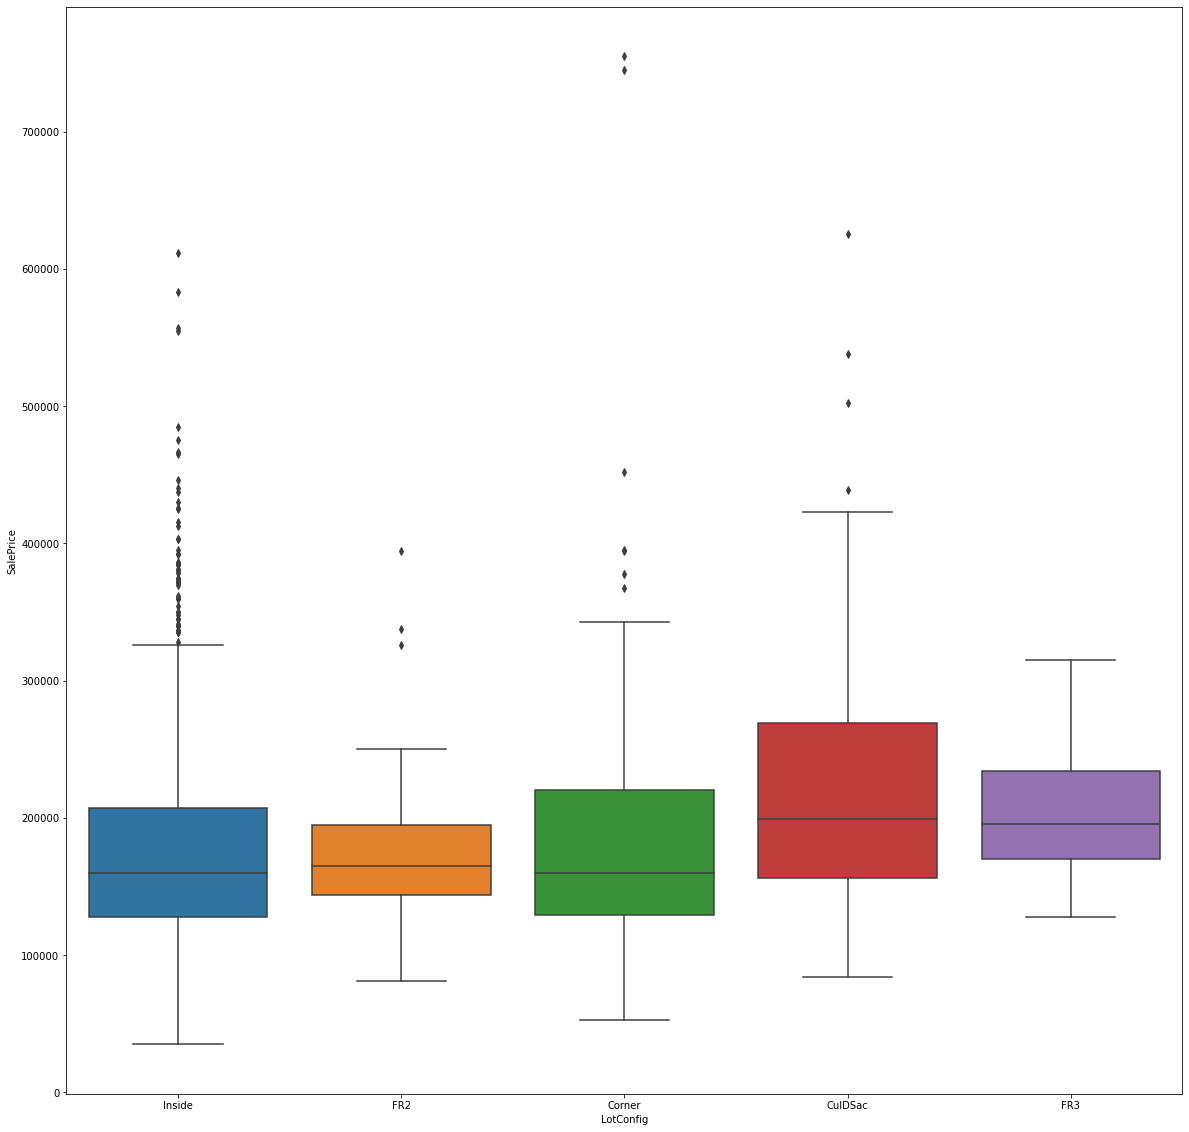

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Neighborhood


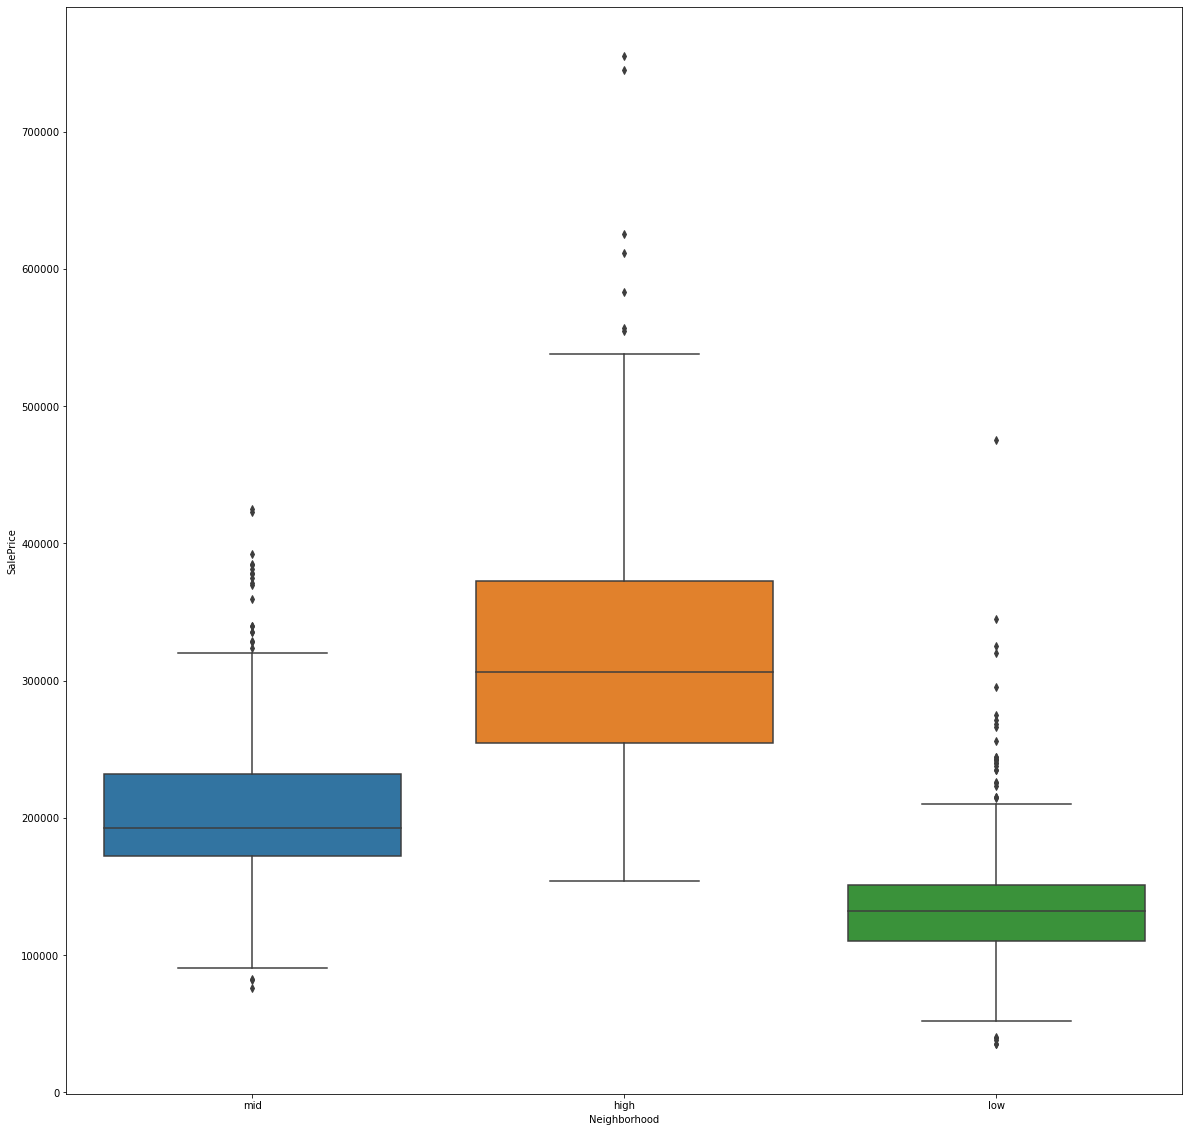

low     725
mid     592
high    143
Name: Neighborhood, dtype: int64
Condition1


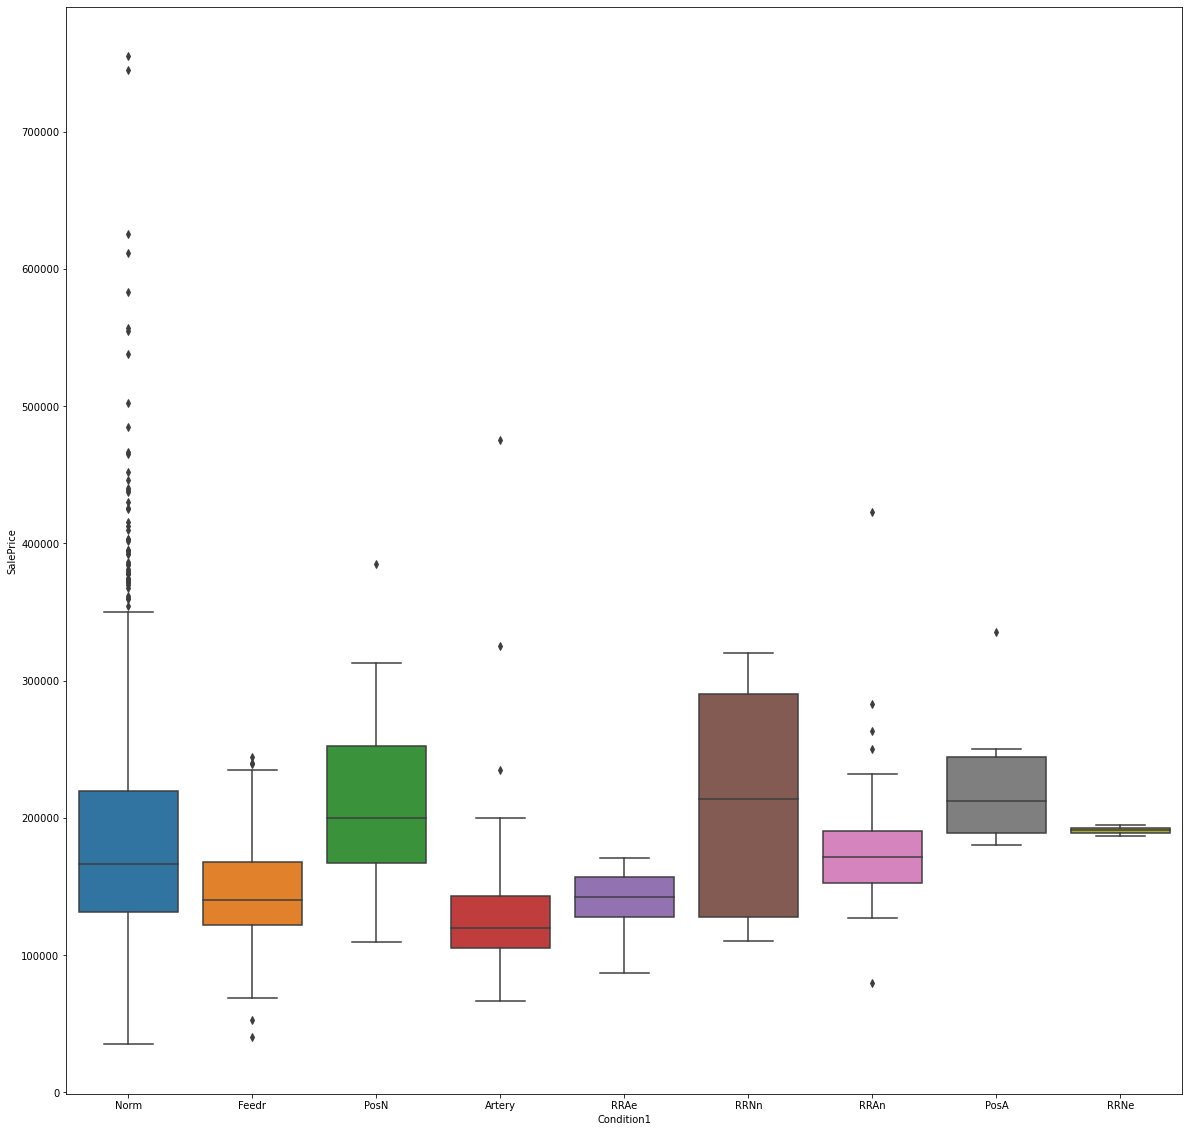

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
BldgType


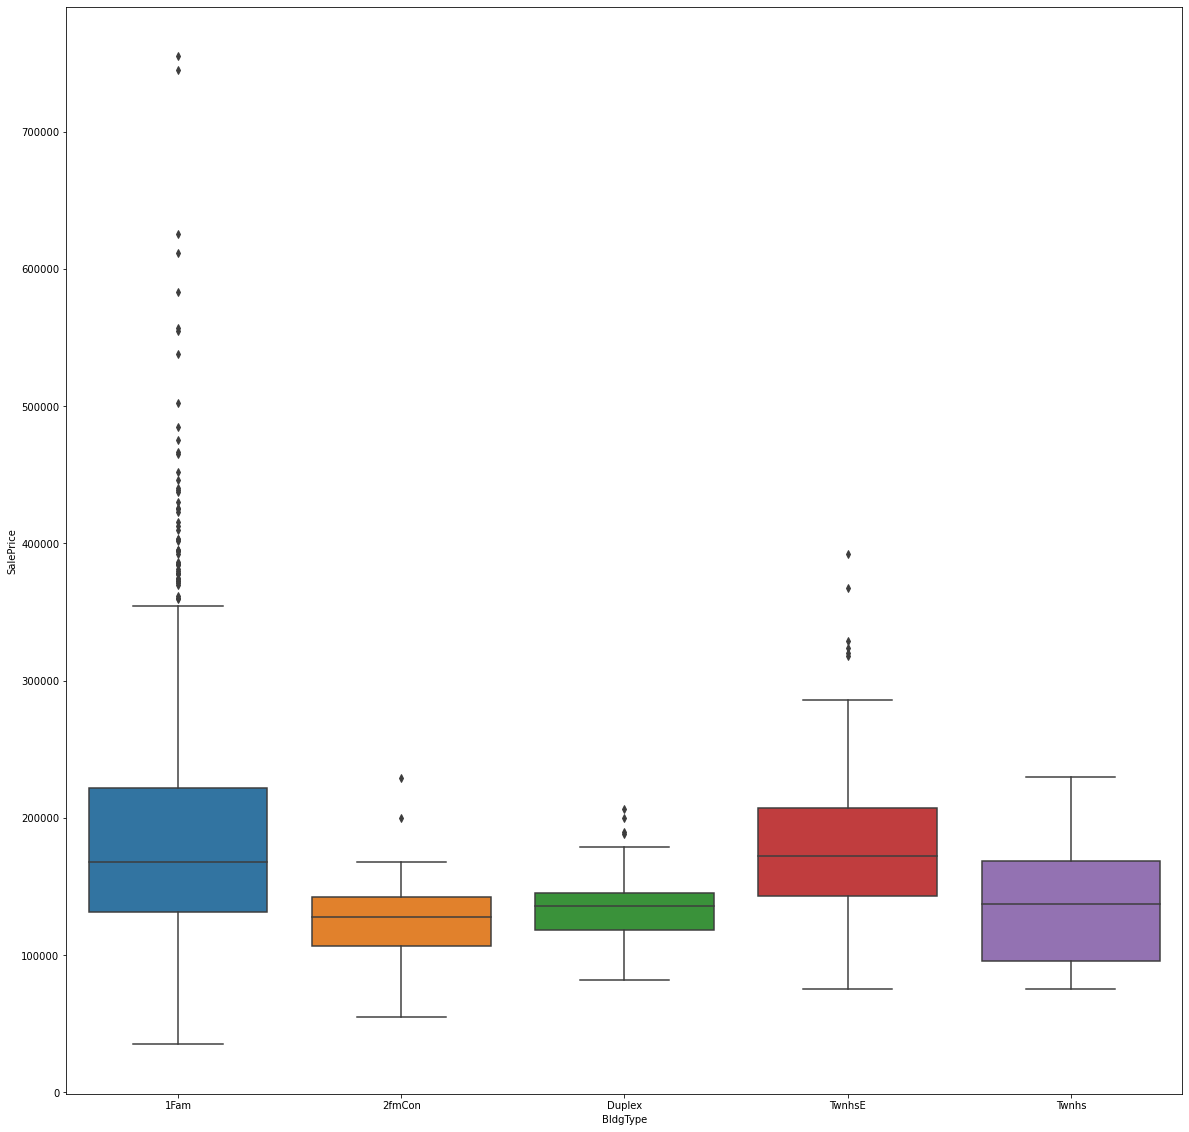

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
HouseStyle


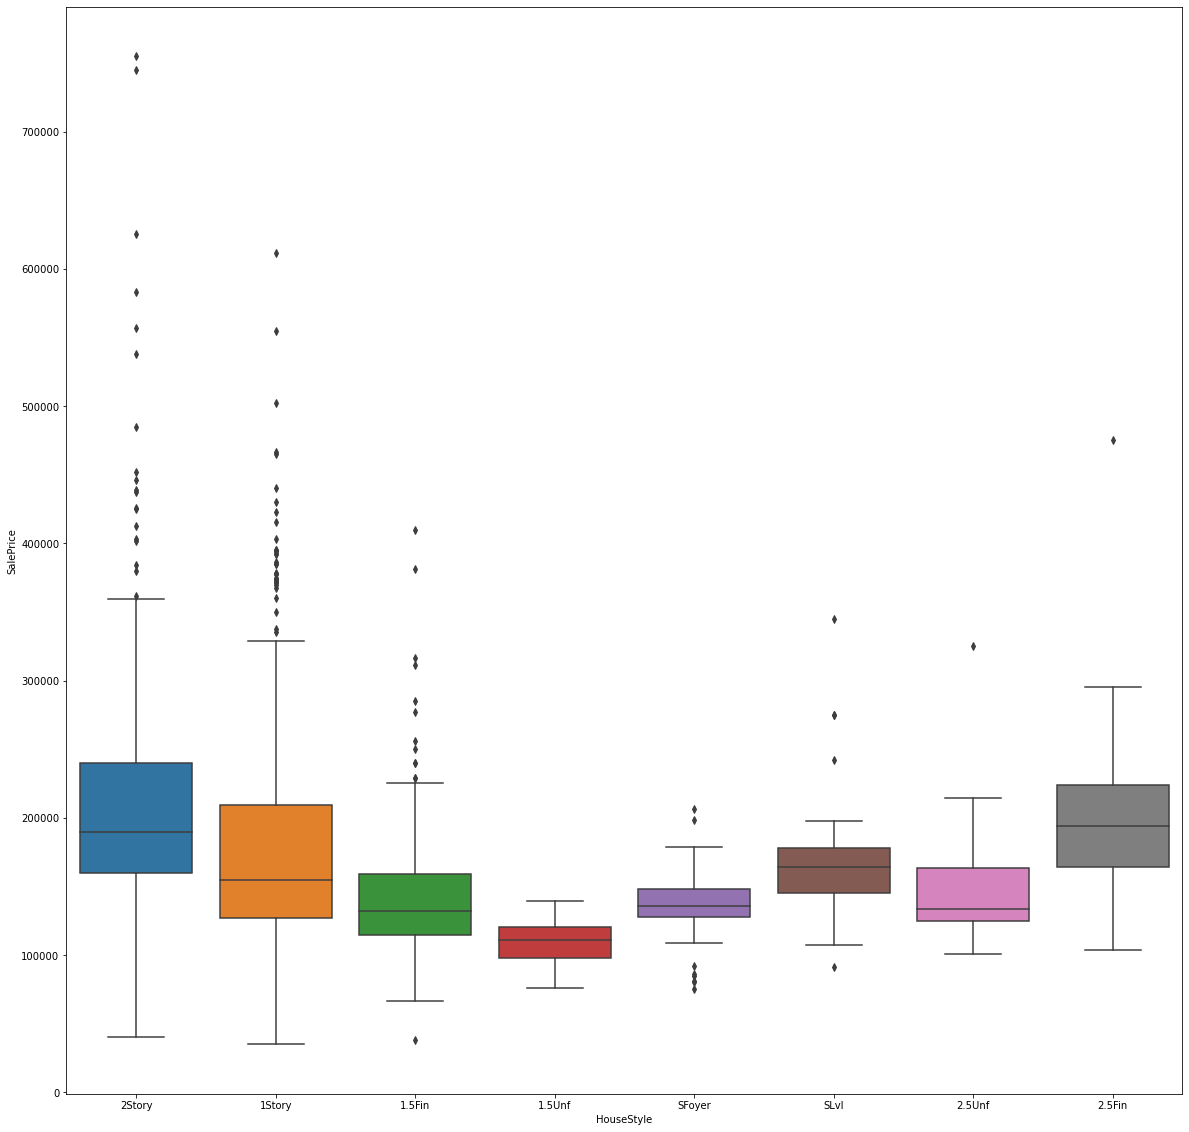

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
RoofStyle


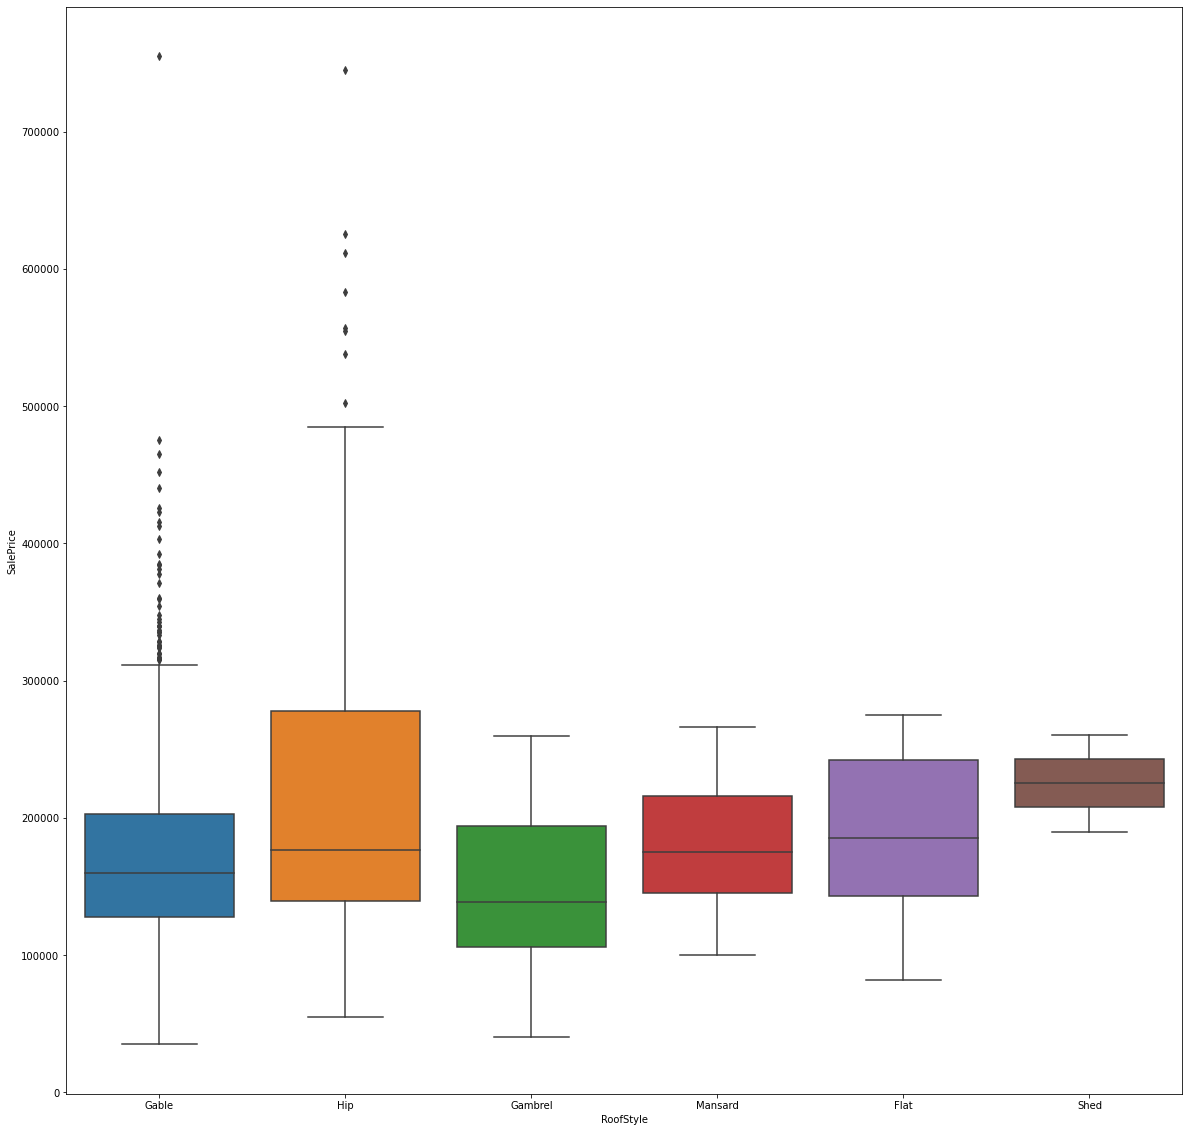

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Exterior1st


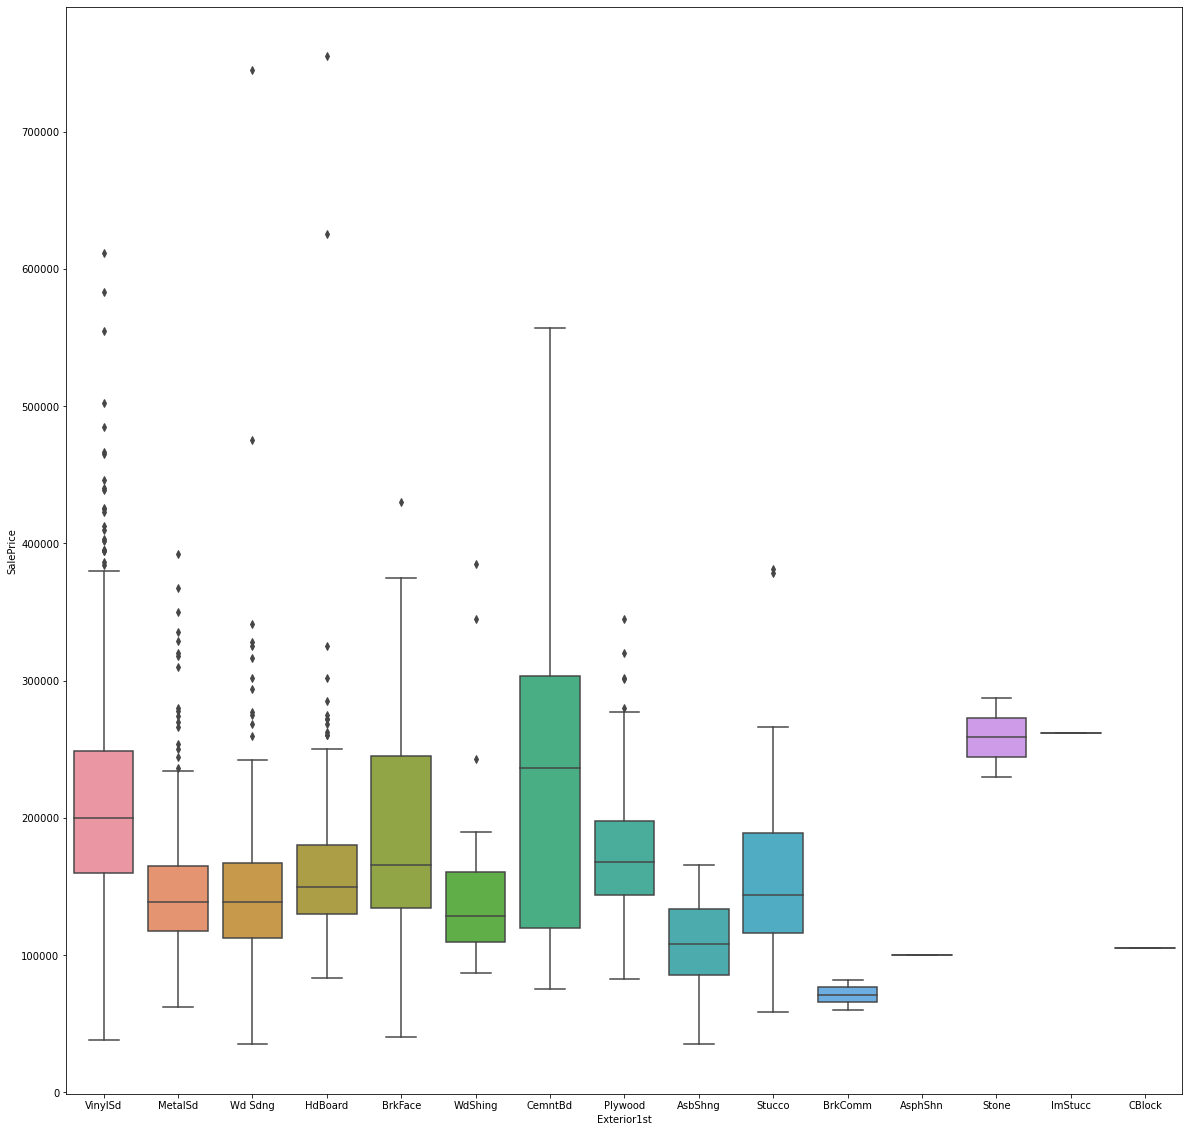

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64
Exterior2nd


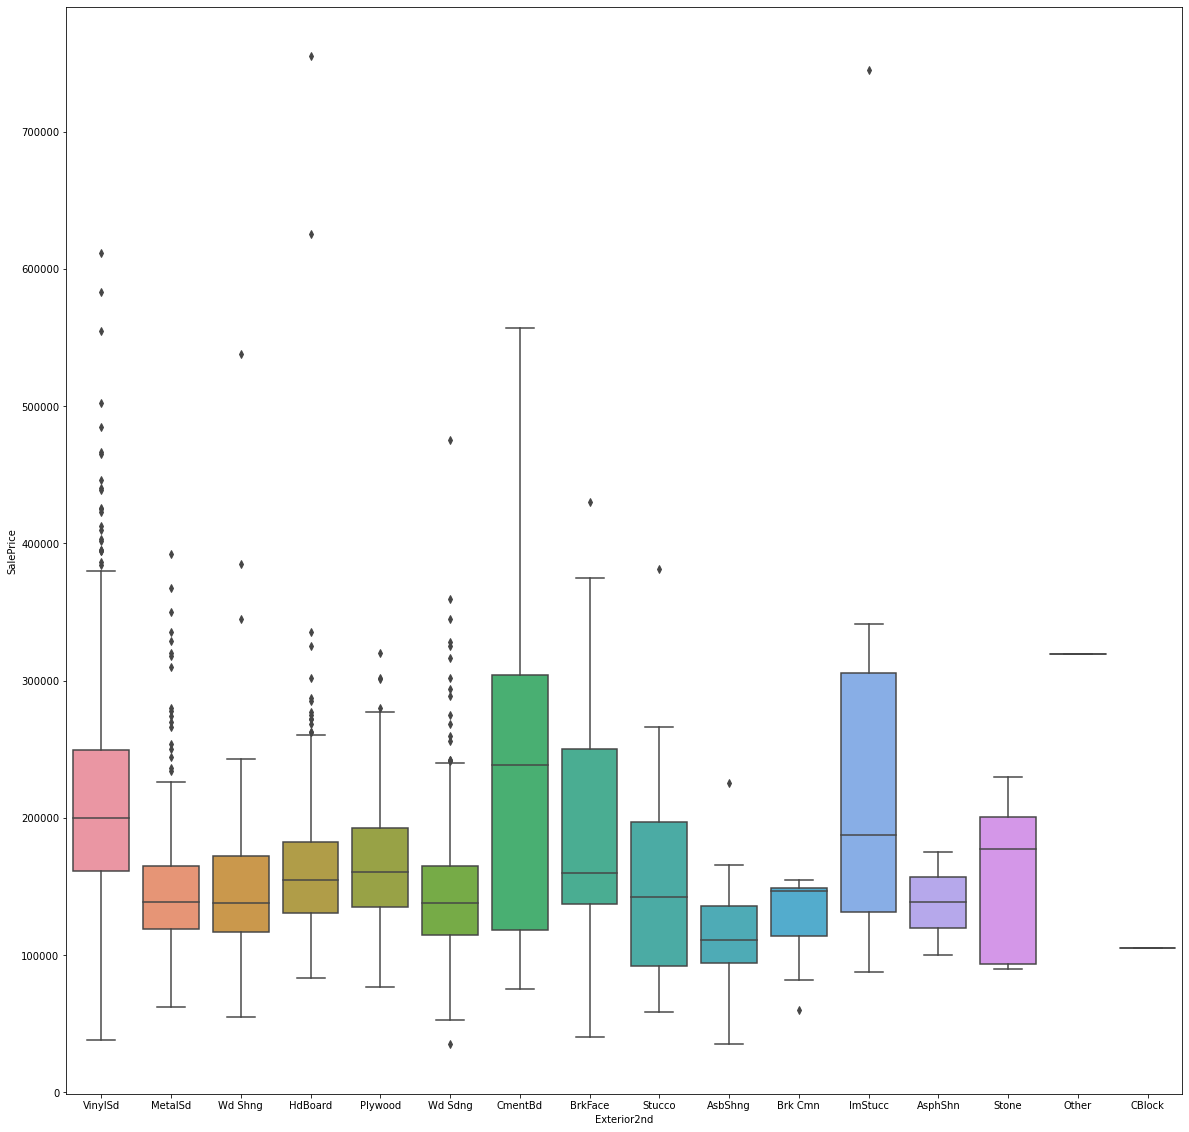

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
MasVnrType


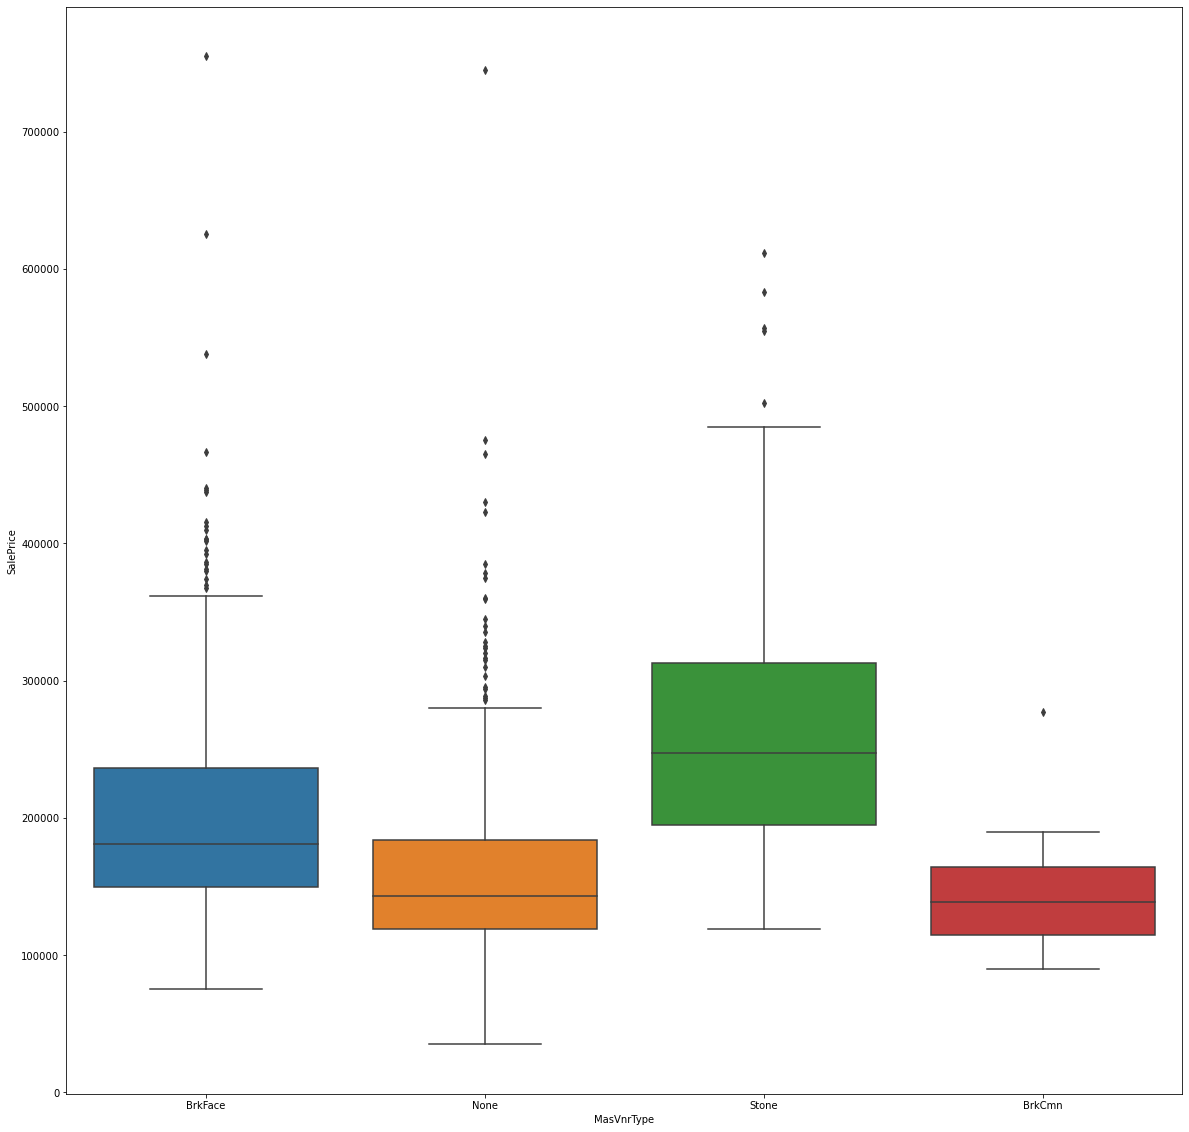

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
ExterQual


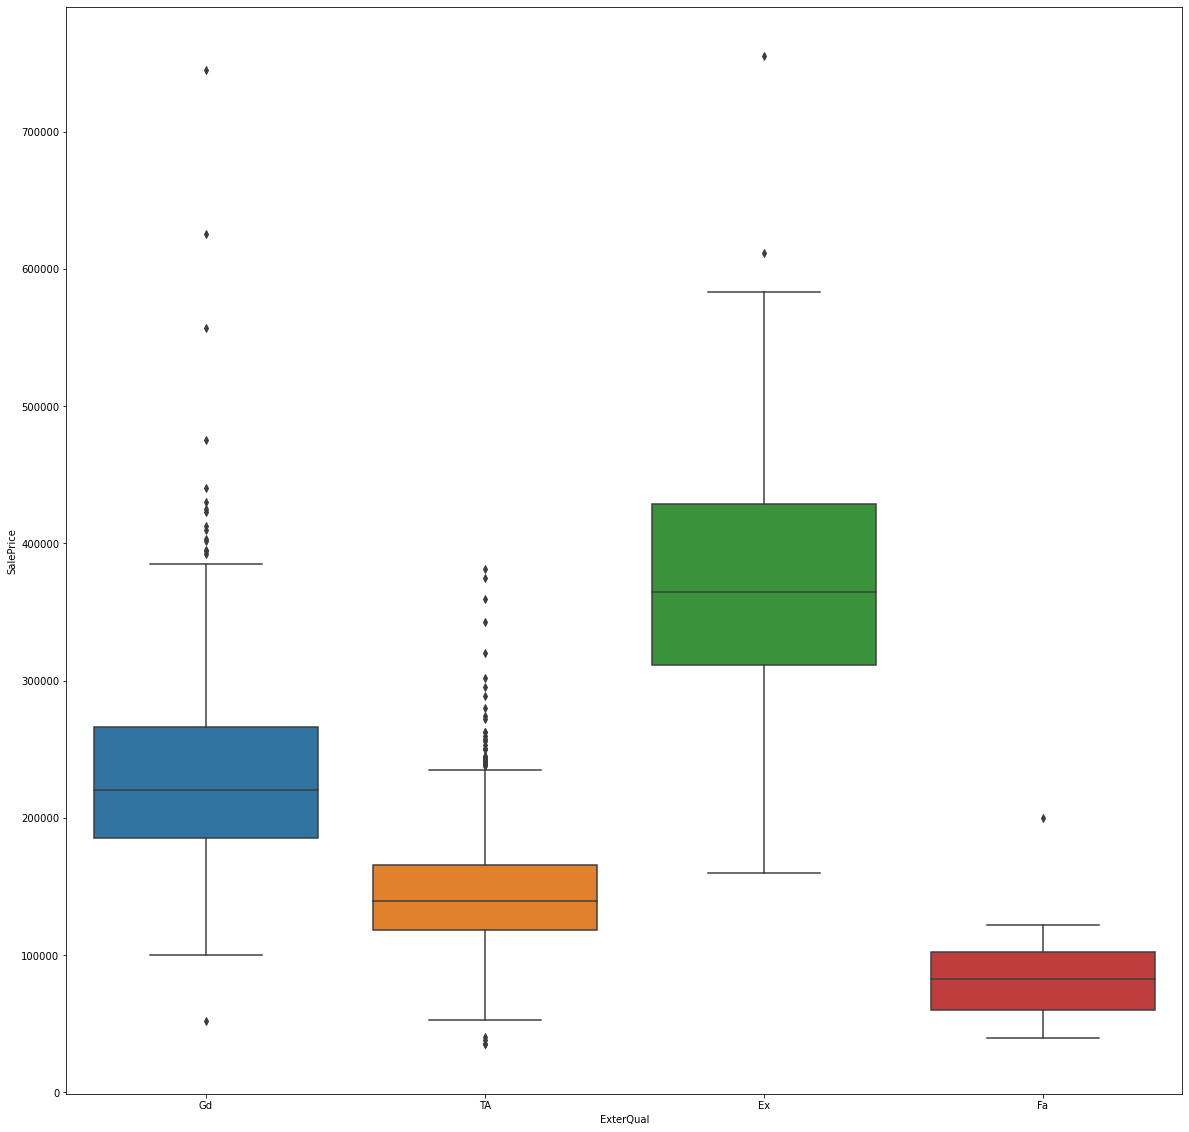

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
ExterCond


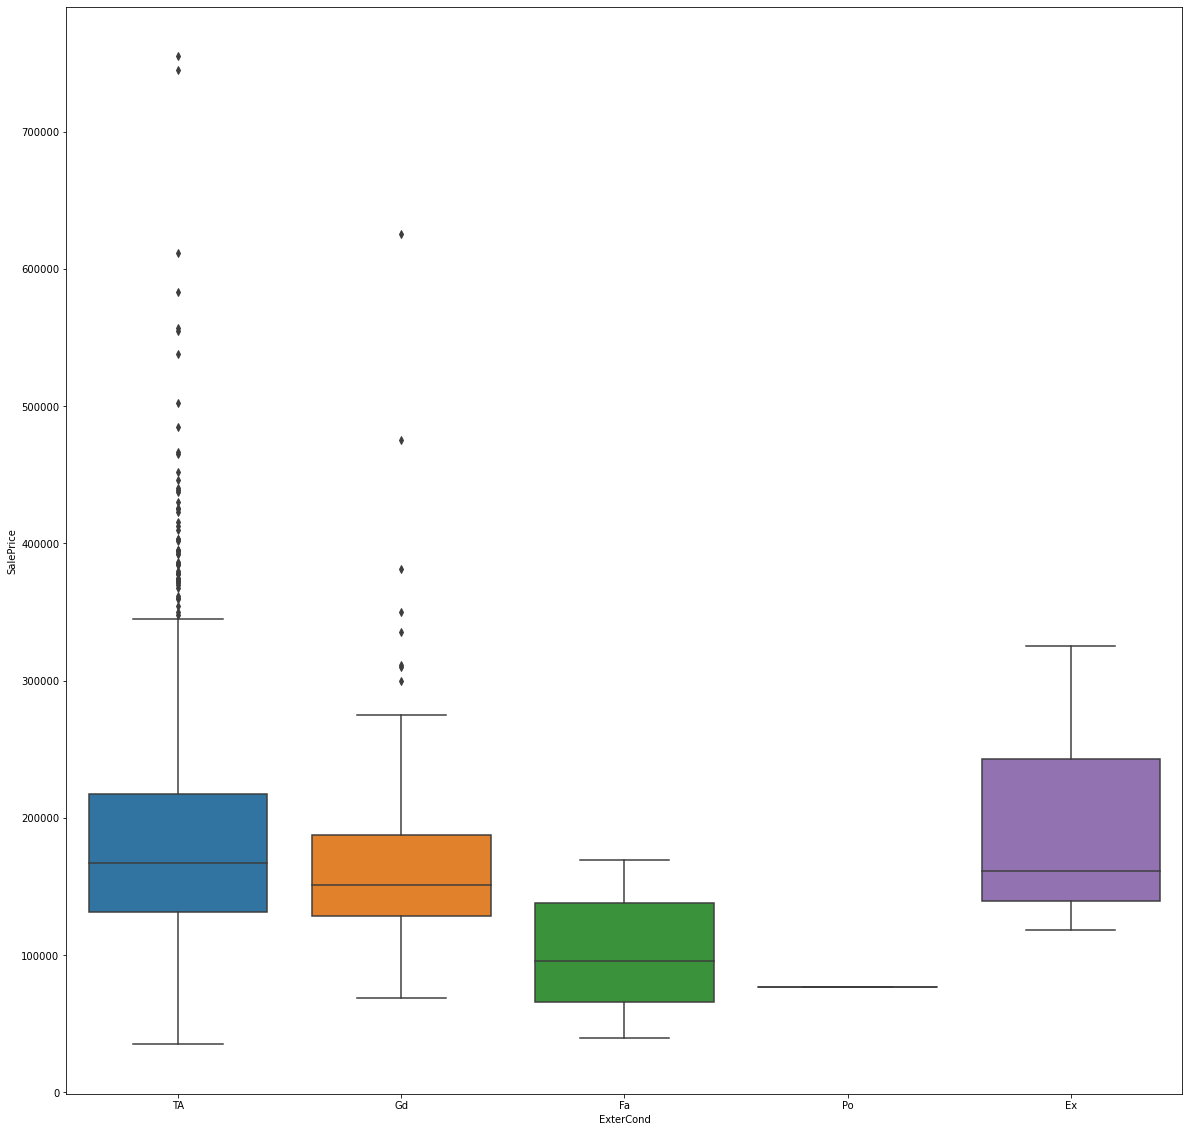

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Foundation


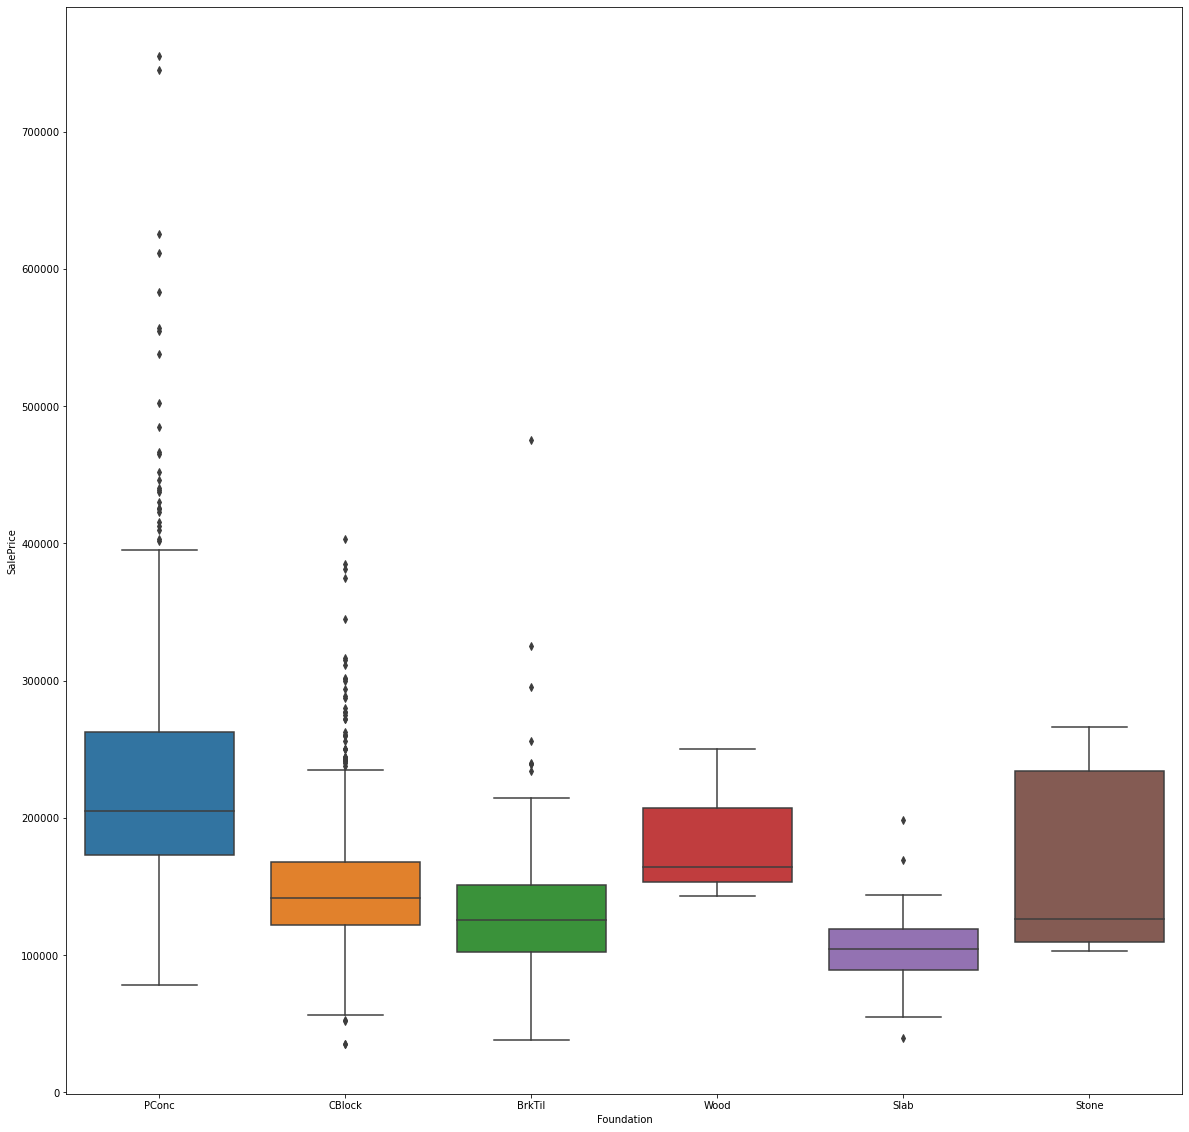

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
BsmtQual


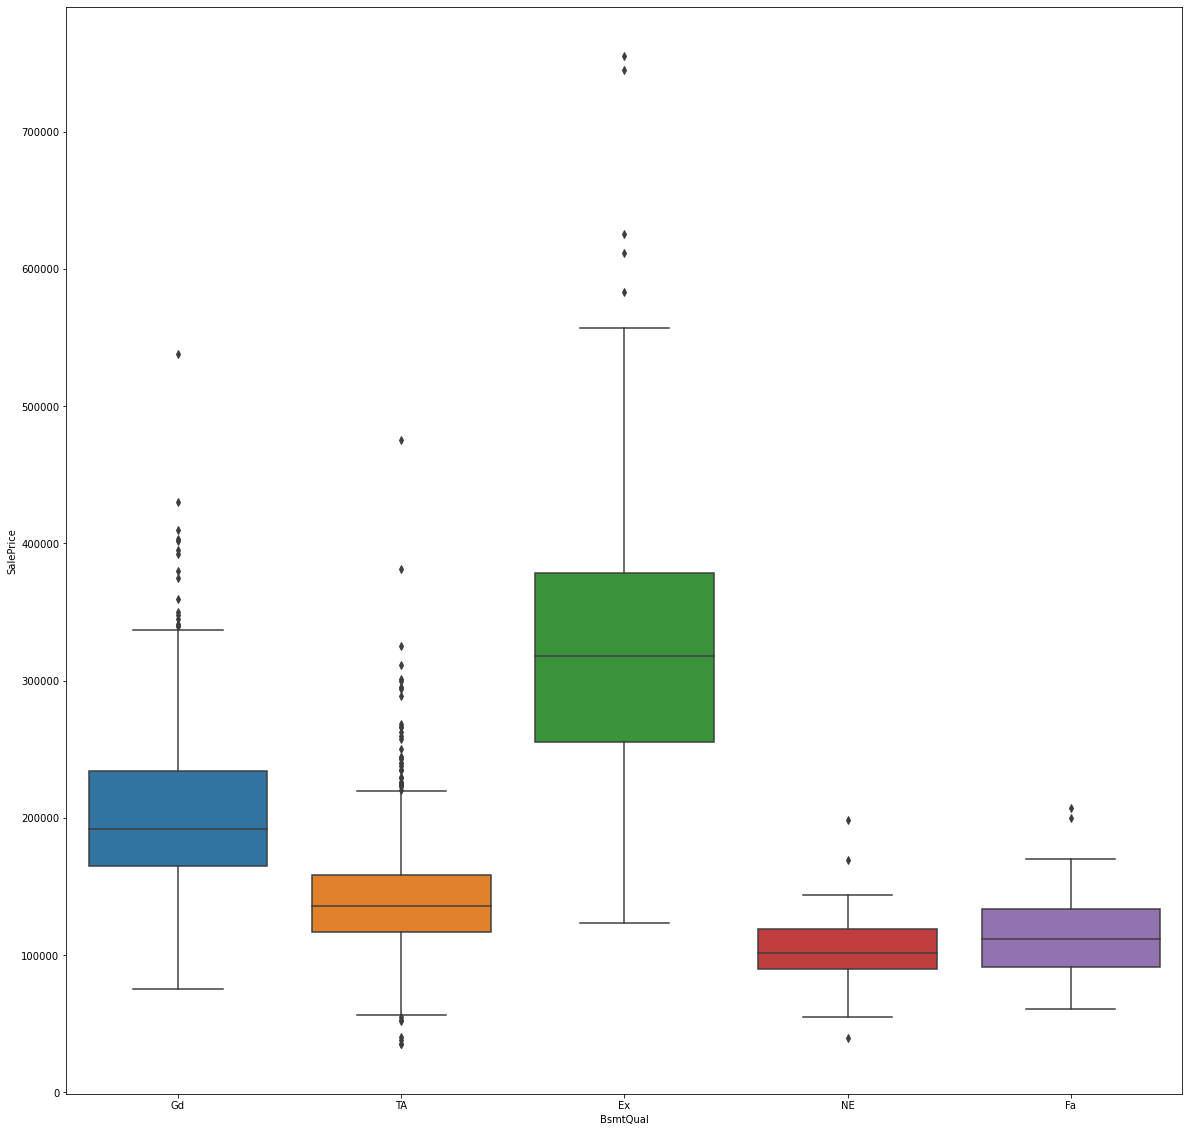

TA    649
Gd    618
Ex    121
NE     37
Fa     35
Name: BsmtQual, dtype: int64
BsmtCond


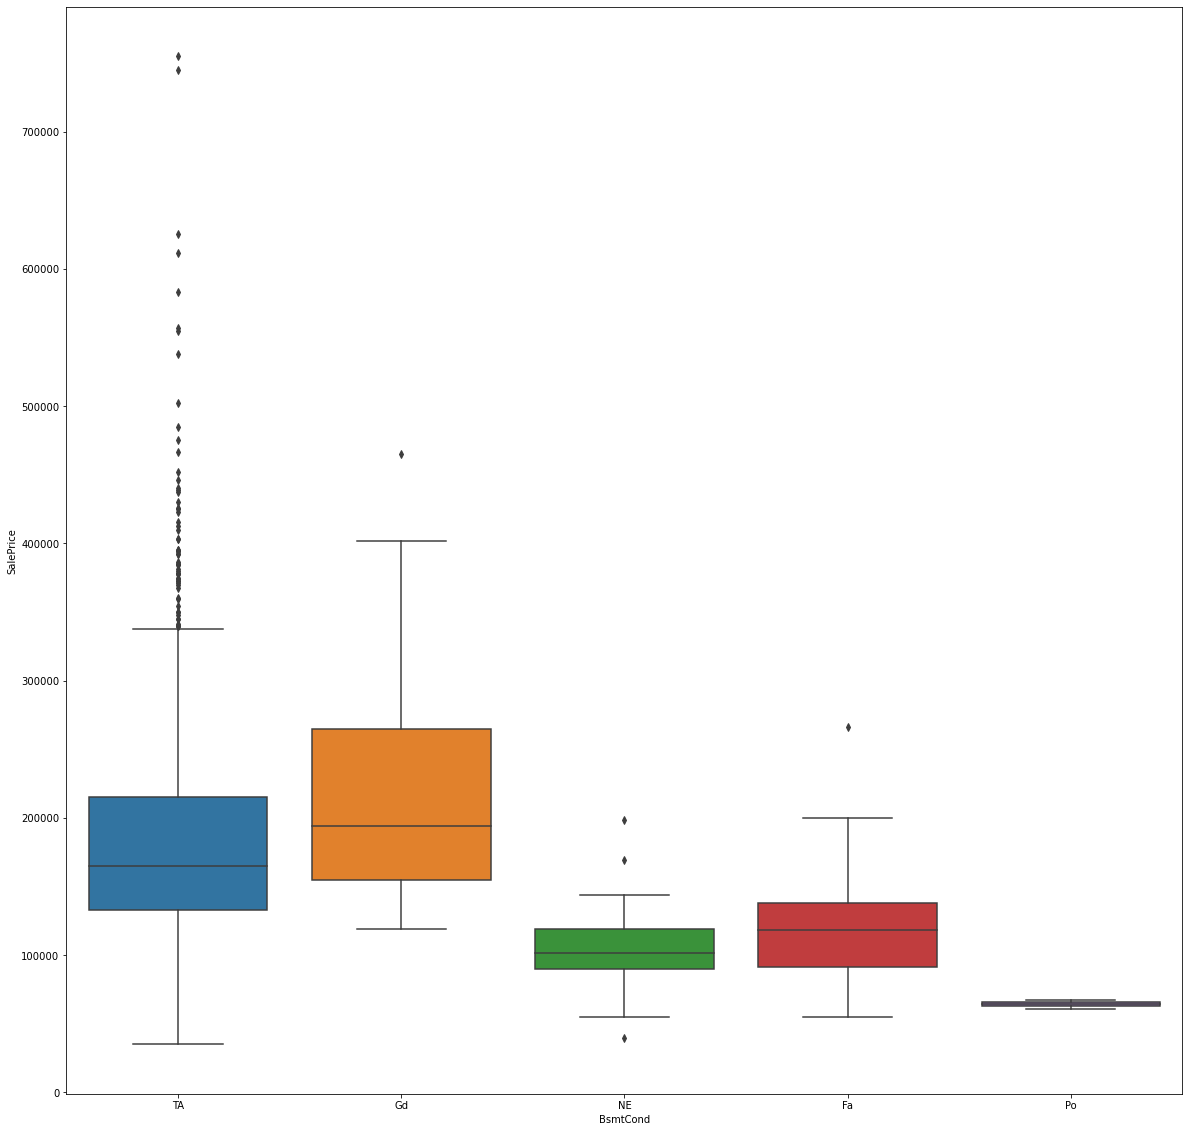

TA    1311
Gd      65
Fa      45
NE      37
Po       2
Name: BsmtCond, dtype: int64
BsmtExposure


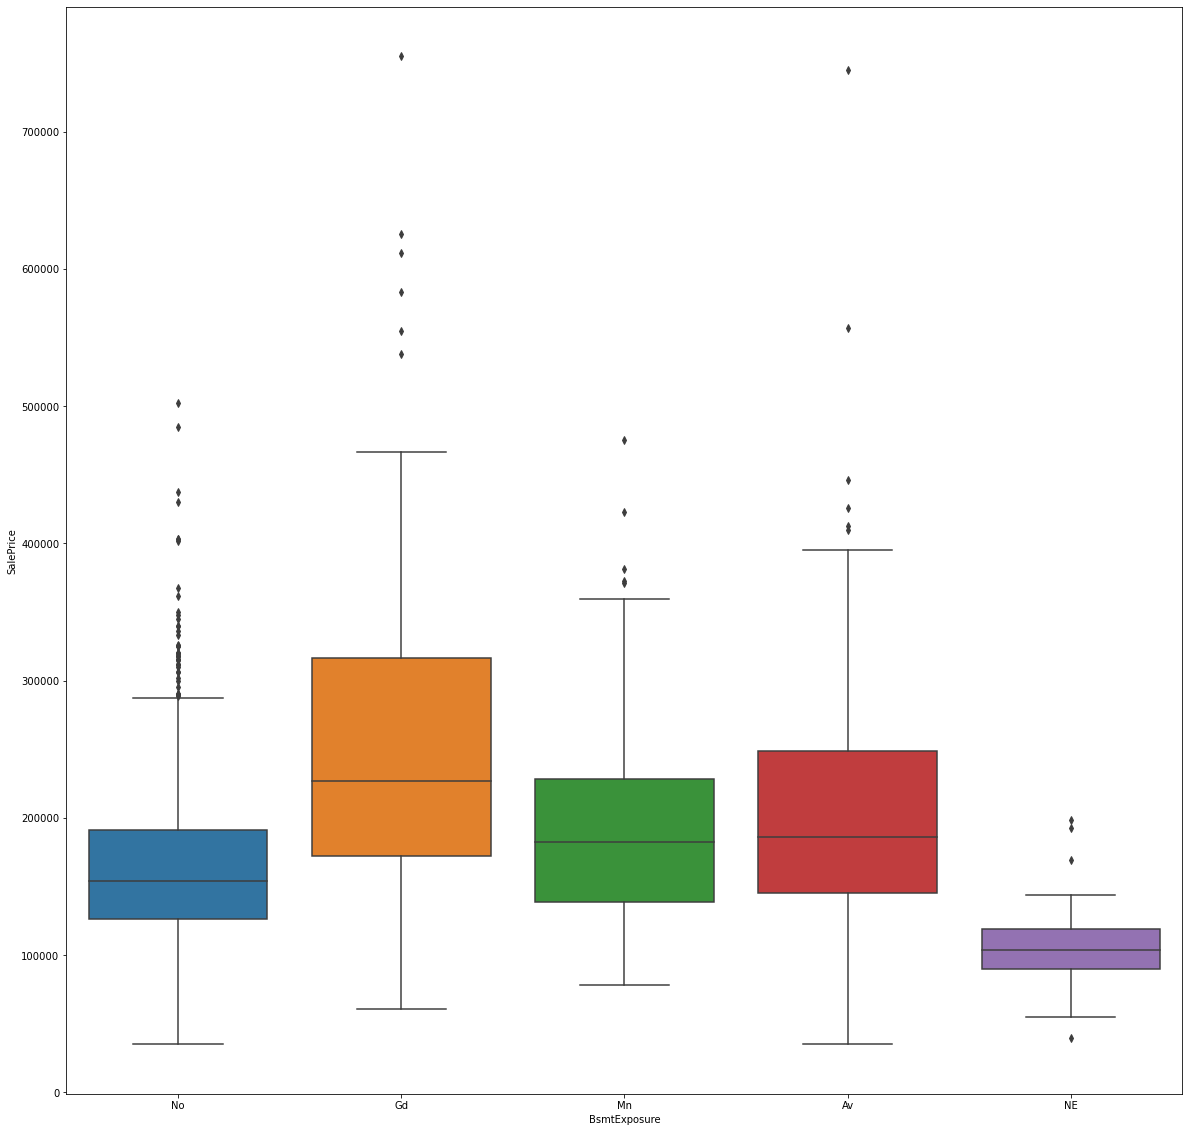

No    953
Av    221
Gd    134
Mn    114
NE     38
Name: BsmtExposure, dtype: int64
BsmtFinType1


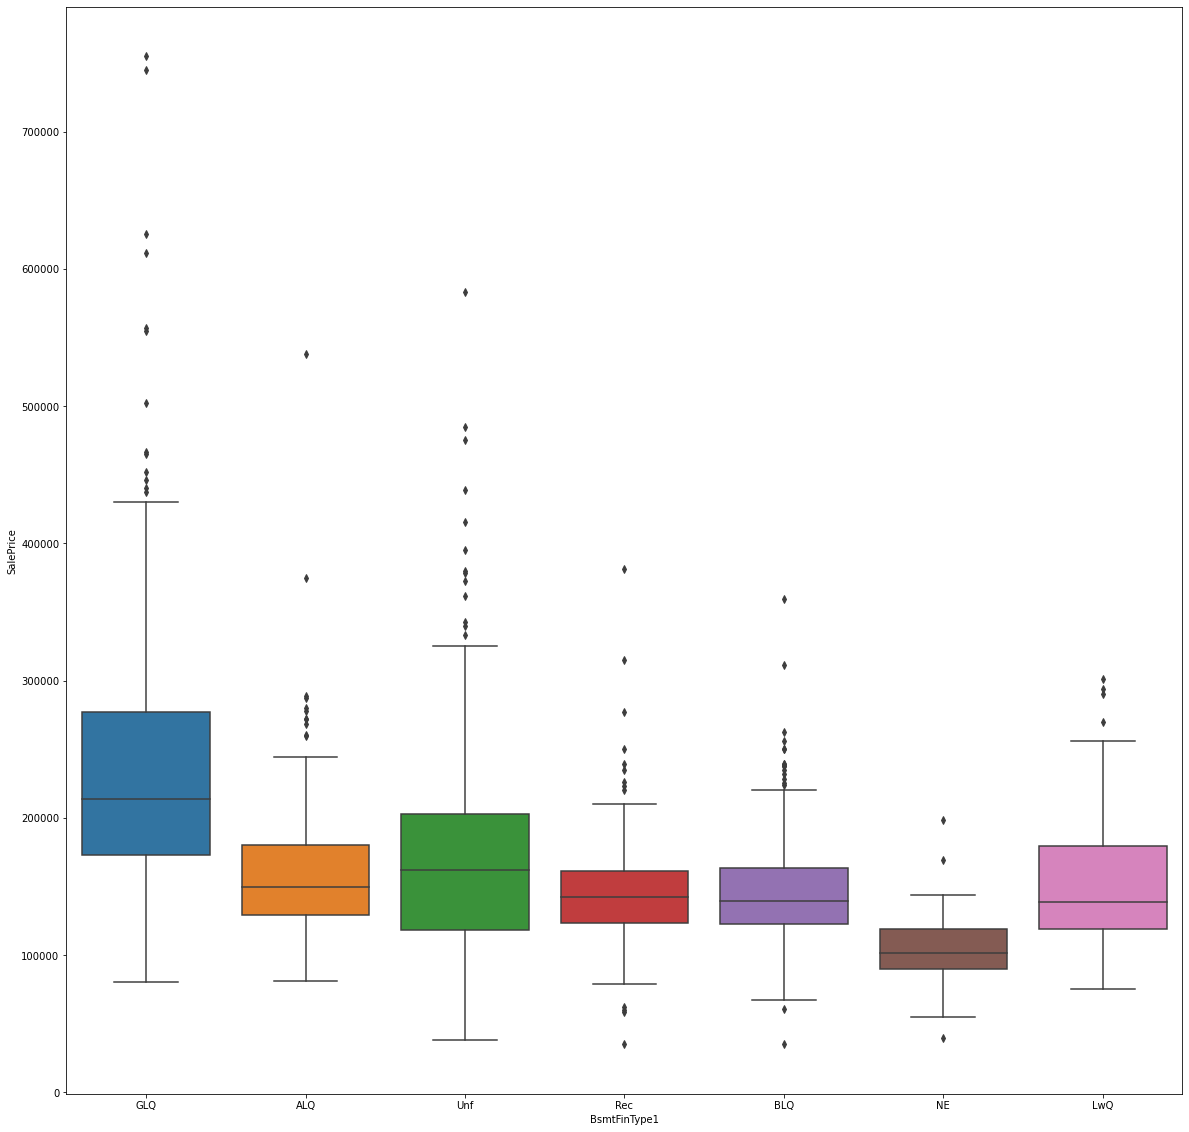

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NE      37
Name: BsmtFinType1, dtype: int64
BsmtFinType2


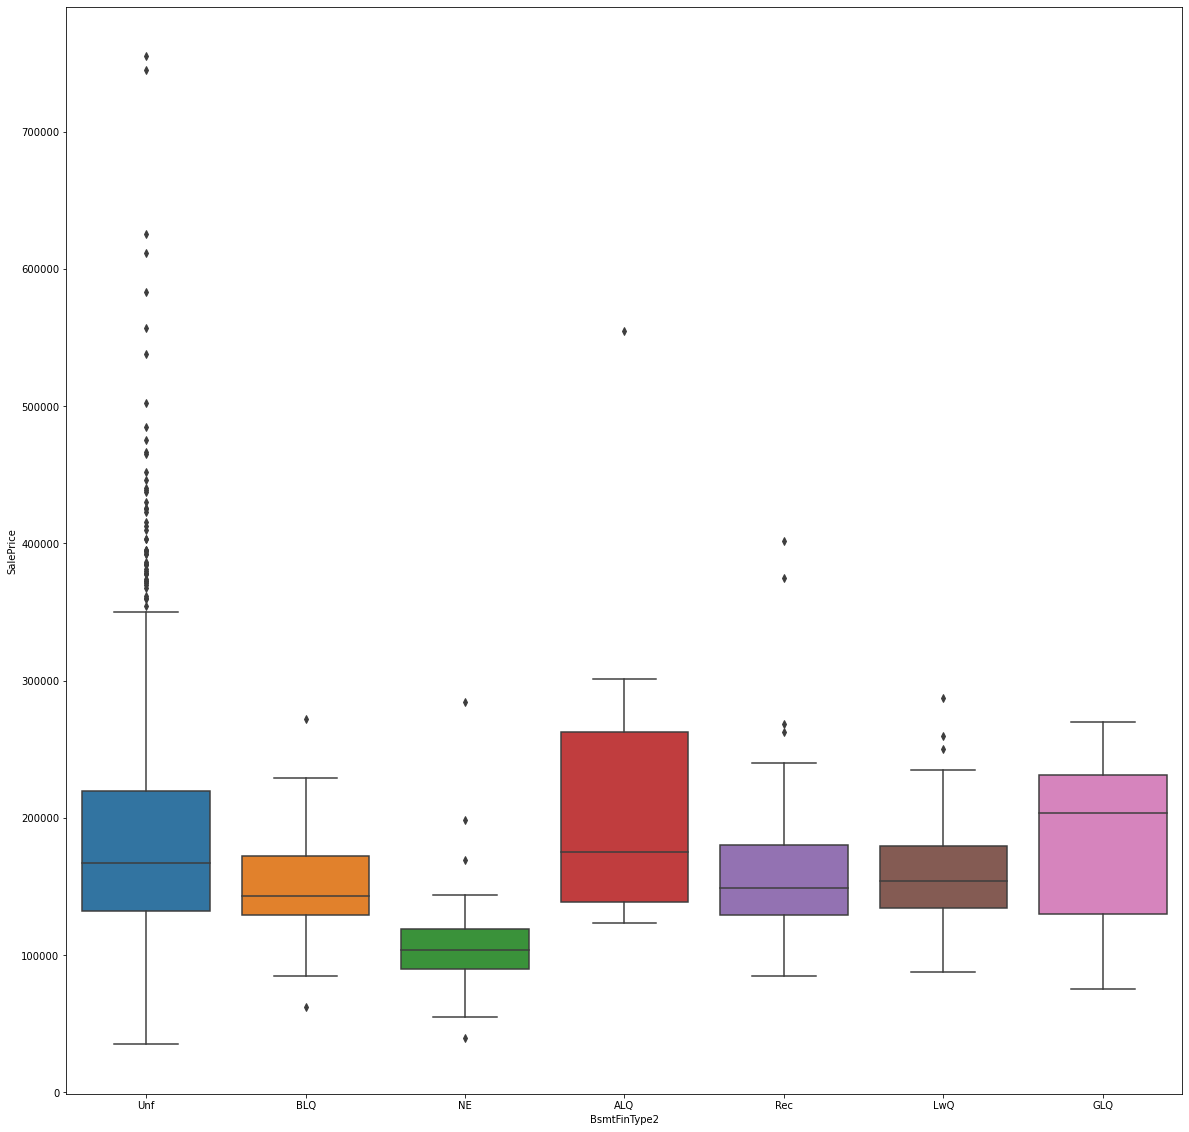

Unf    1256
Rec      54
LwQ      46
NE       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
HeatingQC


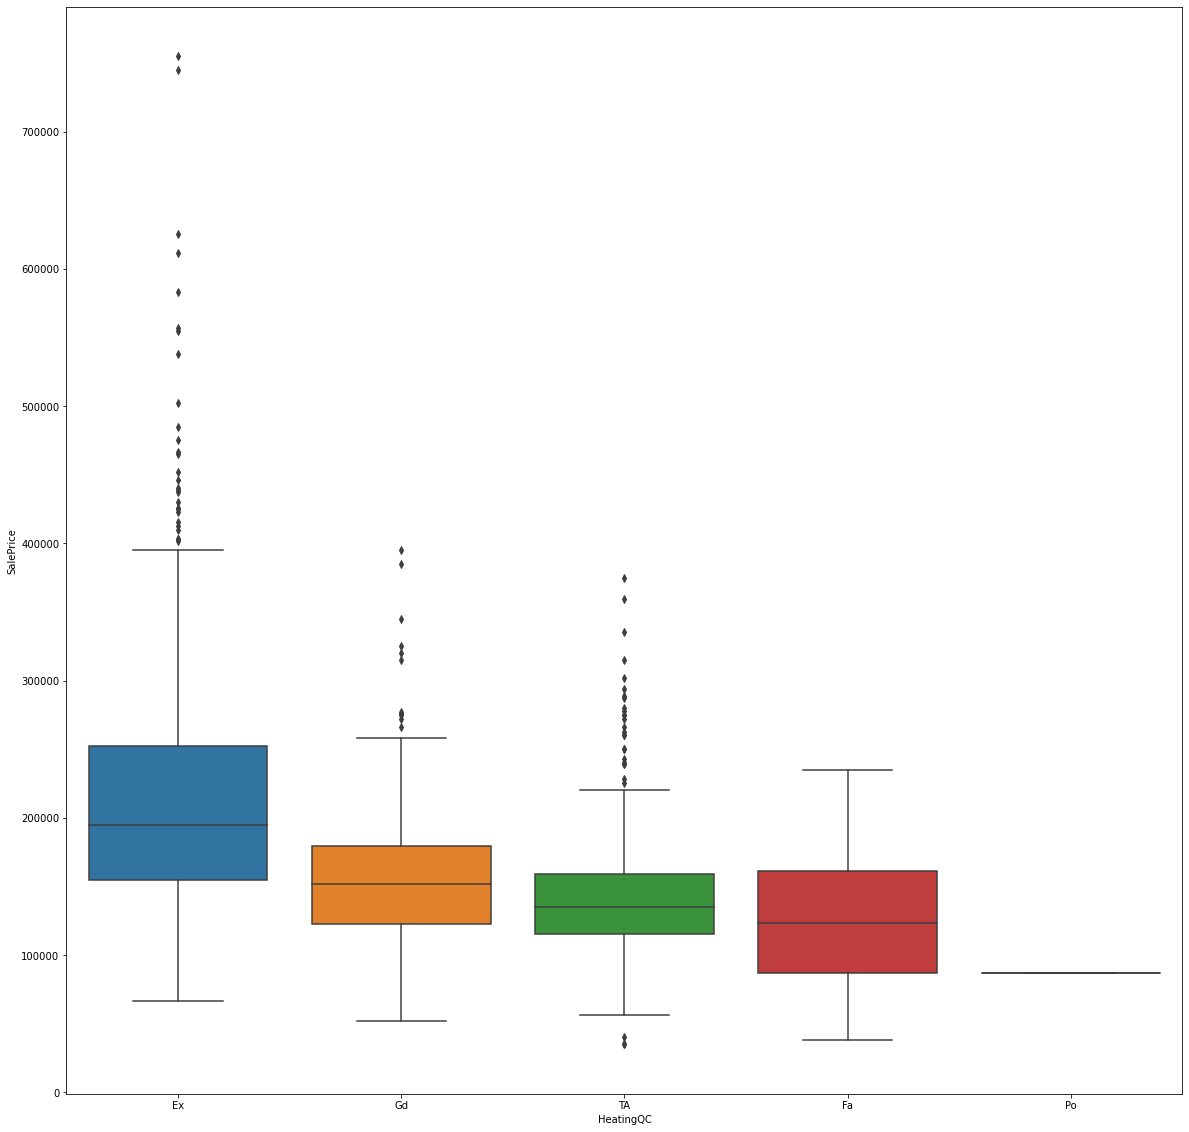

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
KitchenQual


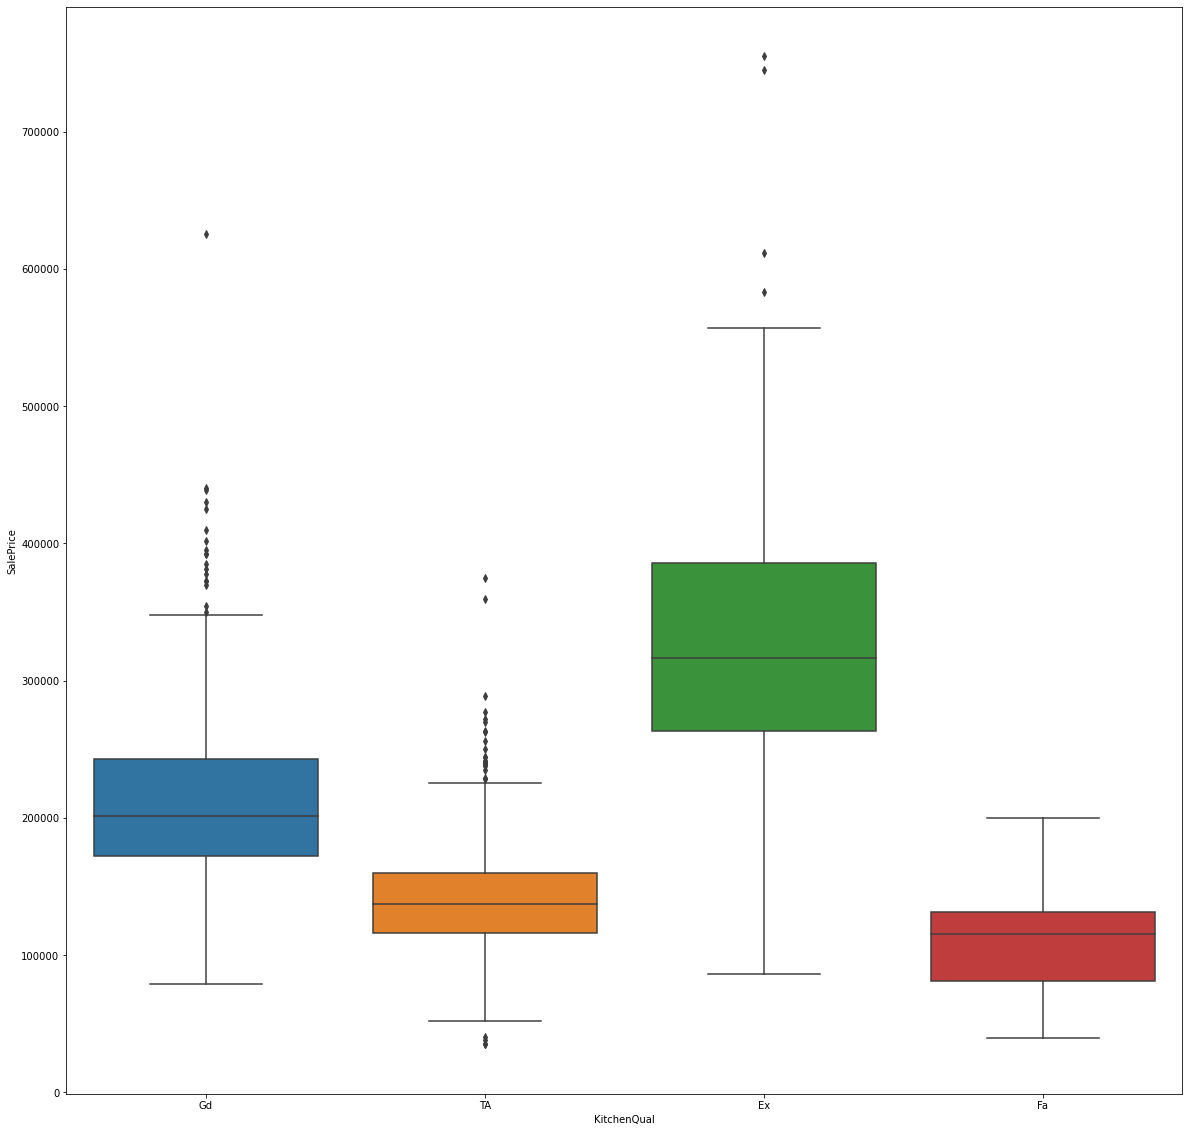

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
FireplaceQu


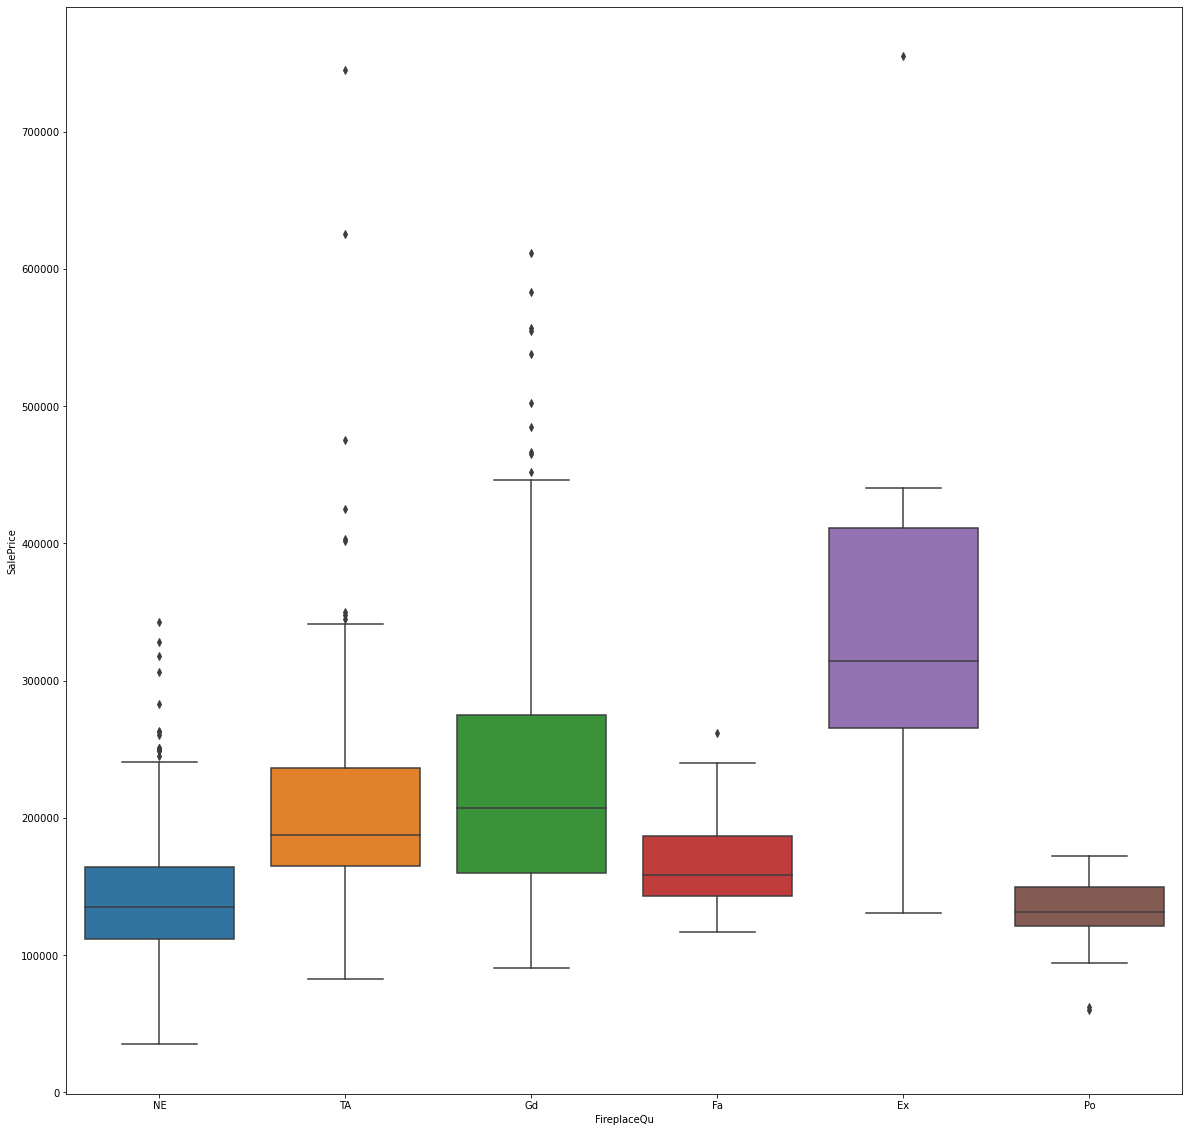

NE    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
GarageType


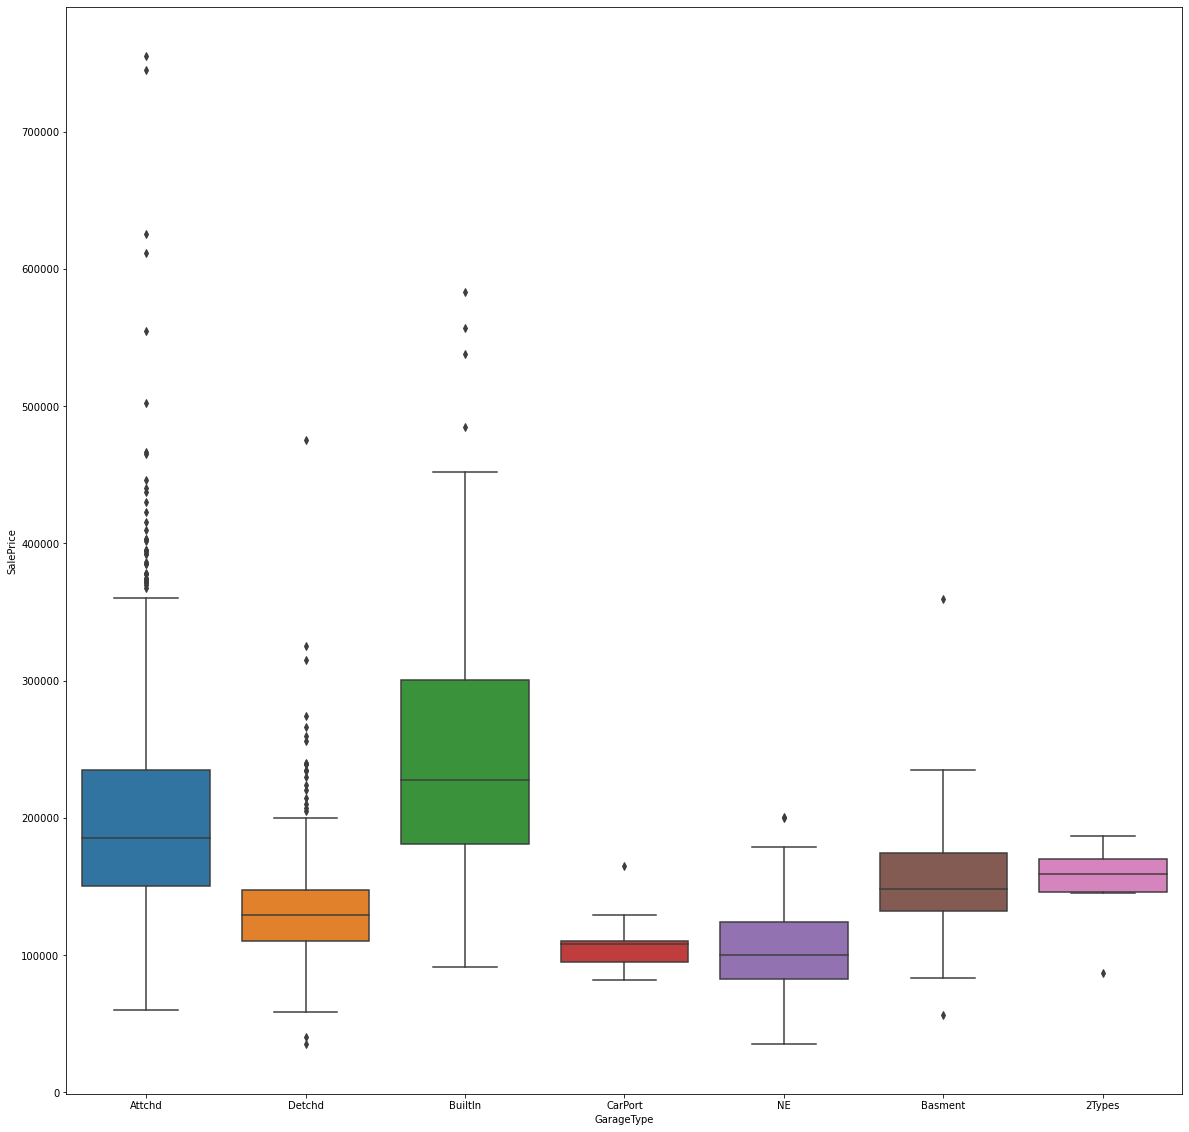

Attchd     870
Detchd     387
BuiltIn     88
NE          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
GarageQual


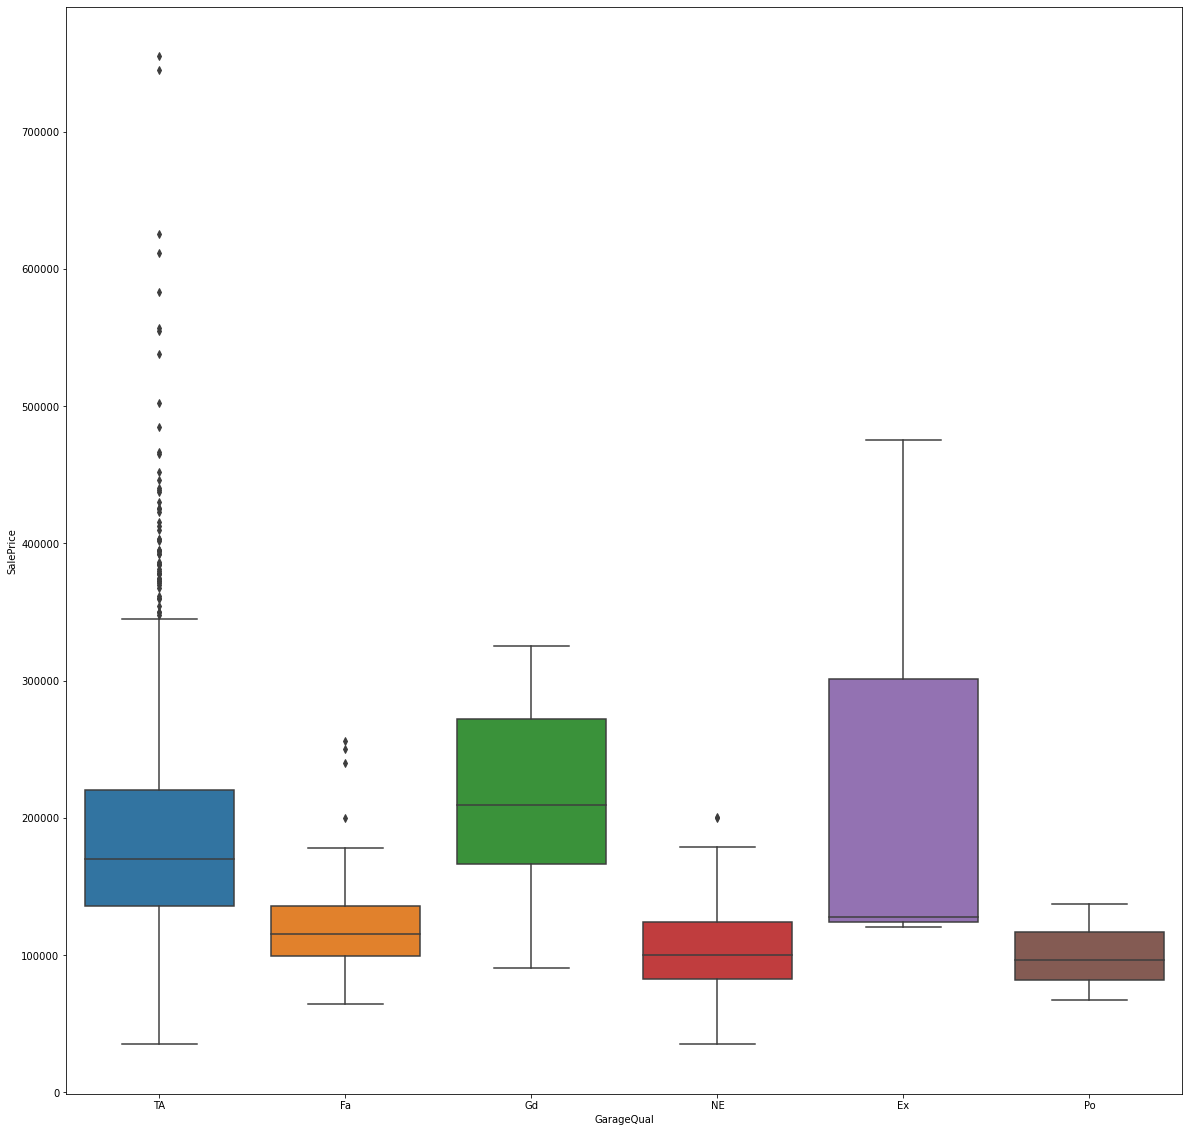

TA    1311
NE      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
MoSold


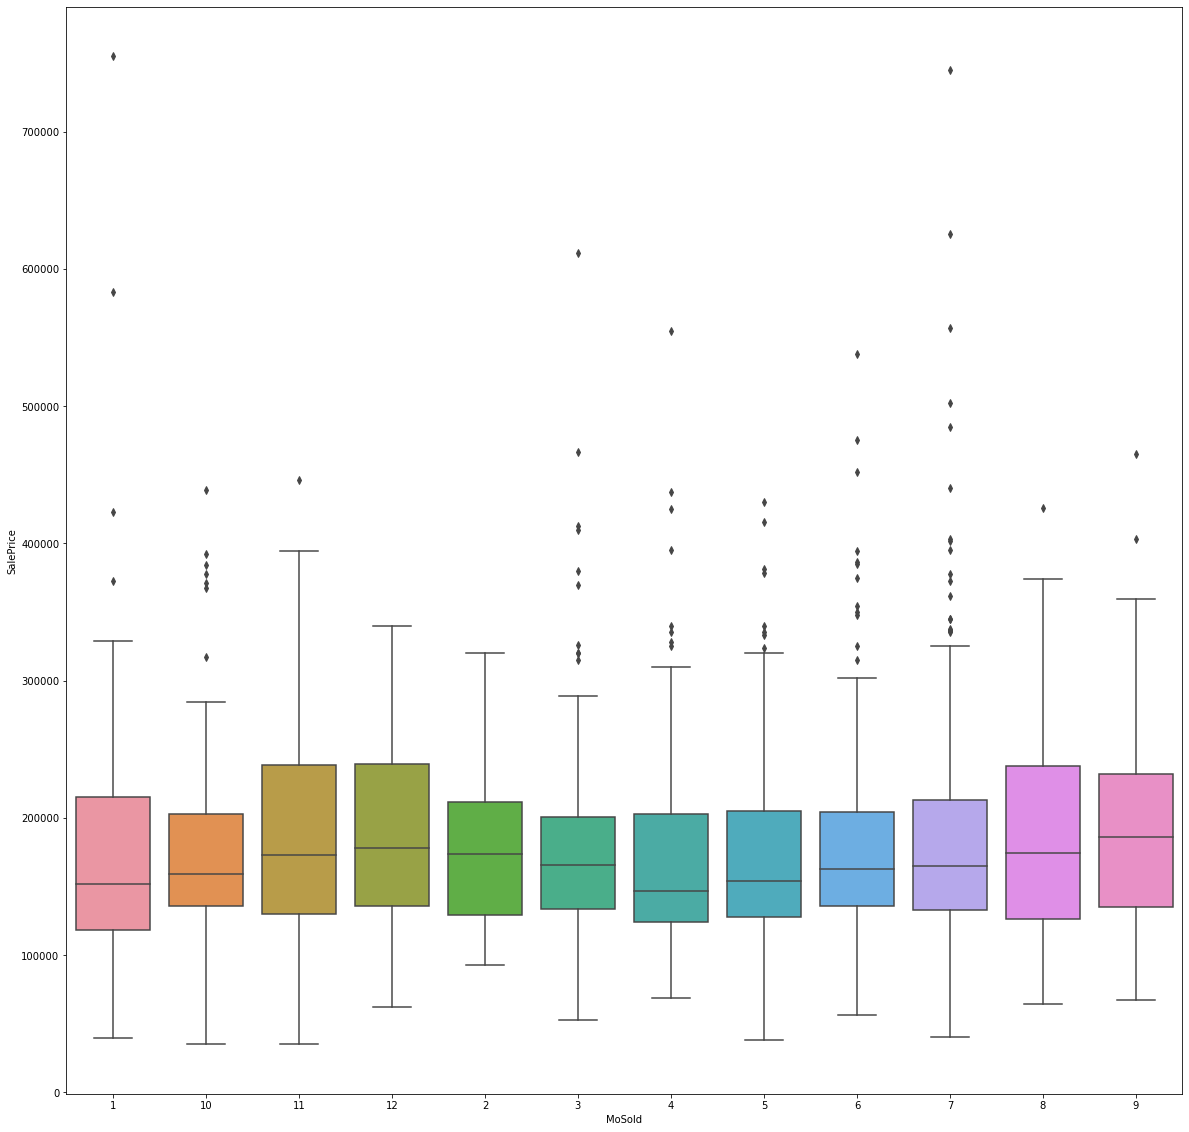

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
SaleType


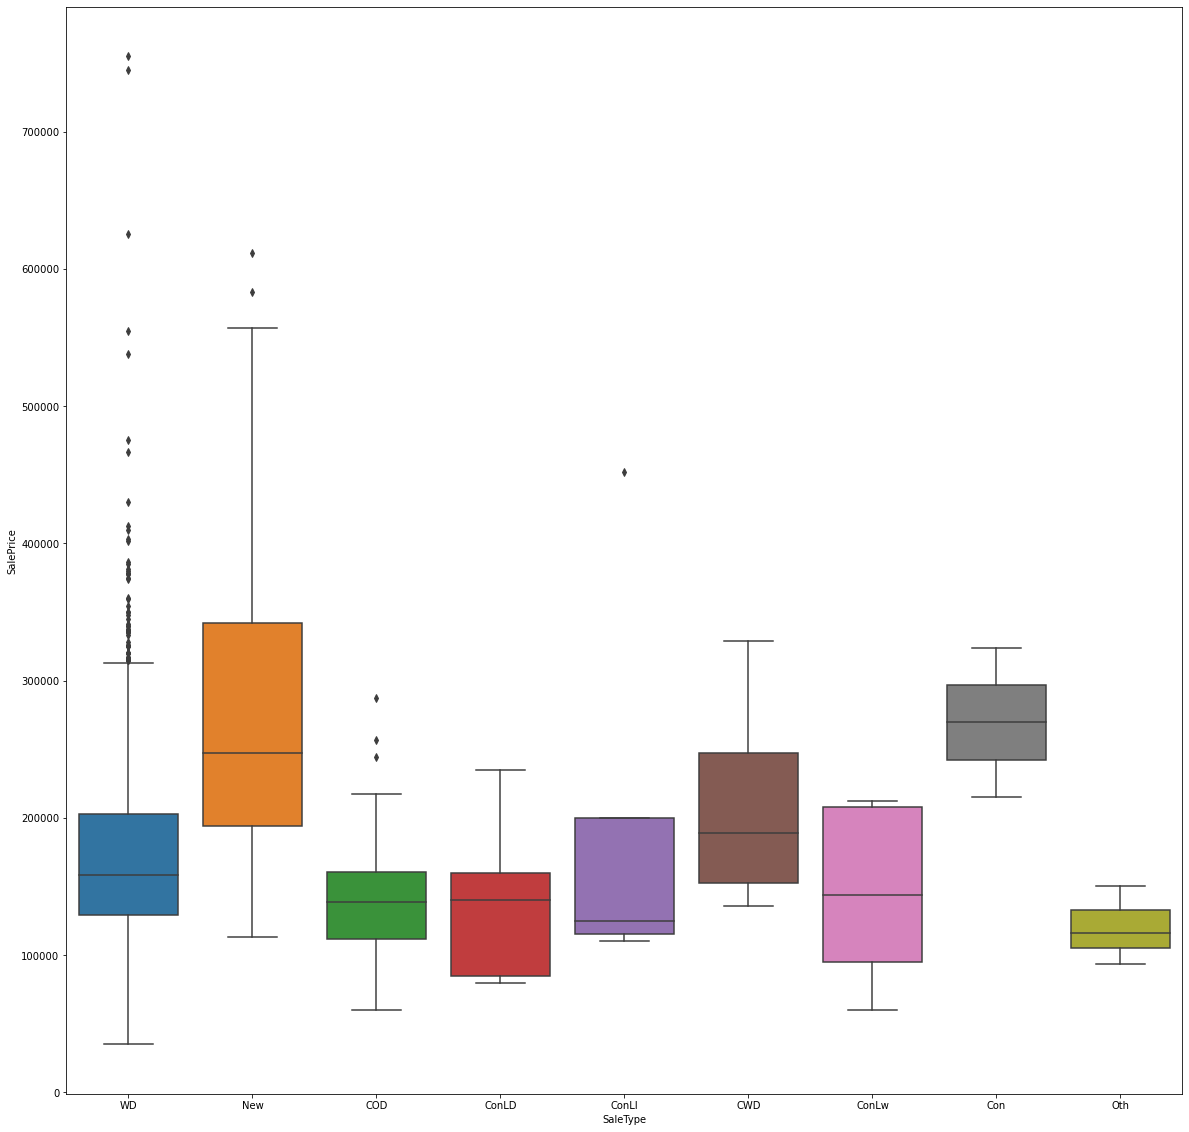

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
SaleCondition


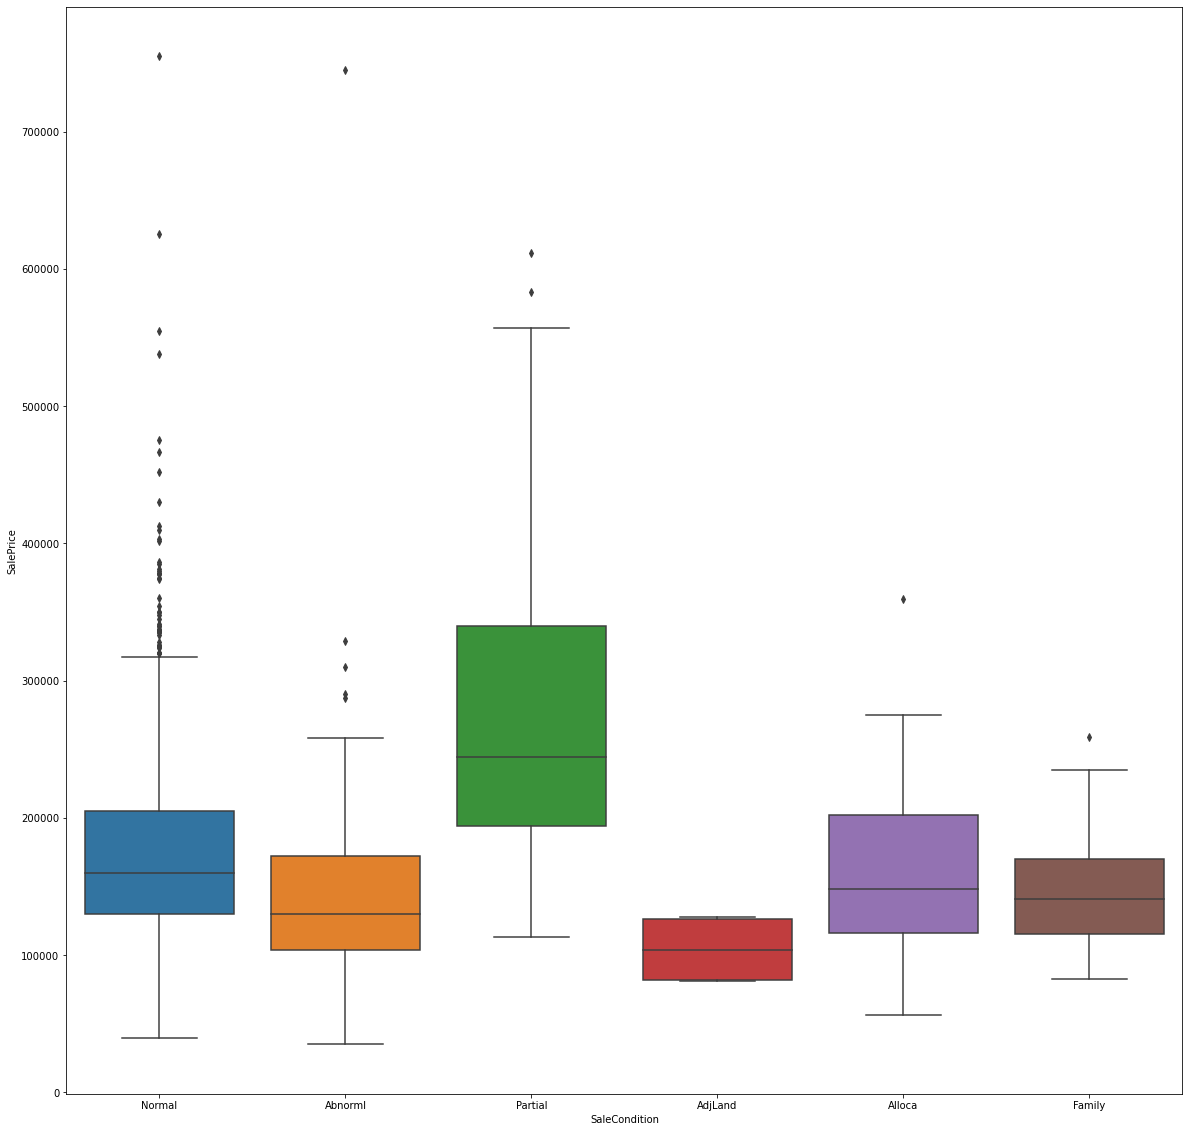

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


<Figure size 1440x1440 with 0 Axes>

In [151]:
for i in categorical.columns:
    print(i)
    sns.boxplot(data=train, x = i, y='SalePrice')
    plt.show()
    plt.figure(figsize=(20,20))
    print(train[i].value_counts())


In [110]:
# train = train.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 
#                     'GarageQual', 'GarageCond', 'Electrical','BsmtCond','BsmtExposure',
#                     'BsmtFinType1','BsmtFinType2','GarageType', 'Condition1', 'MasVnrType'], axis = 1) #drop columns


# # categorical.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'Electrical'], axis = 1, inplace= True)

In [111]:
droplst = []
for i in range(len(train.columns)):
    if train[train.columns[i]].value_counts().iloc[0]/train.shape[0] > 0.9:
        droplst.append(train.columns[i])
        
train = train.drop(droplst, axis = 1)
print (droplst)

# for i in range(0, len(categorical.columns)):
# #     print (categorical.iloc[:,i].value_counts()[0]/train.shape[0]>)


['LandSlope', 'CentralAir', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [112]:
train['LotShape'] =  train.LotShape.map(lambda x: 0 if x == 'Reg' else 1) #return 0 if regular lot shape, 1 if irregular
train['LandContour'] =  train.LandContour.map(lambda x: 0 if x == 'Lvl' else 1) #return 0 if flat land contour, 1 if non-flat
# train['LandSlope'] = train.LandSlope.map(lambda x: 0 if x == 'Gtl' else 1) #return 0 if gentle slope, 1 if moderate/severe
train['GarageFinish'] =  train.GarageFinish.map(lambda x: 1 if x == 'Fin' or x == 'RFn' else 0) #return 1 if finished, 0 if non-finished
# train['CentralAir'] =  train.CentralAir.map(lambda x: 1 if x == 'Y' else 0) #return 1 if Y, 0 if N
# train['PavedDrive'] =  train.PavedDrive.map(lambda x: 1 if x == 'Yes' else 0) #return 1 if paved driveway, 0 if non-paved
# train['Functional'] =  train.Functional.map(lambda x: 1 if x == 'Yes' else 0) #return 1 if typical, 0 if deductions

In [113]:
train['Neighborhood'] = train['Neighborhood'].map(lambda x: np.where(x in ["NoRidge","NridgHt","StoneBr"],2, np.where(x in ["Timber", "Veenker",
"Somerst","ClearCr","Crawfor","CollgCr","Blmngtn","Gilbert","NWAmes","SawyerW"],1, 0)))

Neighborhood = pd.get_dummies(train.Neighborhood, prefix='Neighborhood')

train = train.drop(["Neighborhood"], axis = 1)
train = pd.concat([train, Neighborhood], axis = 1)

In [114]:
roofstyle = pd.get_dummies(train['RoofStyle'], prefix='Roof' )


Exterior1 = pd.get_dummies(train.Exterior1st, prefix='Ex1' )

Exterior2 = pd.get_dummies(train.Exterior2nd, prefix='Ex2' )

ExteriorC = pd.get_dummies(train.ExterCond, prefix='EC' )

ExteriorQ = pd.get_dummies(train.ExterQual, prefix='EQ' )

Found = pd.get_dummies(train.Foundation, prefix='Foundation' )


Saletype = pd.get_dummies(train.SaleType, prefix='SaleType' )

Salecond = pd.get_dummies(train.SaleCondition, prefix='SaleCondition' )

HQC = pd.get_dummies(train.HeatingQC, prefix='Heating' )

FQ = pd.get_dummies(train.FireplaceQu, prefix='Fireplace' )

BasementQ = pd.get_dummies(train.BsmtQual, prefix='Basement' )

MSSubClass = pd.get_dummies(train.MSSubClass, prefix='MS_subclass' )

MSZoning = pd.get_dummies(train.MSZoning, prefix='Zoning' )


BldgType = pd.get_dummies(train.BldgType, prefix='BldgType' )


LotConfig = pd.get_dummies(train.LotConfig, prefix='LotConfig' )

HouseStyle = pd.get_dummies(train.HouseStyle, prefix='HouseStyle' )


KitchenQual = pd.get_dummies(train.KitchenQual, prefix='KitchenQual' )



train = train.drop(['RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'ExterQual', 'Foundation',
                   'SaleType', 'SaleCondition', 'HeatingQC', 'FireplaceQu', 'BsmtQual', 'MSSubClass',
                    'MSZoning', 'BldgType', 'LotConfig', 'HouseStyle', 'KitchenQual'], axis = 1)

train = pd.concat([train, KitchenQual, roofstyle, Exterior1,Exterior2,ExteriorC,
                   ExteriorQ,Found,Saletype,Salecond,HQC,FQ,BasementQ,
                   MSSubClass,MSZoning,BldgType,LotConfig, HouseStyle], axis = 1)



In [115]:
mapping = {"3": 'Spring',
           "4": 'Spring',
           "5": 'Spring',
          "6": 'Summer',
           "7": 'Summer',
           "8": 'Summer',
          "9": 'Fall',
           "10": 'Fall',
           "11": 'Fall',
          '12': 'Winter',
           '1': 'Winter', 
           '2': 'Winter'}
train.MoSold = train.MoSold.map(mapping)


In [116]:
Month = pd.get_dummies(train.MoSold, drop_first=True)
train = train.drop(['MoSold'], axis = 1)
train = pd.concat([train, Month], axis = 1)


In [97]:
train.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [117]:
saleprice = train.SalePrice
X = train.drop(['SalePrice'], axis=1)

In [118]:
train.shape

(1460, 166)

In [119]:
y = np.log(saleprice)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=0)

In [121]:
from sklearn.linear_model import LinearRegression
#Multiple Linear Regression

lm = LinearRegression()

lm.fit(X_train,y_train)

# scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# scores
lm.fit(X_train, y_train) #fit the model
train_accuracy = lm.score(X_train, y_train) #how it performs on the data it was trained on
test_accuracy  = lm.score(X_test, y_test)

print("The training accuracy is: %.3f" %train_accuracy)
print("The test accuracy is: %.3f" %test_accuracy)
print('train RSS is equal to %.3f' %(np.sum((y_train-lm.predict(X_train))**2)))
print('Test RSS is equal to %.3f' %(np.sum((y_test-lm.predict(X_test))**2)))


The training accuracy is: 0.927
The test accuracy is: 0.740
Train RSS is equal to 13.814
Test RSS is equal to 11.507
